# Unintentional Non-Fatal Childhood Agricultural Injuries Presenting to United States Emergency Departments, 2000 to 2017

## Author: Ebuwa Evbuoma-Fike

## Last Edited: 8/13/2022, in progress!

## Project Information: https://github.com/ebuwaevbuoma-fike/childhood-agricultural-injury-project

# Installation Procedures

In [2]:
#Install required packages
!pip install pandas numpy scikit_learn seaborn matplotlib pingouin

In [34]:
#!conda install seaborn pandas numpy scipy matplotlib seaborn tabulate statsmodels missingno scikit-learn tableone

Solving environment: done

## Package Plan ##

  environment location: /Users/ebuwa/opt/anaconda3

  added / updated specs:
    - seaborn


The following packages will be UPDATED:

  ca-certificates    conda-forge::ca-certificates-2022.6.1~ --> pkgs/main::ca-certificates-2022.07.19-hecd8cb5_0

The following packages will be SUPERSEDED by a higher-priority channel:

  certifi            conda-forge::certifi-2022.6.15-py39h6~ --> pkgs/main::certifi-2022.6.15-py39hecd8cb5_0
  conda              conda-forge::conda-4.13.0-py39h6e9494~ --> pkgs/main::conda-4.13.0-py39hecd8cb5_0
  openssl            conda-forge::openssl-1.1.1q-hfe4f2af_0 --> pkgs/main::openssl-1.1.1q-hca72f7f_0


Proceed ([y]/n)? ^C

CondaSystemExit: 
Operation aborted.  Exiting.



In [771]:
#Import python packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
plt.rc("font", size=14) #set plot font size
import seaborn as sns #set color schemes
sns.set(style = "white")
sns.set(style = "whitegrid", color_codes = True)

import statsmodels.api as sm
from statsmodels.stats.weightstats import DescrStatsW
import scipy
import scipy.stats as stats
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind
import missingno as msno
from tabulate import tabulate
from tableone import TableOne
import miceforest as mf


#Import modules from scikit-learn
from sklearn import preprocessing
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import log_loss, auc, roc_curve, roc_auc_score, recall_score, precision_score, average_precision_score,f1_score, classification_report, accuracy_score, plot_roc_curve, plot_precision_recall_curve, plot_confusion_matrix
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_graphviz

from tqdm import tqdm_notebook as tqdm

/Users/ebuwa/opt/anaconda3/envs/homework/lib/python3.9/site-packages/seaborn/rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
/Users/ebuwa/opt/anaconda3/envs/homework/lib/python3.9/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/Users/ebuwa/opt/anaconda3/envs/homework/lib/python3.9/site-packages/seaborn/rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
/Users/ebuwa/opt/anaconda3/envs/homework/lib/python3.9/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


## DATA WRANGLING

### Import datasets

In [522]:
#Import datasets, 2000 to 2017
neiss2000 = pd.read_stata("neiss2000.dta")
neiss2001 = pd.read_stata("neiss2001.dta")
neiss2002 = pd.read_stata("neiss2002.dta")
neiss2003 = pd.read_stata("neiss2003.dta")
neiss2004 = pd.read_stata("neiss2004.dta")
neiss2005 = pd.read_stata("neiss2005.dta")
neiss2006 = pd.read_stata("neiss2006.dta")
neiss2007 = pd.read_stata("neiss2007.dta")
neiss2008 = pd.read_stata("neiss2008.dta")
neiss2009 = pd.read_stata("neiss2009.dta")
neiss2010 = pd.read_stata("neiss2010.dta")
neiss2011 = pd.read_stata("neiss2011.dta")
neiss2012 = pd.read_stata("neiss2012.dta")
neiss2013 = pd.read_stata("neiss2013.dta")
neiss2014 = pd.read_stata("neiss2014.dta")
neiss2015 = pd.read_stata("neiss2015.dta")
neiss2016 = pd.read_stata("neiss2016.dta")
neiss2017 = pd.read_stata("neiss2017.dta")


### Inspect and subset datasets

#### NEISS 2000 data

In [298]:
#List features
print(list(neiss2000))

#Print dimensions
print(neiss2000.shape)
#There are 231,672 observations and 22 features

#Inspect first five rows
pd.options.display.max_columns = 24
neiss2000.head()

['nek', 'weight', 'psu', 'bdypt', 'diag', 'disp', 'sex', 'stratum', 'age_c', 'hisp_c', 'trmon_c', 'ageyr_c', 'ageg4_c', 'ageg6_c', 'bdyptg_c', 'injury_c', 'locg_c', 'race2_c', 'raceth_c', 'violen_c', 'pcause_c', 'weighta']
(231672, 22)


,nek,weight,psu,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta
0,706671,119.826698,63,LOWER TRUNK,STRAIN/SPRAIN,TREATED/RELEASED,FEMALE,MED,41 YRS,NON-HISP/NS,JULY,41,40-44,35-44,LOWER TRUNK,INJURY DX,OTHER PROPERTY,WHITE,WHITE NH,UNINT/UNK,OVEREXERTION,239.653305
1,706672,119.826698,63,UPPER TRUNK,STRAIN/SPRAIN,TREATED/RELEASED,MALE,MED,72 YRS,NON-HISP/NS,JULY,72,70-74,65-74,UPPER TRUNK,INJURY DX,OTHER PROPERTY,WHITE,WHITE NH,UNINT/UNK,OVEREXERTION,239.653305
2,706673,119.826698,63,ANKLE,STRAIN/SPRAIN,TREATED/RELEASED,FEMALE,MED,75 YRS,NON-HISP/NS,JULY,75,75-79,75-84,LEG/FOOT,INJURY DX,OTHER PROPERTY,WHITE,WHITE NH,UNINT/UNK,OVEREXERTION,239.653305
3,706674,119.826698,63,FACE,PUNCTURE,TREATED/RELEASED,FEMALE,MED,17 YRS,NON-HISP/NS,JULY,17,15-19,15-19,HEAD/NECK,INJURY DX,HOME/APT/MOBILE,WHITE,WHITE NH,UNINT/UNK,OTH BITE/STING,239.653305
4,706675,119.826698,63,FACE,CONTUSN ABR,TREATED/RELEASED,FEMALE,MED,77 YRS,NON-HISP/NS,JULY,77,75-79,75-84,HEAD/NECK,INJURY DX,HOME/APT/MOBILE,WHITE,WHITE NH,UNINT/UNK,FALL,239.653305


In [299]:
#Overview and datatypes
print(neiss2000.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 231672 entries, 0 to 231671
Data columns (total 22 columns):
 #   Column    Non-Null Count   Dtype   
---  ------    --------------   -----   
 0   nek       231672 non-null  int32   
 1   weight    231672 non-null  float32 
 2   psu       231672 non-null  int32   
 3   bdypt     231672 non-null  category
 4   diag      231672 non-null  category
 5   disp      231672 non-null  category
 6   sex       231672 non-null  category
 7   stratum   231672 non-null  category
 8   age_c     231672 non-null  category
 9   hisp_c    231672 non-null  category
 10  trmon_c   231672 non-null  category
 11  ageyr_c   231672 non-null  category
 12  ageg4_c   231672 non-null  category
 13  ageg6_c   231672 non-null  category
 14  bdyptg_c  231672 non-null  category
 15  injury_c  231672 non-null  category
 16  locg_c    231672 non-null  category
 17  race2_c   231672 non-null  category
 18  raceth_c  231672 non-null  category
 19  violen_c  231672 non-nu

In [300]:
#Count missing values by feature
neiss2000.apply(pd.isnull).sum() 

#Although there are missing values (per codebook), they are not encoded as null. Recoding below.

nek         0
weight      0
psu         0
bdypt       0
diag        0
disp        0
sex         0
stratum     0
age_c       0
hisp_c      0
trmon_c     0
ageyr_c     0
ageg4_c     0
ageg6_c     0
bdyptg_c    0
injury_c    0
locg_c      0
race2_c     0
raceth_c    0
violen_c    0
pcause_c    0
weighta     0
dtype: int64

In [15]:
#Create a function, cat_finder to inspect categories for all features

def cat_finder(df, categories):
    output = []
    for category in categories:
        output.append(df[category].unique())
    return output

In [16]:
#Test function
categories_2000 = cat_finder(neiss2000, ["disp", "sex","hisp_c","trmon_c","bdyptg_c","injury_c","locg_c","race2_c",
                                       "raceth_c","violen_c"])

In [17]:
print(categories_2000) #Ordering appears to match dataset documentation

[['treated/released', 'hospitalized', 'transfd/released', 'unk', 'observation']
Categories (5, object): ['treated/released' < 'transfd/released' < 'hospitalized' < 'observation' < 'unk'], ['female', 'male', 'unk']
Categories (3, object): ['unk' < 'male' < 'female'], ['non-hisp/ns', 'hispanic']
Categories (2, object): ['hispanic' < 'non-hisp/ns'], ['july', 'august', 'september', 'october', 'november', 'december']
Categories (6, object): ['july' < 'august' < 'september' < 'october' < 'november' < 'december'], ['lower trunk', 'upper trunk', 'leg/foot', 'head/neck', 'arm/hand', 'other', 'unk']
Categories (7, object): ['unk' < 'head/neck' < 'upper trunk' < 'lower trunk' < 'arm/hand' < 'leg/foot' < 'other'], ['injury dx']
Categories (1, object): ['injury dx'], ['other property', 'home/apt/mobile', 'street', 'school/sports', 'unk', 'farm']
Categories (6, object): ['unk' < 'home/apt/mobile' < 'school/sports' < 'street' < 'other property' < 'farm'], ['white', 'other', 'black', 'asian', 'ns', 'a

### Bar Plots

In [9]:
#Create a function called plot_barplots to output bar plots
def plot_barplots(dataframe, clmn, xlabel, title):
    y = dataframe[clmn].value_counts()
    plt.bar(y.index,y)
    plt.ylabel("Frequency", fontsize = 12)
    plt.xlabel(xlabel, fontsize = 12)
    plt.title(title)

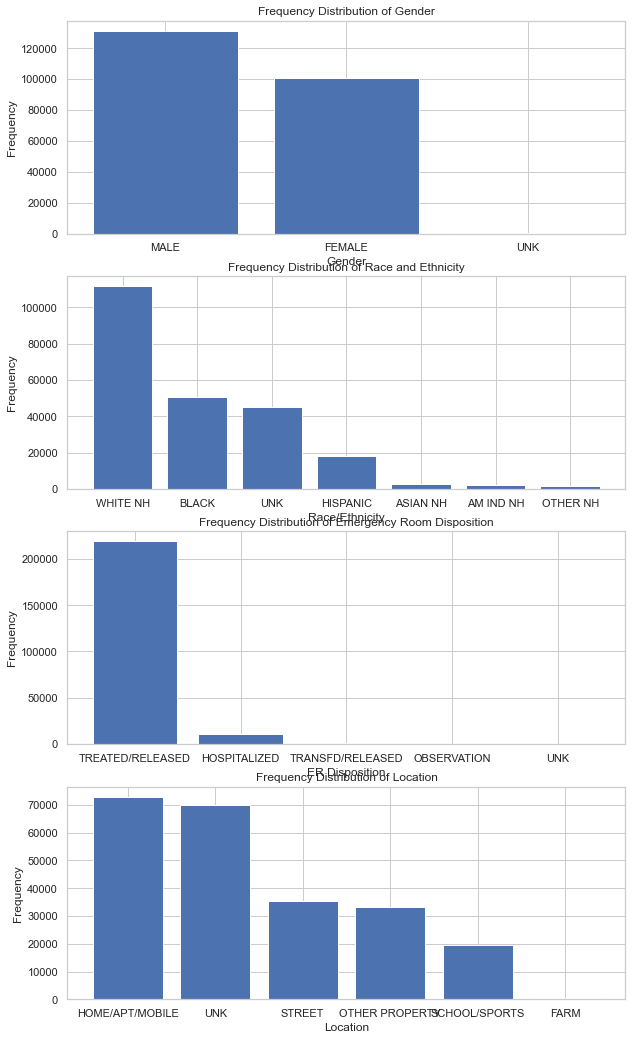

In [301]:
#Plot multiple bar plots for key features
plt.figure(figsize = (10,18))
plt.subplot(4,1,1)
plot_barplots(neiss2000, "sex", "Gender", "Frequency Distribution of Gender")
#plt.subplot(4,1,2)
#plot_barplots(neiss2000, "hisp_c", "Ethnicity", "Frequency Distribution of Ethnicity")
plt.subplot(4,1,2)
plot_barplots(neiss2000, "raceth_c", "Race/Ethnicity", "Frequency Distribution of Race and Ethnicity")
plt.subplot(4,1,3)
plot_barplots(neiss2000, "disp", "ER Disposition", "Frequency Distribution of Emergency Room Disposition")
plt.subplot(4,1,4)
plot_barplots(neiss2000, "locg_c", "Location", "Frequency Distribution of Location")

In [523]:
#Relabel feature categories to lowercase

neiss2000["bdypt"] = neiss2000["bdypt"].apply(str.lower)
neiss2000["diag"]  = neiss2000["diag"].apply(str.lower)
neiss2000["disp"]  = neiss2000["disp"].apply(str.lower)
neiss2000["sex"]   = neiss2000["sex"].apply(str.lower)
neiss2000["stratum"] = neiss2000["stratum"].apply(str.lower)
neiss2000["hisp_c"] = neiss2000["hisp_c"].apply(str.lower)
neiss2000["bdyptg_c"] = neiss2000["bdyptg_c"].apply(str.lower)
neiss2000["injury_c"] = neiss2000["injury_c"].apply(str.lower)
neiss2000["locg_c"] = neiss2000["locg_c"].apply(str.lower)
neiss2000["race2_c"] = neiss2000["race2_c"].apply(str.lower)
neiss2000["raceth_c"] = neiss2000["raceth_c"].apply(str.lower)
neiss2000["violen_c"] = neiss2000["violen_c"].apply(str.lower)
neiss2000["pcause_c"] = neiss2000["pcause_c"].apply(str.lower)
neiss2000["trmon_c"] = neiss2000["trmon_c"].apply(str.lower)
neiss2000["age_c"] = neiss2000["age_c"].apply(str.lower)
#Inspect changes
neiss2000.head()

,nek,weight,psu,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta
0,706671,119.826698,63,lower trunk,strain/sprain,treated/released,female,med,41 yrs,non-hisp/ns,july,41,40-44,35-44,lower trunk,injury dx,other property,white,white nh,unint/unk,overexertion,239.653305
1,706672,119.826698,63,upper trunk,strain/sprain,treated/released,male,med,72 yrs,non-hisp/ns,july,72,70-74,65-74,upper trunk,injury dx,other property,white,white nh,unint/unk,overexertion,239.653305
2,706673,119.826698,63,ankle,strain/sprain,treated/released,female,med,75 yrs,non-hisp/ns,july,75,75-79,75-84,leg/foot,injury dx,other property,white,white nh,unint/unk,overexertion,239.653305
3,706674,119.826698,63,face,puncture,treated/released,female,med,17 yrs,non-hisp/ns,july,17,15-19,15-19,head/neck,injury dx,home/apt/mobile,white,white nh,unint/unk,oth bite/sting,239.653305
4,706675,119.826698,63,face,contusn abr,treated/released,female,med,77 yrs,non-hisp/ns,july,77,75-79,75-84,head/neck,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,239.653305


In [5]:
#Create a function to inspect measures of central tendency for numeric features
def central_tendency_summary(dataframe, clmn):
    print("Measures of central tendency for " + clmn)
    print(dataframe[clmn].describe())
    print("-------------------------FINISHED-----------------------------")

In [524]:
#Append a year column
year = 2000
neiss2000["year"] = year
neiss2000.head()

,nek,weight,psu,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta,year
0,706671,119.826698,63,lower trunk,strain/sprain,treated/released,female,med,41 yrs,non-hisp/ns,july,41,40-44,35-44,lower trunk,injury dx,other property,white,white nh,unint/unk,overexertion,239.653305,2000
1,706672,119.826698,63,upper trunk,strain/sprain,treated/released,male,med,72 yrs,non-hisp/ns,july,72,70-74,65-74,upper trunk,injury dx,other property,white,white nh,unint/unk,overexertion,239.653305,2000
2,706673,119.826698,63,ankle,strain/sprain,treated/released,female,med,75 yrs,non-hisp/ns,july,75,75-79,75-84,leg/foot,injury dx,other property,white,white nh,unint/unk,overexertion,239.653305,2000
3,706674,119.826698,63,face,puncture,treated/released,female,med,17 yrs,non-hisp/ns,july,17,15-19,15-19,head/neck,injury dx,home/apt/mobile,white,white nh,unint/unk,oth bite/sting,239.653305,2000
4,706675,119.826698,63,face,contusn abr,treated/released,female,med,77 yrs,non-hisp/ns,july,77,75-79,75-84,head/neck,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,239.653305,2000


In [525]:
#Check for duplicates based on value of nek
neiss2000.duplicated(subset = "nek").sum()

0

In [526]:
#Create a feature, user, based on length of dataframe
neiss2000["user"] = range(1, len(neiss2000) + 1)

#Inspect
neiss2000.head()

,nek,weight,psu,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta,year,user
0,706671,119.826698,63,lower trunk,strain/sprain,treated/released,female,med,41 yrs,non-hisp/ns,july,41,40-44,35-44,lower trunk,injury dx,other property,white,white nh,unint/unk,overexertion,239.653305,2000,1
1,706672,119.826698,63,upper trunk,strain/sprain,treated/released,male,med,72 yrs,non-hisp/ns,july,72,70-74,65-74,upper trunk,injury dx,other property,white,white nh,unint/unk,overexertion,239.653305,2000,2
2,706673,119.826698,63,ankle,strain/sprain,treated/released,female,med,75 yrs,non-hisp/ns,july,75,75-79,75-84,leg/foot,injury dx,other property,white,white nh,unint/unk,overexertion,239.653305,2000,3
3,706674,119.826698,63,face,puncture,treated/released,female,med,17 yrs,non-hisp/ns,july,17,15-19,15-19,head/neck,injury dx,home/apt/mobile,white,white nh,unint/unk,oth bite/sting,239.653305,2000,4
4,706675,119.826698,63,face,contusn abr,treated/released,female,med,77 yrs,non-hisp/ns,july,77,75-79,75-84,head/neck,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,239.653305,2000,5


In [528]:
#Create unique IDs called, "id" using year and user
neiss2000["id"] = neiss2000["year"].astype(str) + neiss2000["user"].astype(str)

#Inspect
neiss2000.head()

,nek,weight,psu,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta,year,user,id
0,706671,119.826698,63,lower trunk,strain/sprain,treated/released,female,med,41 yrs,non-hisp/ns,july,41,40-44,35-44,lower trunk,injury dx,other property,white,white nh,unint/unk,overexertion,239.653305,2000,1,20001
1,706672,119.826698,63,upper trunk,strain/sprain,treated/released,male,med,72 yrs,non-hisp/ns,july,72,70-74,65-74,upper trunk,injury dx,other property,white,white nh,unint/unk,overexertion,239.653305,2000,2,20002
2,706673,119.826698,63,ankle,strain/sprain,treated/released,female,med,75 yrs,non-hisp/ns,july,75,75-79,75-84,leg/foot,injury dx,other property,white,white nh,unint/unk,overexertion,239.653305,2000,3,20003
3,706674,119.826698,63,face,puncture,treated/released,female,med,17 yrs,non-hisp/ns,july,17,15-19,15-19,head/neck,injury dx,home/apt/mobile,white,white nh,unint/unk,oth bite/sting,239.653305,2000,4,20004
4,706675,119.826698,63,face,contusn abr,treated/released,female,med,77 yrs,non-hisp/ns,july,77,75-79,75-84,head/neck,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,239.653305,2000,5,20005


In [529]:
#Remove "user" in preparation for concatenation
del neiss2000["user"]

#Inspect
neiss2000.head()

,nek,weight,psu,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta,year,id
0,706671,119.826698,63,lower trunk,strain/sprain,treated/released,female,med,41 yrs,non-hisp/ns,july,41,40-44,35-44,lower trunk,injury dx,other property,white,white nh,unint/unk,overexertion,239.653305,2000,20001
1,706672,119.826698,63,upper trunk,strain/sprain,treated/released,male,med,72 yrs,non-hisp/ns,july,72,70-74,65-74,upper trunk,injury dx,other property,white,white nh,unint/unk,overexertion,239.653305,2000,20002
2,706673,119.826698,63,ankle,strain/sprain,treated/released,female,med,75 yrs,non-hisp/ns,july,75,75-79,75-84,leg/foot,injury dx,other property,white,white nh,unint/unk,overexertion,239.653305,2000,20003
3,706674,119.826698,63,face,puncture,treated/released,female,med,17 yrs,non-hisp/ns,july,17,15-19,15-19,head/neck,injury dx,home/apt/mobile,white,white nh,unint/unk,oth bite/sting,239.653305,2000,20004
4,706675,119.826698,63,face,contusn abr,treated/released,female,med,77 yrs,non-hisp/ns,july,77,75-79,75-84,head/neck,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,239.653305,2000,20005


### Recode missing data

Recoding missing data for sex
Unique values for sex
['FEMALE', 'MALE', 'UNK']
Categories (3, object): ['UNK' < 'MALE' < 'FEMALE']
Value counts for sex
MALE      131136
FEMALE    100479
UNK           57
Name: sex, dtype: int64
Observations with missing data for sex
             nek      weight  psu        bdypt           diag  \
4909      706733  110.121002   98         NECK  STRAIN/SPRAIN   
15616     801997   60.283691   54    LOWER ARM       AVULSION   
20038    1114213   60.283691   54  UPPER TRUNK   INTERNAL INJ   
20957    1146549   60.283691   54        WRIST    CONTUSN ABR   
23421    1004371  110.121002   92    LOWER ARM    CONTUSN ABR   
23849    1116904  110.121002   92  LOWER TRUNK       FRACTURE   
24240    1241634  110.121002   92         HEAD    CONTUSN ABR   
28768   10103003  110.121002   45        ANKLE    CONTUSN ABR   
37411     814097   26.527670   91    UPPER LEG    CONTUSN ABR   
39495     948182   28.422510   91         FOOT       PUNCTURE   
40066    1017987   2

The sex variable is ordered with male and female categories, and 57 observations have missing data.  diag has 30 categories and 851 missing observations, disp has 4 categories and 291 missing observations, age_c has 127 categories (2 to 120 years, 1 month (#201) to 23 months (#203)) and no missing observations, ageyr_c has 106 categories and no missing observations, ageg4_c has 18 categories and 77 missing observations, ageg6_c has 13 categories and 77 missing observations, bdypt has 25 categories and 1390 missing observations, bdyptg_c has 6 categories and 1390 missing observations, locg_c has 5 categories and 70,047 missing observations, race2_c has 5 categories and 45,058 missing observations. raceth_c has 6 categories and 45,058 observations, pcause_c has 21 categories and 6,630 missing observations.

In [20]:
#Count missing values by feature
neiss2000.apply(pd.isnull).sum() 

nek         0
weight      0
psu         0
bdypt       0
diag        0
disp        0
sex         0
stratum     0
age_c       0
hisp_c      0
trmon_c     0
ageyr_c     0
ageg4_c     0
ageg6_c     0
bdyptg_c    0
injury_c    0
locg_c      0
race2_c     0
raceth_c    0
violen_c    0
pcause_c    0
weighta     0
year        0
dtype: int64

/Users/ebuwa/opt/anaconda3/envs/homework/lib/python3.9/site-packages/seaborn/rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
/Users/ebuwa/opt/anaconda3/envs/homework/lib/python3.9/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/Users/ebuwa/opt/anaconda3/envs/homework/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


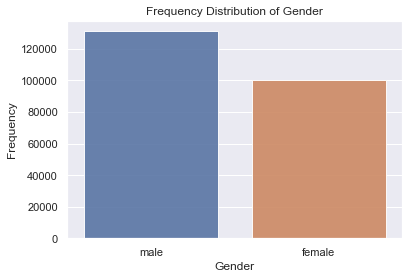

In [83]:
#Create bar plot 
#%matplotlib inline
#outcomes_count = neiss2000["sex"].value_counts()
#sns.set(style="darkgrid")
#sns.barplot(outcomes_count.index, outcomes_count.values, alpha = 0.9)
#plt.title("Frequency Distribution of Gender")
#plt.ylabel("Frequency", fontsize = 12)
#plt.xlabel("Gender", fontsize = 12)
#plt.show()

#### NEISS 2001 data

In [21]:
#List features
print(list(neiss2001))

#Print dimensions
print(neiss2001.shape)
#There are 479, 703 observations and 22 features

#Inspect first five rows
pd.options.display.max_columns = 24
neiss2001.head()

['nek', 'weight', 'psu', 'bdypt', 'diag', 'disp', 'sex', 'stratum', 'age_c', 'hisp_c', 'trmon_c', 'ageyr_c', 'ageg4_c', 'ageg6_c', 'bdyptg_c', 'injury_c', 'locg_c', 'race2_c', 'raceth_c', 'violen_c', 'pcause_c', 'weighta']
(479703, 22)


,nek,weight,psu,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta
0,10115079.0,120.11882,63,WRIST,STRAIN/SPRAIN,TREATED/RELEASED,MALE,MED,21 YRS,NON-HISP/NS,JANUARY,21,20-24,20-24,ARM/HAND,INJURY DX,HOME/APT/MOBILE,WHITE,WHITE NH,UNINT/UNK,FALL,120.11882
1,10115080.0,120.11882,63,FOOT,STRAIN/SPRAIN,TREATED/RELEASED,MALE,MED,72 YRS,NON-HISP/NS,JANUARY,72,70-74,65-74,LEG/FOOT,INJURY DX,OTHER PROPERTY,WHITE,WHITE NH,UNINT/UNK,OVEREXERTION,120.11882
2,10115081.0,120.11882,63,LOWER TRUNK,STRAIN/SPRAIN,TREATED/RELEASED,MALE,MED,30 YRS,NON-HISP/NS,JANUARY,30,30-34,25-34,LOWER TRUNK,INJURY DX,HOME/APT/MOBILE,WHITE,WHITE NH,UNINT/UNK,OVEREXERTION,120.11882
3,10115082.0,120.11882,63,HEAD,FRACTURE,HOSPITALIZED,FEMALE,MED,82 YRS,NON-HISP/NS,JANUARY,82,80-84,75-84,HEAD/NECK,INJURY DX,HOME/APT/MOBILE,WHITE,WHITE NH,UNINT/UNK,FALL,120.11882
4,10115084.0,120.11882,63,FACE,LACERATION,TREATED/RELEASED,MALE,MED,43 YRS,NON-HISP/NS,JANUARY,43,40-44,35-44,HEAD/NECK,INJURY DX,HOME/APT/MOBILE,WHITE,WHITE NH,UNINT/UNK,FALL,120.11882


In [22]:
#Inspect data types
neiss2001.dtypes

nek          float32
weight       float32
psu             int8
bdypt       category
diag        category
disp        category
sex         category
stratum     category
age_c       category
hisp_c      category
trmon_c     category
ageyr_c     category
ageg4_c     category
ageg6_c     category
bdyptg_c    category
injury_c    category
locg_c      category
race2_c     category
raceth_c    category
violen_c    category
pcause_c    category
weighta      float32
dtype: object

In [48]:
#Itemize categories in neiss2001
categories_2001 = cat_finder(neiss2001, ["bdypt","diag","disp", "sex", "stratum", "hisp_c", "trmon_c", "ageyr_c", "ageg4_c", "ageg6_c",
                      "bdyptg_c","injury_c","locg_c", "race2_c","raceth_c","violen_c", "pcause_c" ])
print(categories_2001)


[['WRIST', 'FOOT', 'LOWER TRUNK', 'HEAD', 'FACE', ..., 'EAR', 'UPPER LEG', 'PUBIC REGION', '25-50 PERCENT BODY', 'UNK/NS']
Length: 26
Categories (26, object): ['INTERNAL' < 'SHOULDER' < 'UPPER TRUNK' < 'ELBOW' ... 'NECK' < 'FINGER' < 'TOE' < 'EAR'], ['STRAIN/SPRAIN', 'FRACTURE', 'LACERATION', 'CONTUSN ABR', 'POISONING', ..., 'DENTAL INJ', 'BURN ELECT', 'NERVE DAMAGE', 'BURN NOT SPEC', 'UNK/NS']
Length: 31
Categories (31, object): ['INGESTION' < 'ASPIRATION' < 'BURN ELECT' < 'BURN NOT SPEC' ... 'OTHER' < 'AVULSION' < 'RADIATION' < 'DERMA/CONJUNCT'], ['TREATED/RELEASED', 'HOSPITALIZED', 'TRANSFD/RELEASED', 'OBSERVATION', 'UNK']
Categories (5, object): ['TREATED/RELEASED' < 'TRANSFD/RELEASED' < 'HOSPITALIZED' < 'OBSERVATION' < 'UNK'], ['MALE', 'FEMALE', 'UNK']
Categories (3, object): ['UNK' < 'MALE' < 'FEMALE'], ['MED', 'SMALL', 'VERY LARGE', 'LARGE', 'CHILDREN'S']
Categories (5, object): ['SMALL' < 'MED' < 'LARGE' < 'VERY LARGE' < 'CHILDREN'S'], ['NON-HISP/NS', 'HISPANIC']
Categories (2,

In [161]:
#Create a function to apply lowercase to feature categories and ensure categories are string type
def dataframe_case_change(df, categories, lCase = True):
    if lCase:
        for category in categories:
            try:
                df[category] = df[category].apply(str.lower)
            except:
                print("Category issue for " + category)
                df[category] = df[category].astype("string")
                df[category] = df[category].apply(str.lower)
    else:
        for category in categories:
            try:
                df[category] = df[category].apply(str.upper)
            except:
                pass
    return df

In [215]:
#Create a list of features of interest, common to all datasets
feature_list = ["bdypt","diag","disp", "sex", "stratum", "hisp_c", "trmon_c", "age_c","ageyr_c", "ageg4_c", "ageg6_c",
                      "bdyptg_c","injury_c","locg_c", "race2_c","raceth_c","violen_c", "pcause_c" ]


In [667]:
#Test the function
neiss2001_df = dataframe_case_change(neiss2001, feature_list)
pd.options.display.max_columns = 28 #Display up to 28 columns
neiss2001_df.head()

Category issue for ageyr_c


,nek,weight,psu,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta
0,10115079.0,120.11882,63,wrist,strain/sprain,treated/released,male,med,21 yrs,non-hisp/ns,january,21,20-24,20-24,arm/hand,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,120.11882
1,10115080.0,120.11882,63,foot,strain/sprain,treated/released,male,med,72 yrs,non-hisp/ns,january,72,70-74,65-74,leg/foot,injury dx,other property,white,white nh,unint/unk,overexertion,120.11882
2,10115081.0,120.11882,63,lower trunk,strain/sprain,treated/released,male,med,30 yrs,non-hisp/ns,january,30,30-34,25-34,lower trunk,injury dx,home/apt/mobile,white,white nh,unint/unk,overexertion,120.11882
3,10115082.0,120.11882,63,head,fracture,hospitalized,female,med,82 yrs,non-hisp/ns,january,82,80-84,75-84,head/neck,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,120.11882
4,10115084.0,120.11882,63,face,laceration,treated/released,male,med,43 yrs,non-hisp/ns,january,43,40-44,35-44,head/neck,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,120.11882


In [668]:
#Exception raised for "ageyr_c", convert to categorical data type
neiss2001["ageyr_c"] = neiss2001["ageyr_c"].astype("category")

In [669]:
#"nek" appears to be float, convert to integer data type
neiss2001["nek"] = neiss2001["nek"].astype("int")

In [670]:
#Test the function
neiss2001_df = dataframe_case_change(neiss2001, feature_list)
pd.options.display.max_columns = 28 #Display up to 28 columns
neiss2001_df.head()

,nek,weight,psu,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta
0,10115079,120.11882,63,wrist,strain/sprain,treated/released,male,med,21 yrs,non-hisp/ns,january,21,20-24,20-24,arm/hand,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,120.11882
1,10115080,120.11882,63,foot,strain/sprain,treated/released,male,med,72 yrs,non-hisp/ns,january,72,70-74,65-74,leg/foot,injury dx,other property,white,white nh,unint/unk,overexertion,120.11882
2,10115081,120.11882,63,lower trunk,strain/sprain,treated/released,male,med,30 yrs,non-hisp/ns,january,30,30-34,25-34,lower trunk,injury dx,home/apt/mobile,white,white nh,unint/unk,overexertion,120.11882
3,10115082,120.11882,63,head,fracture,hospitalized,female,med,82 yrs,non-hisp/ns,january,82,80-84,75-84,head/neck,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,120.11882
4,10115084,120.11882,63,face,laceration,treated/released,male,med,43 yrs,non-hisp/ns,january,43,40-44,35-44,head/neck,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,120.11882


In [671]:
#Relabel neiss2001 dataset
neiss2001 = dataframe_case_change(neiss2001, feature_list)
#Inspect
neiss2001.head()

,nek,weight,psu,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta
0,10115079,120.11882,63,wrist,strain/sprain,treated/released,male,med,21 yrs,non-hisp/ns,january,21,20-24,20-24,arm/hand,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,120.11882
1,10115080,120.11882,63,foot,strain/sprain,treated/released,male,med,72 yrs,non-hisp/ns,january,72,70-74,65-74,leg/foot,injury dx,other property,white,white nh,unint/unk,overexertion,120.11882
2,10115081,120.11882,63,lower trunk,strain/sprain,treated/released,male,med,30 yrs,non-hisp/ns,january,30,30-34,25-34,lower trunk,injury dx,home/apt/mobile,white,white nh,unint/unk,overexertion,120.11882
3,10115082,120.11882,63,head,fracture,hospitalized,female,med,82 yrs,non-hisp/ns,january,82,80-84,75-84,head/neck,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,120.11882
4,10115084,120.11882,63,face,laceration,treated/released,male,med,43 yrs,non-hisp/ns,january,43,40-44,35-44,head/neck,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,120.11882


In [672]:
#Append a year column
year = 2001
neiss2001["year"] = year
neiss2001.head()


,nek,weight,psu,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta,year
0,10115079,120.11882,63,wrist,strain/sprain,treated/released,male,med,21 yrs,non-hisp/ns,january,21,20-24,20-24,arm/hand,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,120.11882,2001
1,10115080,120.11882,63,foot,strain/sprain,treated/released,male,med,72 yrs,non-hisp/ns,january,72,70-74,65-74,leg/foot,injury dx,other property,white,white nh,unint/unk,overexertion,120.11882,2001
2,10115081,120.11882,63,lower trunk,strain/sprain,treated/released,male,med,30 yrs,non-hisp/ns,january,30,30-34,25-34,lower trunk,injury dx,home/apt/mobile,white,white nh,unint/unk,overexertion,120.11882,2001
3,10115082,120.11882,63,head,fracture,hospitalized,female,med,82 yrs,non-hisp/ns,january,82,80-84,75-84,head/neck,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,120.11882,2001
4,10115084,120.11882,63,face,laceration,treated/released,male,med,43 yrs,non-hisp/ns,january,43,40-44,35-44,head/neck,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,120.11882,2001


In [673]:
#Check for duplicates based on value of nek
#Per codebook, nek is a unique value
neiss2001.duplicated(subset = "nek").sum()

7337

In [674]:
#Check for duplicates based on identical observations (all columns)
neiss2001.duplicated().sum()

3

In [675]:
#Show duplicates
neiss2001[neiss2001.duplicated(keep=False)]

#Duplicates occur across all columns
#This suggests the nek values were erroneously assigned

,nek,weight,psu,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta,year
72369,20115740,115.491875,82,all parts body,poisoning,treated/released,male,small,13 yrs,non-hisp/ns,december,13,10-14,10-14,other,injury dx,unk,am indian,am ind nh,unint/unk,oth specified,115.491875,2001
72370,20115740,115.491875,82,all parts body,poisoning,treated/released,male,small,13 yrs,non-hisp/ns,december,13,10-14,10-14,other,injury dx,unk,am indian,am ind nh,unint/unk,oth specified,115.491875,2001
177498,20109132,25.020855,34,lower trunk,strain/sprain,treated/released,female,very large,32 yrs,non-hisp/ns,december,32,30-34,25-34,lower trunk,injury dx,street,black,black,unint/unk,mv-occupant,25.020855,2001
177500,20109132,25.020855,34,lower trunk,strain/sprain,treated/released,female,very large,32 yrs,non-hisp/ns,december,32,30-34,25-34,lower trunk,injury dx,street,black,black,unint/unk,mv-occupant,25.020855,2001
399884,20124632,9.396160,32,ankle,strain/sprain,treated/released,male,children's,16 yrs,non-hisp/ns,november,16,15-19,15-19,leg/foot,injury dx,school/sports,white,white nh,unint/unk,overexertion,9.396160,2001
399885,20124632,9.396160,32,ankle,strain/sprain,treated/released,male,children's,16 yrs,non-hisp/ns,november,16,15-19,15-19,leg/foot,injury dx,school/sports,white,white nh,unint/unk,overexertion,9.396160,2001


In [676]:
#Drop duplicated observations
neiss2001.drop_duplicates(inplace = True)

In [677]:
#Inspect duplicates
neiss2001.duplicated().sum()

0

In [678]:
#Create a feature, user, based on length of dataframe
neiss2001["user"] = range(1, len(neiss2001) + 1)

#Inspect
neiss2001.head()

,nek,weight,psu,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta,year,user
0,10115079,120.11882,63,wrist,strain/sprain,treated/released,male,med,21 yrs,non-hisp/ns,january,21,20-24,20-24,arm/hand,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,120.11882,2001,1
1,10115080,120.11882,63,foot,strain/sprain,treated/released,male,med,72 yrs,non-hisp/ns,january,72,70-74,65-74,leg/foot,injury dx,other property,white,white nh,unint/unk,overexertion,120.11882,2001,2
2,10115081,120.11882,63,lower trunk,strain/sprain,treated/released,male,med,30 yrs,non-hisp/ns,january,30,30-34,25-34,lower trunk,injury dx,home/apt/mobile,white,white nh,unint/unk,overexertion,120.11882,2001,3
3,10115082,120.11882,63,head,fracture,hospitalized,female,med,82 yrs,non-hisp/ns,january,82,80-84,75-84,head/neck,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,120.11882,2001,4
4,10115084,120.11882,63,face,laceration,treated/released,male,med,43 yrs,non-hisp/ns,january,43,40-44,35-44,head/neck,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,120.11882,2001,5


In [679]:
#Create unique IDs called, "id" using year and user
neiss2001["id"] = neiss2001["year"].astype(str) + neiss2001["user"].astype(str)

#Inspect
neiss2001.head()

,nek,weight,psu,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta,year,user,id
0,10115079,120.11882,63,wrist,strain/sprain,treated/released,male,med,21 yrs,non-hisp/ns,january,21,20-24,20-24,arm/hand,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,120.11882,2001,1,20011
1,10115080,120.11882,63,foot,strain/sprain,treated/released,male,med,72 yrs,non-hisp/ns,january,72,70-74,65-74,leg/foot,injury dx,other property,white,white nh,unint/unk,overexertion,120.11882,2001,2,20012
2,10115081,120.11882,63,lower trunk,strain/sprain,treated/released,male,med,30 yrs,non-hisp/ns,january,30,30-34,25-34,lower trunk,injury dx,home/apt/mobile,white,white nh,unint/unk,overexertion,120.11882,2001,3,20013
3,10115082,120.11882,63,head,fracture,hospitalized,female,med,82 yrs,non-hisp/ns,january,82,80-84,75-84,head/neck,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,120.11882,2001,4,20014
4,10115084,120.11882,63,face,laceration,treated/released,male,med,43 yrs,non-hisp/ns,january,43,40-44,35-44,head/neck,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,120.11882,2001,5,20015


In [680]:
#Remove "user" in preparation for concatenation
del neiss2001["user"]

#Inspect
neiss2001.head()

,nek,weight,psu,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta,year,id
0,10115079,120.11882,63,wrist,strain/sprain,treated/released,male,med,21 yrs,non-hisp/ns,january,21,20-24,20-24,arm/hand,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,120.11882,2001,20011
1,10115080,120.11882,63,foot,strain/sprain,treated/released,male,med,72 yrs,non-hisp/ns,january,72,70-74,65-74,leg/foot,injury dx,other property,white,white nh,unint/unk,overexertion,120.11882,2001,20012
2,10115081,120.11882,63,lower trunk,strain/sprain,treated/released,male,med,30 yrs,non-hisp/ns,january,30,30-34,25-34,lower trunk,injury dx,home/apt/mobile,white,white nh,unint/unk,overexertion,120.11882,2001,20013
3,10115082,120.11882,63,head,fracture,hospitalized,female,med,82 yrs,non-hisp/ns,january,82,80-84,75-84,head/neck,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,120.11882,2001,20014
4,10115084,120.11882,63,face,laceration,treated/released,male,med,43 yrs,non-hisp/ns,january,43,40-44,35-44,head/neck,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,120.11882,2001,20015


In [37]:
#Relabel variable categories for all years, 2000 to 2017

#dataset_list = [neiss2000, neiss2001, neiss2002, neiss2003, neiss2004, neiss2005, neiss2006, neiss2007, neiss2008, neiss2009,
#               neiss2010, neiss2011, neiss2012, neiss2013, neiss2014, neiss2015, neiss2016, neiss2017]


In [65]:
#Run a for loop to change case for each feature category across all 17 datasets

#for df in dataset_list:
#    df = dataframe_case_change(df, feature_list)

#### NEISS 2002 data

In [59]:
#List features
print(list(neiss2002))

#Print dimensions
print(neiss2002.shape)
#There are 488,821 observations and 22 features

#Inspect first five rows
pd.options.display.max_columns = 24
neiss2002.head()

['nek', 'weight', 'psu', 'bdypt', 'diag', 'disp', 'sex', 'stratum', 'age_c', 'hisp_c', 'trmon_c', 'ageyr_c', 'ageg4_c', 'ageg6_c', 'bdyptg_c', 'injury_c', 'locg_c', 'race2_c', 'raceth_c', 'violen_c', 'pcause_c', 'weighta']
(488821, 22)


,nek,weight,psu,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta
0,20108156.0,119.634796,63,FACE,CONTUSN ABR,TREATED/RELEASED,FEMALE,MED,2 YRS,NON-HISP/NS,JANUARY,2,00-04,00-04,HEAD/NECK,INJURY DX,STREET,WHITE,WHITE NH,UNINT/UNK,MV-OCCUPANT,119.634796
1,20108156.0,119.634796,63,LOWER ARM,CONTUSN ABR,TREATED/RELEASED,MALE,MED,38 YRS,NON-HISP/NS,JANUARY,38,35-39,35-44,ARM/HAND,INJURY DX,STREET,WHITE,WHITE NH,UNINT/UNK,FALL,119.634796
2,20108158.0,119.634796,63,HEAD,INTERNAL INJ,TREATED/RELEASED,MALE,MED,86 YRS,NON-HISP/NS,JANUARY,86,85+,85+,HEAD/NECK,INJURY DX,HOME/APT/MOBILE,WHITE,WHITE NH,UNINT/UNK,FALL,119.634796
3,20108160.0,119.634796,63,FINGER,AVULSION,TREATED/RELEASED,MALE,MED,25 YRS,NON-HISP/NS,JANUARY,25,25-29,25-34,ARM/HAND,INJURY DX,OTHER PROPERTY,WHITE,WHITE NH,UNINT/UNK,CUT/PIERCE,119.634796
4,20108160.0,119.634796,63,KNEE,STRAIN/SPRAIN,TREATED/RELEASED,FEMALE,MED,41 YRS,NON-HISP/NS,JANUARY,41,40-44,35-44,LEG/FOOT,INJURY DX,HOME/APT/MOBILE,WHITE,WHITE NH,UNINT/UNK,OVEREXERTION,119.634796


In [60]:
#Inspect data types
neiss2002.dtypes

nek          float32
weight       float32
psu             int8
bdypt       category
diag        category
disp        category
sex         category
stratum     category
age_c       category
hisp_c      category
trmon_c     category
ageyr_c     category
ageg4_c     category
ageg6_c     category
bdyptg_c    category
injury_c    category
locg_c      category
race2_c     category
raceth_c    category
violen_c    category
pcause_c    category
weighta      float32
dtype: object

In [61]:
#Itemize categories in neiss2002
categories_2002 = cat_finder(neiss2002, ["bdypt","diag","disp", "sex", "stratum", "hisp_c", "trmon_c", "ageyr_c", "ageg4_c", "ageg6_c",
                      "bdyptg_c","injury_c","locg_c", "race2_c","raceth_c","violen_c", "pcause_c" ])
print(categories_2002)


[['FACE', 'LOWER ARM', 'HEAD', 'FINGER', 'KNEE', ..., 'UPPER ARM', 'EYEBALL', 'PUBIC REGION', 'INTERNAL', 'UNK/NS']
Length: 26
Categories (26, object): ['INTERNAL' < 'SHOULDER' < 'UPPER TRUNK' < 'ELBOW' ... 'NECK' < 'FINGER' < 'TOE' < 'EAR'], ['CONTUSN ABR', 'INTERNAL INJ', 'AVULSION', 'STRAIN/SPRAIN', 'LACERATION', ..., 'SUBMERSION', 'ELECTRIC SHOCK', 'BURN NOT SPEC', 'NERVE DAMAGE', 'UNK/NS']
Length: 31
Categories (31, object): ['INGESTION' < 'ASPIRATION' < 'BURN ELECT' < 'BURN NOT SPEC' ... 'OTHER' < 'AVULSION' < 'RADIATION' < 'DERMA/CONJUNCT'], ['TREATED/RELEASED', 'HOSPITALIZED', 'TRANSFD/RELEASED', 6, 'OBSERVATION', 'UNK']
Categories (6, object): ['TREATED/RELEASED' < 'TRANSFD/RELEASED' < 'HOSPITALIZED' < 'OBSERVATION' < 6 < 'UNK'], ['FEMALE', 'MALE', 'UNK']
Categories (3, object): ['UNK' < 'MALE' < 'FEMALE'], ['MED', 'SMALL', 'VERY LARGE', 'LARGE', 'CHILDREN'S']
Categories (5, object): ['SMALL' < 'MED' < 'LARGE' < 'VERY LARGE' < 'CHILDREN'S'], ['NON-HISP/NS', 'HISPANIC']
Categor

In [557]:
#Convert categories to lowercase
neiss2002_df = dataframe_case_change(neiss2002, feature_list)
pd.options.display.max_columns = 28 #Display up to 28 columns
neiss2002_df.head()

Category issue for disp
Category issue for ageyr_c


,nek,weight,psu,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta
0,20108156.0,119.634796,63,face,contusn abr,treated/released,female,med,2 yrs,non-hisp/ns,january,2,00-04,00-04,head/neck,injury dx,street,white,white nh,unint/unk,mv-occupant,119.634796
1,20108156.0,119.634796,63,lower arm,contusn abr,treated/released,male,med,38 yrs,non-hisp/ns,january,38,35-39,35-44,arm/hand,injury dx,street,white,white nh,unint/unk,fall,119.634796
2,20108158.0,119.634796,63,head,internal inj,treated/released,male,med,86 yrs,non-hisp/ns,january,86,85+,85+,head/neck,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,119.634796
3,20108160.0,119.634796,63,finger,avulsion,treated/released,male,med,25 yrs,non-hisp/ns,january,25,25-29,25-34,arm/hand,injury dx,other property,white,white nh,unint/unk,cut/pierce,119.634796
4,20108160.0,119.634796,63,knee,strain/sprain,treated/released,female,med,41 yrs,non-hisp/ns,january,41,40-44,35-44,leg/foot,injury dx,home/apt/mobile,white,white nh,unint/unk,overexertion,119.634796


In [558]:
#Exception raised for "ageyr_c" and "disp", convert to categorical data type
neiss2002["ageyr_c"] = neiss2002["ageyr_c"].astype("category")
neiss2002["disp"] = neiss2002["disp"].astype("category")

In [559]:
#"nek" appears to be float, convert to integer data type
neiss2002["nek"] = neiss2002["nek"].astype("int")

In [560]:
#Convert categories to lowercase
neiss2002_df = dataframe_case_change(neiss2002, feature_list)
pd.options.display.max_columns = 28 #Display up to 28 columns
neiss2002_df.head()

,nek,weight,psu,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta
0,20108156,119.634796,63,face,contusn abr,treated/released,female,med,2 yrs,non-hisp/ns,january,2,00-04,00-04,head/neck,injury dx,street,white,white nh,unint/unk,mv-occupant,119.634796
1,20108156,119.634796,63,lower arm,contusn abr,treated/released,male,med,38 yrs,non-hisp/ns,january,38,35-39,35-44,arm/hand,injury dx,street,white,white nh,unint/unk,fall,119.634796
2,20108158,119.634796,63,head,internal inj,treated/released,male,med,86 yrs,non-hisp/ns,january,86,85+,85+,head/neck,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,119.634796
3,20108160,119.634796,63,finger,avulsion,treated/released,male,med,25 yrs,non-hisp/ns,january,25,25-29,25-34,arm/hand,injury dx,other property,white,white nh,unint/unk,cut/pierce,119.634796
4,20108160,119.634796,63,knee,strain/sprain,treated/released,female,med,41 yrs,non-hisp/ns,january,41,40-44,35-44,leg/foot,injury dx,home/apt/mobile,white,white nh,unint/unk,overexertion,119.634796


In [561]:
#Relabel neiss2002 dataset
neiss2002 = dataframe_case_change(neiss2002, feature_list)
#Inspect
neiss2002.head()

,nek,weight,psu,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta
0,20108156,119.634796,63,face,contusn abr,treated/released,female,med,2 yrs,non-hisp/ns,january,2,00-04,00-04,head/neck,injury dx,street,white,white nh,unint/unk,mv-occupant,119.634796
1,20108156,119.634796,63,lower arm,contusn abr,treated/released,male,med,38 yrs,non-hisp/ns,january,38,35-39,35-44,arm/hand,injury dx,street,white,white nh,unint/unk,fall,119.634796
2,20108158,119.634796,63,head,internal inj,treated/released,male,med,86 yrs,non-hisp/ns,january,86,85+,85+,head/neck,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,119.634796
3,20108160,119.634796,63,finger,avulsion,treated/released,male,med,25 yrs,non-hisp/ns,january,25,25-29,25-34,arm/hand,injury dx,other property,white,white nh,unint/unk,cut/pierce,119.634796
4,20108160,119.634796,63,knee,strain/sprain,treated/released,female,med,41 yrs,non-hisp/ns,january,41,40-44,35-44,leg/foot,injury dx,home/apt/mobile,white,white nh,unint/unk,overexertion,119.634796


In [562]:
#Append a year column
year = 2002
neiss2002["year"] = year
neiss2002.head()

,nek,weight,psu,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta,year
0,20108156,119.634796,63,face,contusn abr,treated/released,female,med,2 yrs,non-hisp/ns,january,2,00-04,00-04,head/neck,injury dx,street,white,white nh,unint/unk,mv-occupant,119.634796,2002
1,20108156,119.634796,63,lower arm,contusn abr,treated/released,male,med,38 yrs,non-hisp/ns,january,38,35-39,35-44,arm/hand,injury dx,street,white,white nh,unint/unk,fall,119.634796,2002
2,20108158,119.634796,63,head,internal inj,treated/released,male,med,86 yrs,non-hisp/ns,january,86,85+,85+,head/neck,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,119.634796,2002
3,20108160,119.634796,63,finger,avulsion,treated/released,male,med,25 yrs,non-hisp/ns,january,25,25-29,25-34,arm/hand,injury dx,other property,white,white nh,unint/unk,cut/pierce,119.634796,2002
4,20108160,119.634796,63,knee,strain/sprain,treated/released,female,med,41 yrs,non-hisp/ns,january,41,40-44,35-44,leg/foot,injury dx,home/apt/mobile,white,white nh,unint/unk,overexertion,119.634796,2002


In [563]:
#Check for duplicates based on value of nek
#Per codebook, nek is a unique value
neiss2002.duplicated(subset = "nek").sum()

231922

In [564]:
#Check for duplicates based on identical observations (all columns)
neiss2002.duplicated().sum()

148

In [565]:
#Show duplicates
neiss2002[neiss2002.duplicated(keep=False)]

#Duplicates occur across all columns
#This suggests the nek values were erroneously assigned

,nek,weight,psu,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta,year
356,20137156,119.634796,63,upper leg,contusn abr,treated/released,female,med,2 mos,non-hisp/ns,january,<1 yr,00-04,00-04,leg/foot,injury dx,home/apt/mobile,white,white nh,violent inj,struck by/ag,119.634796,2002
357,20137156,119.634796,63,upper leg,contusn abr,treated/released,female,med,2 mos,non-hisp/ns,january,<1 yr,00-04,00-04,leg/foot,injury dx,home/apt/mobile,white,white nh,violent inj,struck by/ag,119.634796,2002
7820,21210932,134.589142,63,shoulder,strain/sprain,treated/released,female,med,39 yrs,non-hisp/ns,november,39,35-39,35-44,upper trunk,injury dx,home/apt/mobile,white,white nh,unint/unk,overexertion,134.589142,2002
7821,21210932,134.589142,63,shoulder,strain/sprain,treated/released,female,med,39 yrs,non-hisp/ns,november,39,35-39,35-44,upper trunk,injury dx,home/apt/mobile,white,white nh,unint/unk,overexertion,134.589142,2002
7832,21210948,134.589142,63,ankle,strain/sprain,treated/released,male,med,14 yrs,non-hisp/ns,november,14,10-14,10-14,leg/foot,injury dx,home/apt/mobile,white,white nh,unint/unk,overexertion,134.589142,2002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474990,20956356,22.715263,40,hand,other,treated/released,female,very large,38 yrs,non-hisp/ns,september,38,35-39,35-44,arm/hand,injury dx,unk,white,white nh,unint/unk,dog bite,22.715263,2002
479068,30125460,22.715263,40,face,fracture,hospitalized,female,very large,91 yrs,non-hisp/ns,december,91,85+,85+,head/neck,injury dx,unk,white,white nh,unint/unk,fall,22.715263,2002
479069,30125460,22.715263,40,face,fracture,hospitalized,female,very large,91 yrs,non-hisp/ns,december,91,85+,85+,head/neck,injury dx,unk,white,white nh,unint/unk,fall,22.715263,2002
484627,20748924,22.715263,33,all parts body,other,treated/released,female,very large,17 yrs,non-hisp/ns,july,17,15-19,15-19,other,injury dx,unk,white,white nh,violent inj,struck by/ag,22.715263,2002


In [566]:
#Drop duplicated observations
neiss2002.drop_duplicates(inplace = True)

In [681]:
#Inspect duplicates
neiss2002.duplicated().sum()

0

In [568]:
#Create a feature, user, based on length of dataframe
neiss2002["user"] = range(1, len(neiss2002) + 1)

#Inspect
neiss2002.head()

,nek,weight,psu,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta,year,user
0,20108156,119.634796,63,face,contusn abr,treated/released,female,med,2 yrs,non-hisp/ns,january,2,00-04,00-04,head/neck,injury dx,street,white,white nh,unint/unk,mv-occupant,119.634796,2002,1
1,20108156,119.634796,63,lower arm,contusn abr,treated/released,male,med,38 yrs,non-hisp/ns,january,38,35-39,35-44,arm/hand,injury dx,street,white,white nh,unint/unk,fall,119.634796,2002,2
2,20108158,119.634796,63,head,internal inj,treated/released,male,med,86 yrs,non-hisp/ns,january,86,85+,85+,head/neck,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,119.634796,2002,3
3,20108160,119.634796,63,finger,avulsion,treated/released,male,med,25 yrs,non-hisp/ns,january,25,25-29,25-34,arm/hand,injury dx,other property,white,white nh,unint/unk,cut/pierce,119.634796,2002,4
4,20108160,119.634796,63,knee,strain/sprain,treated/released,female,med,41 yrs,non-hisp/ns,january,41,40-44,35-44,leg/foot,injury dx,home/apt/mobile,white,white nh,unint/unk,overexertion,119.634796,2002,5


In [569]:
#Create unique IDs called, "id" using year and user
neiss2002["id"] = neiss2002["year"].astype(str) + neiss2002["user"].astype(str)

#Inspect
neiss2002.head()

,nek,weight,psu,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta,year,user,id
0,20108156,119.634796,63,face,contusn abr,treated/released,female,med,2 yrs,non-hisp/ns,january,2,00-04,00-04,head/neck,injury dx,street,white,white nh,unint/unk,mv-occupant,119.634796,2002,1,20021
1,20108156,119.634796,63,lower arm,contusn abr,treated/released,male,med,38 yrs,non-hisp/ns,january,38,35-39,35-44,arm/hand,injury dx,street,white,white nh,unint/unk,fall,119.634796,2002,2,20022
2,20108158,119.634796,63,head,internal inj,treated/released,male,med,86 yrs,non-hisp/ns,january,86,85+,85+,head/neck,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,119.634796,2002,3,20023
3,20108160,119.634796,63,finger,avulsion,treated/released,male,med,25 yrs,non-hisp/ns,january,25,25-29,25-34,arm/hand,injury dx,other property,white,white nh,unint/unk,cut/pierce,119.634796,2002,4,20024
4,20108160,119.634796,63,knee,strain/sprain,treated/released,female,med,41 yrs,non-hisp/ns,january,41,40-44,35-44,leg/foot,injury dx,home/apt/mobile,white,white nh,unint/unk,overexertion,119.634796,2002,5,20025


In [570]:
#Remove "user" in preparation for concatenation
del neiss2002["user"]

#Inspect
neiss2002.head()

,nek,weight,psu,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta,year,id
0,20108156,119.634796,63,face,contusn abr,treated/released,female,med,2 yrs,non-hisp/ns,january,2,00-04,00-04,head/neck,injury dx,street,white,white nh,unint/unk,mv-occupant,119.634796,2002,20021
1,20108156,119.634796,63,lower arm,contusn abr,treated/released,male,med,38 yrs,non-hisp/ns,january,38,35-39,35-44,arm/hand,injury dx,street,white,white nh,unint/unk,fall,119.634796,2002,20022
2,20108158,119.634796,63,head,internal inj,treated/released,male,med,86 yrs,non-hisp/ns,january,86,85+,85+,head/neck,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,119.634796,2002,20023
3,20108160,119.634796,63,finger,avulsion,treated/released,male,med,25 yrs,non-hisp/ns,january,25,25-29,25-34,arm/hand,injury dx,other property,white,white nh,unint/unk,cut/pierce,119.634796,2002,20024
4,20108160,119.634796,63,knee,strain/sprain,treated/released,female,med,41 yrs,non-hisp/ns,january,41,40-44,35-44,leg/foot,injury dx,home/apt/mobile,white,white nh,unint/unk,overexertion,119.634796,2002,20025


#### NEISS 2003 data

In [68]:
#List features
print(list(neiss2003))

#Print dimensions
print(neiss2003.shape)
#There are 467,031 observations and 22 features

#Inspect first five rows
pd.options.display.max_columns = 24
neiss2003.head()

['nek', 'weight', 'psu', 'bdypt', 'diag', 'disp', 'sex', 'stratum', 'age_c', 'hisp_c', 'trmon_c', 'ageyr_c', 'ageg4_c', 'ageg6_c', 'bdyptg_c', 'injury_c', 'locg_c', 'race2_c', 'raceth_c', 'violen_c', 'pcause_c', 'weighta']
(467031, 22)


,nek,weight,psu,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta
0,30110838.0,140.084641,63,HEAD,INTERNAL INJ,TREATED/RELEASED,MALE,MED,80 YRS,NON-HISP/NS,JANUARY,80,80-84,75-84,HEAD/NECK,INJURY DX,HOME/APT/MOBILE,WHITE,WHITE NH,UNINT/UNK,FALL,140.084641
1,30110840.0,140.084641,63,FOOT,CONTUSN ABR,TREATED/RELEASED,MALE,MED,8 YRS,NON-HISP/NS,JANUARY,8,05-09,05-09,LEG/FOOT,INJURY DX,HOME/APT/MOBILE,WHITE,WHITE NH,UNINT/UNK,STRUCK BY/AG,140.084641
2,30110840.0,140.084641,63,FINGER,LACERATION,TREATED/RELEASED,MALE,MED,25 YRS,NON-HISP/NS,JANUARY,25,25-29,25-34,ARM/HAND,INJURY DX,OTHER PROPERTY,WHITE,WHITE NH,UNINT/UNK,CUT/PIERCE,140.084641
3,30110840.0,140.084641,63,HEAD,LACERATION,TREATED/RELEASED,FEMALE,MED,89 YRS,NON-HISP/NS,JANUARY,89,85+,85+,HEAD/NECK,INJURY DX,HOME/APT/MOBILE,WHITE,WHITE NH,UNINT/UNK,FALL,140.084641
4,30110844.0,140.084641,63,HEAD,INTERNAL INJ,TREATED/RELEASED,MALE,MED,16 YRS,NON-HISP/NS,JANUARY,16,15-19,15-19,HEAD/NECK,INJURY DX,STREET,WHITE,WHITE NH,UNINT/UNK,MV-OCCUPANT,140.084641


In [69]:
#Inspect data types
neiss2003.dtypes

nek          float32
weight       float32
psu             int8
bdypt       category
diag        category
disp        category
sex         category
stratum     category
age_c       category
hisp_c      category
trmon_c     category
ageyr_c     category
ageg4_c     category
ageg6_c     category
bdyptg_c    category
injury_c    category
locg_c      category
race2_c     category
raceth_c    category
violen_c    category
pcause_c    category
weighta      float32
dtype: object

In [70]:
#Itemize categories in neiss2003
categories_2003 = cat_finder(neiss2003, ["bdypt","diag","disp", "sex", "stratum", "hisp_c", "trmon_c", "ageyr_c", "ageg4_c", "ageg6_c",
                      "bdyptg_c","injury_c","locg_c", "race2_c","raceth_c","violen_c", "pcause_c" ])
print(categories_2003)


[['HEAD', 'FOOT', 'FINGER', 'LOWER TRUNK', 'WRIST', ..., 'ELBOW', 'UPPER ARM', 'PUBIC REGION', '25-50 PERCENT BODY', 'UNK/NS']
Length: 26
Categories (26, object): ['INTERNAL' < 'SHOULDER' < 'UPPER TRUNK' < 'ELBOW' ... 'NECK' < 'FINGER' < 'TOE' < 'EAR'], ['INTERNAL INJ', 'CONTUSN ABR', 'LACERATION', 'STRAIN/SPRAIN', 'FRACTURE', ..., 'BURN CHEMICAL', 'ANOXIA', 'BURN NOT SPEC', 'HEMORRHAGE', 'BURN ELECT']
Length: 30
Categories (30, object): ['INGESTION' < 'ASPIRATION' < 'BURN ELECT' < 'BURN NOT SPEC' ... 'OTHER' < 'AVULSION' < 'RADIATION' < 'DERMA/CONJUNCT'], ['TREATED/RELEASED', 'HOSPITALIZED', 6, 'TRANSFD/RELEASED', 'OBSERVATION', 'UNK']
Categories (6, object): ['TREATED/RELEASED' < 'TRANSFD/RELEASED' < 'HOSPITALIZED' < 'OBSERVATION' < 6 < 'UNK'], ['MALE', 'FEMALE', 'UNK']
Categories (3, object): ['UNK' < 'MALE' < 'FEMALE'], ['MED', 'SMALL', 'VERY LARGE', 'LARGE', 'CHILDREN'S']
Categories (5, object): ['SMALL' < 'MED' < 'LARGE' < 'VERY LARGE' < 'CHILDREN'S'], ['NON-HISP/NS', 'HISPANIC']

In [571]:
#Convert categories to lowercase
neiss2003_df = dataframe_case_change(neiss2003, feature_list)
pd.options.display.max_columns = 28 #Display up to 28 columns
neiss2003_df.head()

Category issue for disp
Category issue for ageyr_c


,nek,weight,psu,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta
0,30110838.0,140.084641,63,head,internal inj,treated/released,male,med,80 yrs,non-hisp/ns,january,80,80-84,75-84,head/neck,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,140.084641
1,30110840.0,140.084641,63,foot,contusn abr,treated/released,male,med,8 yrs,non-hisp/ns,january,8,05-09,05-09,leg/foot,injury dx,home/apt/mobile,white,white nh,unint/unk,struck by/ag,140.084641
2,30110840.0,140.084641,63,finger,laceration,treated/released,male,med,25 yrs,non-hisp/ns,january,25,25-29,25-34,arm/hand,injury dx,other property,white,white nh,unint/unk,cut/pierce,140.084641
3,30110840.0,140.084641,63,head,laceration,treated/released,female,med,89 yrs,non-hisp/ns,january,89,85+,85+,head/neck,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,140.084641
4,30110844.0,140.084641,63,head,internal inj,treated/released,male,med,16 yrs,non-hisp/ns,january,16,15-19,15-19,head/neck,injury dx,street,white,white nh,unint/unk,mv-occupant,140.084641


In [572]:
#Exception raised for "ageyr_c" and "disp", convert to categorical data type
neiss2003["ageyr_c"] = neiss2003["ageyr_c"].astype("category")
neiss2003["disp"] = neiss2003["disp"].astype("category")

In [573]:
#"nek" appears to be float, convert to integer data type
neiss2003["nek"] = neiss2003["nek"].astype("int")

In [574]:
#Convert categories to lowercase
neiss2003_df = dataframe_case_change(neiss2003, feature_list)
pd.options.display.max_columns = 28 #Display up to 28 columns
neiss2003_df.head()

,nek,weight,psu,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta
0,30110838,140.084641,63,head,internal inj,treated/released,male,med,80 yrs,non-hisp/ns,january,80,80-84,75-84,head/neck,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,140.084641
1,30110840,140.084641,63,foot,contusn abr,treated/released,male,med,8 yrs,non-hisp/ns,january,8,05-09,05-09,leg/foot,injury dx,home/apt/mobile,white,white nh,unint/unk,struck by/ag,140.084641
2,30110840,140.084641,63,finger,laceration,treated/released,male,med,25 yrs,non-hisp/ns,january,25,25-29,25-34,arm/hand,injury dx,other property,white,white nh,unint/unk,cut/pierce,140.084641
3,30110840,140.084641,63,head,laceration,treated/released,female,med,89 yrs,non-hisp/ns,january,89,85+,85+,head/neck,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,140.084641
4,30110844,140.084641,63,head,internal inj,treated/released,male,med,16 yrs,non-hisp/ns,january,16,15-19,15-19,head/neck,injury dx,street,white,white nh,unint/unk,mv-occupant,140.084641


In [575]:
#Relabel neiss2003 dataset
neiss2003 = dataframe_case_change(neiss2003, feature_list)
#Inspect
neiss2003.head()

,nek,weight,psu,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta
0,30110838,140.084641,63,head,internal inj,treated/released,male,med,80 yrs,non-hisp/ns,january,80,80-84,75-84,head/neck,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,140.084641
1,30110840,140.084641,63,foot,contusn abr,treated/released,male,med,8 yrs,non-hisp/ns,january,8,05-09,05-09,leg/foot,injury dx,home/apt/mobile,white,white nh,unint/unk,struck by/ag,140.084641
2,30110840,140.084641,63,finger,laceration,treated/released,male,med,25 yrs,non-hisp/ns,january,25,25-29,25-34,arm/hand,injury dx,other property,white,white nh,unint/unk,cut/pierce,140.084641
3,30110840,140.084641,63,head,laceration,treated/released,female,med,89 yrs,non-hisp/ns,january,89,85+,85+,head/neck,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,140.084641
4,30110844,140.084641,63,head,internal inj,treated/released,male,med,16 yrs,non-hisp/ns,january,16,15-19,15-19,head/neck,injury dx,street,white,white nh,unint/unk,mv-occupant,140.084641


In [576]:
#Append a year column
year = 2003
neiss2003["year"] = year
neiss2003.head()

,nek,weight,psu,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta,year
0,30110838,140.084641,63,head,internal inj,treated/released,male,med,80 yrs,non-hisp/ns,january,80,80-84,75-84,head/neck,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,140.084641,2003
1,30110840,140.084641,63,foot,contusn abr,treated/released,male,med,8 yrs,non-hisp/ns,january,8,05-09,05-09,leg/foot,injury dx,home/apt/mobile,white,white nh,unint/unk,struck by/ag,140.084641,2003
2,30110840,140.084641,63,finger,laceration,treated/released,male,med,25 yrs,non-hisp/ns,january,25,25-29,25-34,arm/hand,injury dx,other property,white,white nh,unint/unk,cut/pierce,140.084641,2003
3,30110840,140.084641,63,head,laceration,treated/released,female,med,89 yrs,non-hisp/ns,january,89,85+,85+,head/neck,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,140.084641,2003
4,30110844,140.084641,63,head,internal inj,treated/released,male,med,16 yrs,non-hisp/ns,january,16,15-19,15-19,head/neck,injury dx,street,white,white nh,unint/unk,mv-occupant,140.084641,2003


In [577]:
#Check for duplicates based on value of nek
#Per codebook, nek is a unique value
neiss2003.duplicated(subset = "nek").sum()

225552

In [578]:
#Check for duplicates based on identical observations (all columns)
neiss2003.duplicated().sum()

110

In [579]:
#Show duplicates
neiss2003[neiss2003.duplicated(keep=False)]

#Duplicates occur across all columns
#This suggests the nek values were erroneously assigned

,nek,weight,psu,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta,year
1317,30306720,140.084641,63,neck,strain/sprain,treated/released,male,med,21 yrs,non-hisp/ns,february,21,20-24,20-24,head/neck,injury dx,street,white,white nh,unint/unk,mv-occupant,140.084641,2003
1318,30306720,140.084641,63,neck,strain/sprain,treated/released,male,med,21 yrs,non-hisp/ns,february,21,20-24,20-24,head/neck,injury dx,street,white,white nh,unint/unk,mv-occupant,140.084641,2003
1701,30331244,124.519676,63,head,internal inj,treated/released,male,med,3 yrs,non-hisp/ns,march,3,00-04,00-04,head/neck,injury dx,other property,white,white nh,unint/unk,struck by/ag,124.519676,2003
1702,30331244,124.519676,63,head,internal inj,treated/released,male,med,3 yrs,non-hisp/ns,march,3,00-04,00-04,head/neck,injury dx,other property,white,white nh,unint/unk,struck by/ag,124.519676,2003
6152,30957572,124.519676,63,neck,strain/sprain,treated/released,female,med,18 yrs,non-hisp/ns,september,18,15-19,15-19,head/neck,injury dx,street,white,white nh,unint/unk,mv-occupant,124.519676,2003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441200,31200204,25.107851,40,neck,strain/sprain,treated/released,male,very large,35 yrs,non-hisp/ns,november,35,35-39,35-44,head/neck,injury dx,street,white,white nh,unint/unk,mv-occupant,25.107851,2003
442534,40102128,25.107851,40,neck,strain/sprain,treated/released,male,very large,28 yrs,non-hisp/ns,december,28,25-29,25-34,head/neck,injury dx,street,white,white nh,unint/unk,mv-occupant,25.107851,2003
442535,40102128,25.107851,40,neck,strain/sprain,treated/released,male,very large,28 yrs,non-hisp/ns,december,28,25-29,25-34,head/neck,injury dx,street,white,white nh,unint/unk,mv-occupant,25.107851,2003
450185,31000308,25.107851,33,neck,strain/sprain,treated/released,female,very large,20 yrs,hispanic,september,20,20-24,20-24,head/neck,injury dx,street,other,hispanic,unint/unk,mv-occupant,25.107851,2003


In [580]:
#Drop duplicated observations
neiss2003.drop_duplicates(inplace = True)

In [581]:
#Inspect duplicates
neiss2003.duplicated().sum()

0

In [582]:
#Create a feature, user, based on length of dataframe
neiss2003["user"] = range(1, len(neiss2003) + 1)

#Inspect
neiss2003.head()

,nek,weight,psu,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta,year,user
0,30110838,140.084641,63,head,internal inj,treated/released,male,med,80 yrs,non-hisp/ns,january,80,80-84,75-84,head/neck,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,140.084641,2003,1
1,30110840,140.084641,63,foot,contusn abr,treated/released,male,med,8 yrs,non-hisp/ns,january,8,05-09,05-09,leg/foot,injury dx,home/apt/mobile,white,white nh,unint/unk,struck by/ag,140.084641,2003,2
2,30110840,140.084641,63,finger,laceration,treated/released,male,med,25 yrs,non-hisp/ns,january,25,25-29,25-34,arm/hand,injury dx,other property,white,white nh,unint/unk,cut/pierce,140.084641,2003,3
3,30110840,140.084641,63,head,laceration,treated/released,female,med,89 yrs,non-hisp/ns,january,89,85+,85+,head/neck,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,140.084641,2003,4
4,30110844,140.084641,63,head,internal inj,treated/released,male,med,16 yrs,non-hisp/ns,january,16,15-19,15-19,head/neck,injury dx,street,white,white nh,unint/unk,mv-occupant,140.084641,2003,5


In [583]:
#Create unique IDs called, "id" using year and user
neiss2003["id"] = neiss2003["year"].astype(str) + neiss2003["user"].astype(str)

#Inspect
neiss2003.head()

,nek,weight,psu,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta,year,user,id
0,30110838,140.084641,63,head,internal inj,treated/released,male,med,80 yrs,non-hisp/ns,january,80,80-84,75-84,head/neck,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,140.084641,2003,1,20031
1,30110840,140.084641,63,foot,contusn abr,treated/released,male,med,8 yrs,non-hisp/ns,january,8,05-09,05-09,leg/foot,injury dx,home/apt/mobile,white,white nh,unint/unk,struck by/ag,140.084641,2003,2,20032
2,30110840,140.084641,63,finger,laceration,treated/released,male,med,25 yrs,non-hisp/ns,january,25,25-29,25-34,arm/hand,injury dx,other property,white,white nh,unint/unk,cut/pierce,140.084641,2003,3,20033
3,30110840,140.084641,63,head,laceration,treated/released,female,med,89 yrs,non-hisp/ns,january,89,85+,85+,head/neck,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,140.084641,2003,4,20034
4,30110844,140.084641,63,head,internal inj,treated/released,male,med,16 yrs,non-hisp/ns,january,16,15-19,15-19,head/neck,injury dx,street,white,white nh,unint/unk,mv-occupant,140.084641,2003,5,20035


In [584]:
#Remove "user" in preparation for concatenation
del neiss2003["user"]

#Inspect
neiss2003.head()

,nek,weight,psu,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta,year,id
0,30110838,140.084641,63,head,internal inj,treated/released,male,med,80 yrs,non-hisp/ns,january,80,80-84,75-84,head/neck,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,140.084641,2003,20031
1,30110840,140.084641,63,foot,contusn abr,treated/released,male,med,8 yrs,non-hisp/ns,january,8,05-09,05-09,leg/foot,injury dx,home/apt/mobile,white,white nh,unint/unk,struck by/ag,140.084641,2003,20032
2,30110840,140.084641,63,finger,laceration,treated/released,male,med,25 yrs,non-hisp/ns,january,25,25-29,25-34,arm/hand,injury dx,other property,white,white nh,unint/unk,cut/pierce,140.084641,2003,20033
3,30110840,140.084641,63,head,laceration,treated/released,female,med,89 yrs,non-hisp/ns,january,89,85+,85+,head/neck,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,140.084641,2003,20034
4,30110844,140.084641,63,head,internal inj,treated/released,male,med,16 yrs,non-hisp/ns,january,16,15-19,15-19,head/neck,injury dx,street,white,white nh,unint/unk,mv-occupant,140.084641,2003,20035


#### NEISS 2004 data

In [80]:
#List features
print(list(neiss2004))

#Print dimensions
print(neiss2004.shape)
#There are 491,528 observations and 22 features

#Inspect first five rows
pd.options.display.max_columns = 24
neiss2004.head()

['nek', 'psu', 'weight', 'bdypt', 'diag', 'disp', 'sex', 'stratum', 'age_c', 'hisp_c', 'trmon_c', 'ageyr_c', 'ageg4_c', 'ageg6_c', 'bdyptg_c', 'injury_c', 'locg_c', 'race2_c', 'raceth_c', 'violen_c', 'pcause_c', 'weighta']
(491528, 22)


,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta
0,40109108,63,143.481888,EYEBALL,CONTUSN ABR,TREATED/RELEASED,MALE,MED,45 YRS,NON-HISP/NS,JANUARY,45,45-49,45-54,HEAD/NECK,INJURY DX,HOME/APT/MOBILE,WHITE,WHITE NH,UNINT/UNK,STRUCK BY/AG,143.481888
1,40109109,63,143.481888,LOWER LEG,BURN SCALD,TREATED/RELEASED,MALE,MED,23 YRS,NON-HISP/NS,JANUARY,23,20-24,20-24,LEG/FOOT,INJURY DX,OTHER PROPERTY,WHITE,WHITE NH,UNINT/UNK,FIRE/BURN,143.481888
2,40109110,63,143.481888,FOOT,OTHER,TREATED/RELEASED,FEMALE,MED,42 YRS,NON-HISP/NS,JANUARY,42,40-44,35-44,LEG/FOOT,INJURY DX,UNK,WHITE,WHITE NH,UNINT/UNK,OTH BITE/STING,143.481888
3,40109111,63,143.481888,UPPER ARM,HEMATOMA,TREATED/RELEASED,FEMALE,MED,96 YRS,NON-HISP/NS,JANUARY,96,85+,85+,ARM/HAND,INJURY DX,HOME/APT/MOBILE,WHITE,WHITE NH,UNINT/UNK,STRUCK BY/AG,143.481888
4,40109113,63,143.481888,UPPER TRUNK,FRACTURE,TREATED/RELEASED,FEMALE,MED,42 YRS,NON-HISP/NS,JANUARY,42,40-44,35-44,UPPER TRUNK,INJURY DX,HOME/APT/MOBILE,WHITE,WHITE NH,UNINT/UNK,FALL,143.481888


In [81]:
#Inspect data types
neiss2004.dtypes

nek            int32
psu            int16
weight       float32
bdypt       category
diag        category
disp        category
sex         category
stratum     category
age_c       category
hisp_c      category
trmon_c     category
ageyr_c     category
ageg4_c     category
ageg6_c     category
bdyptg_c    category
injury_c    category
locg_c      category
race2_c     category
raceth_c    category
violen_c    category
pcause_c    category
weighta      float32
dtype: object

In [82]:
#Itemize categories in neiss2004
categories_2004 = cat_finder(neiss2004, ["bdypt","diag","disp", "sex", "stratum", "hisp_c", "trmon_c", "ageyr_c", "ageg4_c", "ageg6_c",
                      "bdyptg_c","injury_c","locg_c", "race2_c","raceth_c","violen_c", "pcause_c" ])
print(categories_2004)


[['EYEBALL', 'LOWER LEG', 'FOOT', 'UPPER ARM', 'UPPER TRUNK', ..., 'TOE', 'EAR', 'PUBIC REGION', '25-50 PERCENT BODY', 'UNK/NS']
Length: 26
Categories (26, object): ['INTERNAL' < 'SHOULDER' < 'UPPER TRUNK' < 'ELBOW' ... 'NECK' < 'FINGER' < 'TOE' < 'EAR'], ['CONTUSN ABR', 'BURN SCALD', 'OTHER', 'HEMATOMA', 'FRACTURE', ..., 'INGESTION', 'BURN ELECT', 'ANOXIA', 'NERVE DAMAGE', 'BURN NOT SPEC']
Length: 30
Categories (30, object): ['INGESTION' < 'ASPIRATION' < 'BURN ELECT' < 'BURN NOT SPEC' ... 'OTHER' < 'AVULSION' < 'RADIATION' < 'DERMA/CONJUNCT'], ['TREATED/RELEASED', 'AMA/LWBS', 'TRANSFD/RELEASED', 'HOSPITALIZED', 'OBSERVATION', 'UNK']
Categories (6, object): ['TREATED/RELEASED' < 'TRANSFD/RELEASED' < 'HOSPITALIZED' < 'OBSERVATION' < 'AMA/LWBS' < 'UNK'], ['MALE', 'FEMALE', 'UNK']
Categories (3, object): ['UNK' < 'MALE' < 'FEMALE'], ['MED', 'SMALL', 'VERY LARGE', 'LARGE', 'CHILDREN'S']
Categories (5, object): ['SMALL' < 'MED' < 'LARGE' < 'VERY LARGE' < 'CHILDREN'S'], ['NON-HISP/NS', 'HISP

In [585]:
#Convert categories to lowercase
neiss2004_df = dataframe_case_change(neiss2004, feature_list)
pd.options.display.max_columns = 28 #Display up to 28 columns
neiss2004_df.head()

Category issue for ageyr_c


,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta
0,40109108,63,143.481888,eyeball,contusn abr,treated/released,male,med,45 yrs,non-hisp/ns,january,45,45-49,45-54,head/neck,injury dx,home/apt/mobile,white,white nh,unint/unk,struck by/ag,143.481888
1,40109109,63,143.481888,lower leg,burn scald,treated/released,male,med,23 yrs,non-hisp/ns,january,23,20-24,20-24,leg/foot,injury dx,other property,white,white nh,unint/unk,fire/burn,143.481888
2,40109110,63,143.481888,foot,other,treated/released,female,med,42 yrs,non-hisp/ns,january,42,40-44,35-44,leg/foot,injury dx,unk,white,white nh,unint/unk,oth bite/sting,143.481888
3,40109111,63,143.481888,upper arm,hematoma,treated/released,female,med,96 yrs,non-hisp/ns,january,96,85+,85+,arm/hand,injury dx,home/apt/mobile,white,white nh,unint/unk,struck by/ag,143.481888
4,40109113,63,143.481888,upper trunk,fracture,treated/released,female,med,42 yrs,non-hisp/ns,january,42,40-44,35-44,upper trunk,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,143.481888


In [586]:
#Exception raised for "ageyr_c", convert to categorical data type
neiss2004["ageyr_c"] = neiss2004["ageyr_c"].astype("category")

In [587]:
#Convert categories to lowercase
neiss2004_df = dataframe_case_change(neiss2004, feature_list)
pd.options.display.max_columns = 28 #Display up to 28 columns
neiss2004_df.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta
0,40109108,63,143.481888,eyeball,contusn abr,treated/released,male,med,45 yrs,non-hisp/ns,january,45,45-49,45-54,head/neck,injury dx,home/apt/mobile,white,white nh,unint/unk,struck by/ag,143.481888
1,40109109,63,143.481888,lower leg,burn scald,treated/released,male,med,23 yrs,non-hisp/ns,january,23,20-24,20-24,leg/foot,injury dx,other property,white,white nh,unint/unk,fire/burn,143.481888
2,40109110,63,143.481888,foot,other,treated/released,female,med,42 yrs,non-hisp/ns,january,42,40-44,35-44,leg/foot,injury dx,unk,white,white nh,unint/unk,oth bite/sting,143.481888
3,40109111,63,143.481888,upper arm,hematoma,treated/released,female,med,96 yrs,non-hisp/ns,january,96,85+,85+,arm/hand,injury dx,home/apt/mobile,white,white nh,unint/unk,struck by/ag,143.481888
4,40109113,63,143.481888,upper trunk,fracture,treated/released,female,med,42 yrs,non-hisp/ns,january,42,40-44,35-44,upper trunk,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,143.481888


In [588]:
#Relabel neiss2004 dataset
neiss2004 = dataframe_case_change(neiss2004, feature_list)
#Inspect
neiss2004.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta
0,40109108,63,143.481888,eyeball,contusn abr,treated/released,male,med,45 yrs,non-hisp/ns,january,45,45-49,45-54,head/neck,injury dx,home/apt/mobile,white,white nh,unint/unk,struck by/ag,143.481888
1,40109109,63,143.481888,lower leg,burn scald,treated/released,male,med,23 yrs,non-hisp/ns,january,23,20-24,20-24,leg/foot,injury dx,other property,white,white nh,unint/unk,fire/burn,143.481888
2,40109110,63,143.481888,foot,other,treated/released,female,med,42 yrs,non-hisp/ns,january,42,40-44,35-44,leg/foot,injury dx,unk,white,white nh,unint/unk,oth bite/sting,143.481888
3,40109111,63,143.481888,upper arm,hematoma,treated/released,female,med,96 yrs,non-hisp/ns,january,96,85+,85+,arm/hand,injury dx,home/apt/mobile,white,white nh,unint/unk,struck by/ag,143.481888
4,40109113,63,143.481888,upper trunk,fracture,treated/released,female,med,42 yrs,non-hisp/ns,january,42,40-44,35-44,upper trunk,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,143.481888


In [589]:
#Append a year column
year = 2004
neiss2004["year"] = year
neiss2004.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta,year
0,40109108,63,143.481888,eyeball,contusn abr,treated/released,male,med,45 yrs,non-hisp/ns,january,45,45-49,45-54,head/neck,injury dx,home/apt/mobile,white,white nh,unint/unk,struck by/ag,143.481888,2004
1,40109109,63,143.481888,lower leg,burn scald,treated/released,male,med,23 yrs,non-hisp/ns,january,23,20-24,20-24,leg/foot,injury dx,other property,white,white nh,unint/unk,fire/burn,143.481888,2004
2,40109110,63,143.481888,foot,other,treated/released,female,med,42 yrs,non-hisp/ns,january,42,40-44,35-44,leg/foot,injury dx,unk,white,white nh,unint/unk,oth bite/sting,143.481888,2004
3,40109111,63,143.481888,upper arm,hematoma,treated/released,female,med,96 yrs,non-hisp/ns,january,96,85+,85+,arm/hand,injury dx,home/apt/mobile,white,white nh,unint/unk,struck by/ag,143.481888,2004
4,40109113,63,143.481888,upper trunk,fracture,treated/released,female,med,42 yrs,non-hisp/ns,january,42,40-44,35-44,upper trunk,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,143.481888,2004


In [590]:
#Check for duplicates based on value of nek
#Per codebook, nek is a unique value
neiss2004.duplicated(subset = "nek").sum()

0

In [591]:
#Check for duplicates based on identical observations (all columns)
neiss2004.duplicated().sum()

0

In [592]:
#Create a feature, user, based on length of dataframe
neiss2004["user"] = range(1, len(neiss2004) + 1)

#Inspect
neiss2004.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta,year,user
0,40109108,63,143.481888,eyeball,contusn abr,treated/released,male,med,45 yrs,non-hisp/ns,january,45,45-49,45-54,head/neck,injury dx,home/apt/mobile,white,white nh,unint/unk,struck by/ag,143.481888,2004,1
1,40109109,63,143.481888,lower leg,burn scald,treated/released,male,med,23 yrs,non-hisp/ns,january,23,20-24,20-24,leg/foot,injury dx,other property,white,white nh,unint/unk,fire/burn,143.481888,2004,2
2,40109110,63,143.481888,foot,other,treated/released,female,med,42 yrs,non-hisp/ns,january,42,40-44,35-44,leg/foot,injury dx,unk,white,white nh,unint/unk,oth bite/sting,143.481888,2004,3
3,40109111,63,143.481888,upper arm,hematoma,treated/released,female,med,96 yrs,non-hisp/ns,january,96,85+,85+,arm/hand,injury dx,home/apt/mobile,white,white nh,unint/unk,struck by/ag,143.481888,2004,4
4,40109113,63,143.481888,upper trunk,fracture,treated/released,female,med,42 yrs,non-hisp/ns,january,42,40-44,35-44,upper trunk,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,143.481888,2004,5


In [593]:
#Create unique IDs called, "id" using year and user
neiss2004["id"] = neiss2004["year"].astype(str) + neiss2004["user"].astype(str)

#Inspect
neiss2004.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta,year,user,id
0,40109108,63,143.481888,eyeball,contusn abr,treated/released,male,med,45 yrs,non-hisp/ns,january,45,45-49,45-54,head/neck,injury dx,home/apt/mobile,white,white nh,unint/unk,struck by/ag,143.481888,2004,1,20041
1,40109109,63,143.481888,lower leg,burn scald,treated/released,male,med,23 yrs,non-hisp/ns,january,23,20-24,20-24,leg/foot,injury dx,other property,white,white nh,unint/unk,fire/burn,143.481888,2004,2,20042
2,40109110,63,143.481888,foot,other,treated/released,female,med,42 yrs,non-hisp/ns,january,42,40-44,35-44,leg/foot,injury dx,unk,white,white nh,unint/unk,oth bite/sting,143.481888,2004,3,20043
3,40109111,63,143.481888,upper arm,hematoma,treated/released,female,med,96 yrs,non-hisp/ns,january,96,85+,85+,arm/hand,injury dx,home/apt/mobile,white,white nh,unint/unk,struck by/ag,143.481888,2004,4,20044
4,40109113,63,143.481888,upper trunk,fracture,treated/released,female,med,42 yrs,non-hisp/ns,january,42,40-44,35-44,upper trunk,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,143.481888,2004,5,20045


In [594]:
#Remove "user" in preparation for concatenation
del neiss2004["user"]

#Inspect
neiss2004.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta,year,id
0,40109108,63,143.481888,eyeball,contusn abr,treated/released,male,med,45 yrs,non-hisp/ns,january,45,45-49,45-54,head/neck,injury dx,home/apt/mobile,white,white nh,unint/unk,struck by/ag,143.481888,2004,20041
1,40109109,63,143.481888,lower leg,burn scald,treated/released,male,med,23 yrs,non-hisp/ns,january,23,20-24,20-24,leg/foot,injury dx,other property,white,white nh,unint/unk,fire/burn,143.481888,2004,20042
2,40109110,63,143.481888,foot,other,treated/released,female,med,42 yrs,non-hisp/ns,january,42,40-44,35-44,leg/foot,injury dx,unk,white,white nh,unint/unk,oth bite/sting,143.481888,2004,20043
3,40109111,63,143.481888,upper arm,hematoma,treated/released,female,med,96 yrs,non-hisp/ns,january,96,85+,85+,arm/hand,injury dx,home/apt/mobile,white,white nh,unint/unk,struck by/ag,143.481888,2004,20044
4,40109113,63,143.481888,upper trunk,fracture,treated/released,female,med,42 yrs,non-hisp/ns,january,42,40-44,35-44,upper trunk,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,143.481888,2004,20045


#### NEISS 2005 data

In [88]:
#List features
print(list(neiss2005))

#Print dimensions
print(neiss2005.shape)
#There are 495,861 observations and 22 features

#Inspect first five rows
pd.options.display.max_columns = 24
neiss2005.head()

['nek', 'psu', 'weight', 'bdypt', 'diag', 'disp', 'sex', 'stratum', 'age_c', 'hisp_c', 'trmon_c', 'ageyr_c', 'ageg4_c', 'ageg6_c', 'bdyptg_c', 'injury_c', 'locg_c', 'race2_c', 'raceth_c', 'violen_c', 'pcause_c', 'weighta']
(495861, 22)


,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta
0,50117960,63,144.952505,Lower Trunk,Fracture,Hospitalized,Female,Med,95 Yrs,Non-Hisp/Ns,January,95,85+,85+,Lower Trunk,Injury DX,Other Property,White,White Nh,Unint/Unk,Fall,144.952505
1,50117962,63,144.952505,Elbow,Laceration,Treated/Released,Male,Med,33 Yrs,Non-Hisp/Ns,January,33,30-34,25-34,Arm/Hand,Injury DX,Home/Apt/Mobile,White,White Nh,Violent Inj,Struck By/Ag,144.952505
2,50117963,63,144.952505,Face,Laceration,Treated/Released,Female,Med,31 Yrs,Non-Hisp/Ns,January,31,30-34,25-34,Head/Neck,Injury DX,UNK,White,White Nh,Violent Inj,Struck By/Ag,144.952505
3,50117964,63,144.952505,Lower Trunk,Strain/Sprain,Treated/Released,Male,Med,47 Yrs,Non-Hisp/Ns,January,47,45-49,45-54,Lower Trunk,Injury DX,Other Property,White,White Nh,Unint/Unk,Overexertion,144.952505
4,50117965,63,144.952505,Lower Trunk,Strain/Sprain,Treated/Released,Female,Med,70 Yrs,Non-Hisp/Ns,January,70,70-74,65-74,Lower Trunk,Injury DX,Home/Apt/Mobile,White,White Nh,Unint/Unk,Overexertion,144.952505


In [89]:
#Inspect data types
neiss2005.dtypes

nek            int32
psu            int16
weight       float64
bdypt       category
diag        category
disp        category
sex         category
stratum     category
age_c       category
hisp_c      category
trmon_c     category
ageyr_c     category
ageg4_c     category
ageg6_c     category
bdyptg_c    category
injury_c    category
locg_c      category
race2_c     category
raceth_c    category
violen_c    category
pcause_c    category
weighta      float64
dtype: object

In [90]:
#Itemize categories in neiss2005
categories_2005 = cat_finder(neiss2005, ["bdypt","diag","disp", "sex", "stratum", "hisp_c", "trmon_c", "ageyr_c", "ageg4_c", "ageg6_c",
                      "bdyptg_c","injury_c","locg_c", "race2_c","raceth_c","violen_c", "pcause_c" ])
print(categories_2005)


[['Lower Trunk', 'Elbow', 'Face', 'Upper Trunk', 'Eyeball', ..., 'Ear', 'Upper Leg', 'Internal', 'UNK/NS', '25-50 Percent Body']
Length: 26
Categories (26, object): ['Internal' < 'Shoulder' < 'Upper Trunk' < 'Elbow' ... 'Neck' < 'Finger' < 'Toe' < 'Ear'], ['Fracture', 'Laceration', 'Strain/Sprain', 'Other', 'Contusn Abr', ..., 'Hematoma', 'Electric Shock', 'Submersion', 'Burn Elect', 'Burn Not Spec']
Length: 30
Categories (30, object): ['Ingestion' < 'Aspiration' < 'Burn Elect' < 'Burn Not Spec' ... 'Other' < 'Avulsion' < 'Radiation' < 'Derma/Conjunct'], ['Hospitalized', 'Treated/Released', 'Transfd/Released', 'AMA/LWBS', 'Observation', 'UNK']
Categories (6, object): ['Treated/Released' < 'Transfd/Released' < 'Hospitalized' < 'Observation' < 'AMA/LWBS' < 'UNK'], ['Female', 'Male', 'UNK']
Categories (3, object): ['UNK' < 'Male' < 'Female'], ['Med', 'Small', 'Very Large', 'Large', 'Children's']
Categories (5, object): ['Small' < 'Med' < 'Large' < 'Very Large' < 'Children's'], ['Non-Hisp/

In [595]:
#Convert categories to lowercase
neiss2005_df = dataframe_case_change(neiss2005, feature_list)
pd.options.display.max_columns = 28 #Display up to 28 columns
neiss2005_df.head()

Category issue for ageyr_c


,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta
0,50117960,63,144.952505,lower trunk,fracture,hospitalized,female,med,95 yrs,non-hisp/ns,january,95,85+,85+,lower trunk,injury dx,other property,white,white nh,unint/unk,fall,144.952505
1,50117962,63,144.952505,elbow,laceration,treated/released,male,med,33 yrs,non-hisp/ns,january,33,30-34,25-34,arm/hand,injury dx,home/apt/mobile,white,white nh,violent inj,struck by/ag,144.952505
2,50117963,63,144.952505,face,laceration,treated/released,female,med,31 yrs,non-hisp/ns,january,31,30-34,25-34,head/neck,injury dx,unk,white,white nh,violent inj,struck by/ag,144.952505
3,50117964,63,144.952505,lower trunk,strain/sprain,treated/released,male,med,47 yrs,non-hisp/ns,january,47,45-49,45-54,lower trunk,injury dx,other property,white,white nh,unint/unk,overexertion,144.952505
4,50117965,63,144.952505,lower trunk,strain/sprain,treated/released,female,med,70 yrs,non-hisp/ns,january,70,70-74,65-74,lower trunk,injury dx,home/apt/mobile,white,white nh,unint/unk,overexertion,144.952505


In [596]:
#Exception raised for "ageyr_c", convert to categorical data type
neiss2005["ageyr_c"] = neiss2005["ageyr_c"].astype("category")

In [597]:
#Convert categories to lowercase
neiss2005_df = dataframe_case_change(neiss2005, feature_list)
pd.options.display.max_columns = 28 #Display up to 28 columns
neiss2005_df.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta
0,50117960,63,144.952505,lower trunk,fracture,hospitalized,female,med,95 yrs,non-hisp/ns,january,95,85+,85+,lower trunk,injury dx,other property,white,white nh,unint/unk,fall,144.952505
1,50117962,63,144.952505,elbow,laceration,treated/released,male,med,33 yrs,non-hisp/ns,january,33,30-34,25-34,arm/hand,injury dx,home/apt/mobile,white,white nh,violent inj,struck by/ag,144.952505
2,50117963,63,144.952505,face,laceration,treated/released,female,med,31 yrs,non-hisp/ns,january,31,30-34,25-34,head/neck,injury dx,unk,white,white nh,violent inj,struck by/ag,144.952505
3,50117964,63,144.952505,lower trunk,strain/sprain,treated/released,male,med,47 yrs,non-hisp/ns,january,47,45-49,45-54,lower trunk,injury dx,other property,white,white nh,unint/unk,overexertion,144.952505
4,50117965,63,144.952505,lower trunk,strain/sprain,treated/released,female,med,70 yrs,non-hisp/ns,january,70,70-74,65-74,lower trunk,injury dx,home/apt/mobile,white,white nh,unint/unk,overexertion,144.952505


In [598]:
#Relabel neiss2005 dataset
neiss2005 = dataframe_case_change(neiss2005, feature_list)
#Inspect
neiss2005.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta
0,50117960,63,144.952505,lower trunk,fracture,hospitalized,female,med,95 yrs,non-hisp/ns,january,95,85+,85+,lower trunk,injury dx,other property,white,white nh,unint/unk,fall,144.952505
1,50117962,63,144.952505,elbow,laceration,treated/released,male,med,33 yrs,non-hisp/ns,january,33,30-34,25-34,arm/hand,injury dx,home/apt/mobile,white,white nh,violent inj,struck by/ag,144.952505
2,50117963,63,144.952505,face,laceration,treated/released,female,med,31 yrs,non-hisp/ns,january,31,30-34,25-34,head/neck,injury dx,unk,white,white nh,violent inj,struck by/ag,144.952505
3,50117964,63,144.952505,lower trunk,strain/sprain,treated/released,male,med,47 yrs,non-hisp/ns,january,47,45-49,45-54,lower trunk,injury dx,other property,white,white nh,unint/unk,overexertion,144.952505
4,50117965,63,144.952505,lower trunk,strain/sprain,treated/released,female,med,70 yrs,non-hisp/ns,january,70,70-74,65-74,lower trunk,injury dx,home/apt/mobile,white,white nh,unint/unk,overexertion,144.952505


In [599]:
#Append a year column
year = 2005
neiss2005["year"] = year
neiss2005.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta,year
0,50117960,63,144.952505,lower trunk,fracture,hospitalized,female,med,95 yrs,non-hisp/ns,january,95,85+,85+,lower trunk,injury dx,other property,white,white nh,unint/unk,fall,144.952505,2005
1,50117962,63,144.952505,elbow,laceration,treated/released,male,med,33 yrs,non-hisp/ns,january,33,30-34,25-34,arm/hand,injury dx,home/apt/mobile,white,white nh,violent inj,struck by/ag,144.952505,2005
2,50117963,63,144.952505,face,laceration,treated/released,female,med,31 yrs,non-hisp/ns,january,31,30-34,25-34,head/neck,injury dx,unk,white,white nh,violent inj,struck by/ag,144.952505,2005
3,50117964,63,144.952505,lower trunk,strain/sprain,treated/released,male,med,47 yrs,non-hisp/ns,january,47,45-49,45-54,lower trunk,injury dx,other property,white,white nh,unint/unk,overexertion,144.952505,2005
4,50117965,63,144.952505,lower trunk,strain/sprain,treated/released,female,med,70 yrs,non-hisp/ns,january,70,70-74,65-74,lower trunk,injury dx,home/apt/mobile,white,white nh,unint/unk,overexertion,144.952505,2005


In [600]:
#Check for duplicates based on value of nek
#Per codebook, nek is a unique value
neiss2005.duplicated(subset = "nek").sum()

0

In [601]:
#Check for duplicates based on identical observations (all columns)
neiss2005.duplicated().sum()

0

In [602]:
#Create a feature, user, based on length of dataframe
neiss2005["user"] = range(1, len(neiss2005) + 1)

#Inspect
neiss2005.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta,year,user
0,50117960,63,144.952505,lower trunk,fracture,hospitalized,female,med,95 yrs,non-hisp/ns,january,95,85+,85+,lower trunk,injury dx,other property,white,white nh,unint/unk,fall,144.952505,2005,1
1,50117962,63,144.952505,elbow,laceration,treated/released,male,med,33 yrs,non-hisp/ns,january,33,30-34,25-34,arm/hand,injury dx,home/apt/mobile,white,white nh,violent inj,struck by/ag,144.952505,2005,2
2,50117963,63,144.952505,face,laceration,treated/released,female,med,31 yrs,non-hisp/ns,january,31,30-34,25-34,head/neck,injury dx,unk,white,white nh,violent inj,struck by/ag,144.952505,2005,3
3,50117964,63,144.952505,lower trunk,strain/sprain,treated/released,male,med,47 yrs,non-hisp/ns,january,47,45-49,45-54,lower trunk,injury dx,other property,white,white nh,unint/unk,overexertion,144.952505,2005,4
4,50117965,63,144.952505,lower trunk,strain/sprain,treated/released,female,med,70 yrs,non-hisp/ns,january,70,70-74,65-74,lower trunk,injury dx,home/apt/mobile,white,white nh,unint/unk,overexertion,144.952505,2005,5


In [603]:
#Create unique IDs called, "id" using year and user
neiss2005["id"] = neiss2005["year"].astype(str) + neiss2005["user"].astype(str)

#Inspect
neiss2005.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta,year,user,id
0,50117960,63,144.952505,lower trunk,fracture,hospitalized,female,med,95 yrs,non-hisp/ns,january,95,85+,85+,lower trunk,injury dx,other property,white,white nh,unint/unk,fall,144.952505,2005,1,20051
1,50117962,63,144.952505,elbow,laceration,treated/released,male,med,33 yrs,non-hisp/ns,january,33,30-34,25-34,arm/hand,injury dx,home/apt/mobile,white,white nh,violent inj,struck by/ag,144.952505,2005,2,20052
2,50117963,63,144.952505,face,laceration,treated/released,female,med,31 yrs,non-hisp/ns,january,31,30-34,25-34,head/neck,injury dx,unk,white,white nh,violent inj,struck by/ag,144.952505,2005,3,20053
3,50117964,63,144.952505,lower trunk,strain/sprain,treated/released,male,med,47 yrs,non-hisp/ns,january,47,45-49,45-54,lower trunk,injury dx,other property,white,white nh,unint/unk,overexertion,144.952505,2005,4,20054
4,50117965,63,144.952505,lower trunk,strain/sprain,treated/released,female,med,70 yrs,non-hisp/ns,january,70,70-74,65-74,lower trunk,injury dx,home/apt/mobile,white,white nh,unint/unk,overexertion,144.952505,2005,5,20055


In [604]:
#Remove "user" in preparation for concatenation
del neiss2005["user"]

#Inspect
neiss2005.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta,year,id
0,50117960,63,144.952505,lower trunk,fracture,hospitalized,female,med,95 yrs,non-hisp/ns,january,95,85+,85+,lower trunk,injury dx,other property,white,white nh,unint/unk,fall,144.952505,2005,20051
1,50117962,63,144.952505,elbow,laceration,treated/released,male,med,33 yrs,non-hisp/ns,january,33,30-34,25-34,arm/hand,injury dx,home/apt/mobile,white,white nh,violent inj,struck by/ag,144.952505,2005,20052
2,50117963,63,144.952505,face,laceration,treated/released,female,med,31 yrs,non-hisp/ns,january,31,30-34,25-34,head/neck,injury dx,unk,white,white nh,violent inj,struck by/ag,144.952505,2005,20053
3,50117964,63,144.952505,lower trunk,strain/sprain,treated/released,male,med,47 yrs,non-hisp/ns,january,47,45-49,45-54,lower trunk,injury dx,other property,white,white nh,unint/unk,overexertion,144.952505,2005,20054
4,50117965,63,144.952505,lower trunk,strain/sprain,treated/released,female,med,70 yrs,non-hisp/ns,january,70,70-74,65-74,lower trunk,injury dx,home/apt/mobile,white,white nh,unint/unk,overexertion,144.952505,2005,20055


#### NEISS 2006 data

In [97]:
#List features
print(list(neiss2006))

#Print dimensions
print(neiss2006.shape)
#There are 483,754 observations and 22 features

#Inspect first five rows
pd.options.display.max_columns = 24
neiss2006.head()

['nek', 'psu', 'weight', 'bdypt', 'diag', 'disp', 'sex', 'stratum', 'age_c', 'hisp_c', 'trmon_c', 'ageyr_c', 'ageg4_c', 'ageg6_c', 'bdyptg_c', 'injury_c', 'locg_c', 'race2_c', 'raceth_c', 'violen_c', 'pcause_c', 'weighta']
(483754, 22)


,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta
0,60114269,63,134.602569,Shoulder,Strain/Sprain,Treated/Released,Female,Med,55 Yrs,Non-Hisp/Ns,January,55,55-59,55-64,Upper Trunk,Injury DX,Other Property,White,White Nh,Unint/Unk,Overexertion,134.602569
1,60114270,63,134.602569,Elbow,Strain/Sprain,Treated/Released,Male,Med,39 Yrs,Non-Hisp/Ns,January,39,35-39,35-44,Arm/Hand,Injury DX,Home/Apt/Mobile,NS,UNK,Unint/Unk,Overexertion,134.602569
2,60114271,63,134.602569,Neck,Strain/Sprain,Treated/Released,Female,Med,35 Yrs,Non-Hisp/Ns,January,35,35-39,35-44,Head/Neck,Injury DX,UNK,NS,UNK,Unint/Unk,Overexertion,134.602569
3,60114272,63,134.602569,Lower Trunk,Strain/Sprain,Treated/Released,Male,Med,39 Yrs,Non-Hisp/Ns,January,39,35-39,35-44,Lower Trunk,Injury DX,Home/Apt/Mobile,NS,UNK,Unint/Unk,Fall,134.602569
4,60114273,63,134.602569,Face,Other,Treated/Released,Female,Med,15 Mos,Non-Hisp/Ns,January,1,00-04,00-04,Head/Neck,Injury DX,UNK,NS,UNK,Unint/Unk,Oth Bite/Sting,134.602569


In [98]:
#Inspect data types
neiss2006.dtypes

nek            int32
psu            int16
weight       float64
bdypt       category
diag        category
disp        category
sex         category
stratum     category
age_c       category
hisp_c      category
trmon_c     category
ageyr_c     category
ageg4_c     category
ageg6_c     category
bdyptg_c    category
injury_c    category
locg_c      category
race2_c     category
raceth_c    category
violen_c    category
pcause_c    category
weighta      float64
dtype: object

In [99]:
#Itemize categories in neiss2006
categories_2006 = cat_finder(neiss2006, ["bdypt","diag","disp", "sex", "stratum", "hisp_c", "trmon_c", "ageyr_c", "ageg4_c", "ageg6_c",
                      "bdyptg_c","injury_c","locg_c", "race2_c","raceth_c","violen_c", "pcause_c" ])
print(categories_2006)


[['Shoulder', 'Elbow', 'Neck', 'Lower Trunk', 'Face', ..., 'Internal', 'Upper Arm', 'Ear', 'UNK/NS', '25-50 Percent Body']
Length: 26
Categories (26, object): ['Internal' < 'Shoulder' < 'Upper Trunk' < 'Elbow' ... 'Neck' < 'Finger' < 'Toe' < 'Ear'], ['Strain/Sprain', 'Other', 'Contusn Abr', 'Dental Inj', 'Fracture', ..., 'Hemorrhage', 'Radiation', 'Electric Shock', 'Burn Elect', 'Burn Not Spec']
Length: 30
Categories (30, object): ['Ingestion' < 'Aspiration' < 'Burn Elect' < 'Burn Not Spec' ... 'Other' < 'Avulsion' < 'Radiation' < 'Derma/Conjunct'], ['Treated/Released', 'Hospitalized', 'Transfd/Released', 'AMA/LWBS', 'Observation', 'UNK']
Categories (6, object): ['Treated/Released' < 'Transfd/Released' < 'Hospitalized' < 'Observation' < 'AMA/LWBS' < 'UNK'], ['Female', 'Male', 'UNK']
Categories (3, object): ['UNK' < 'Male' < 'Female'], ['Med', 'Small', 'Very Large', 'Large', 'Children's']
Categories (5, object): ['Small' < 'Med' < 'Large' < 'Very Large' < 'Children's'], ['Non-Hisp/Ns', 

In [605]:
#Convert categories to lowercase
neiss2006_df = dataframe_case_change(neiss2006, feature_list)
pd.options.display.max_columns = 28 #Display up to 28 columns
neiss2006_df.head()

Category issue for ageyr_c


,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta
0,60114269,63,134.602569,shoulder,strain/sprain,treated/released,female,med,55 yrs,non-hisp/ns,january,55,55-59,55-64,upper trunk,injury dx,other property,white,white nh,unint/unk,overexertion,134.602569
1,60114270,63,134.602569,elbow,strain/sprain,treated/released,male,med,39 yrs,non-hisp/ns,january,39,35-39,35-44,arm/hand,injury dx,home/apt/mobile,ns,unk,unint/unk,overexertion,134.602569
2,60114271,63,134.602569,neck,strain/sprain,treated/released,female,med,35 yrs,non-hisp/ns,january,35,35-39,35-44,head/neck,injury dx,unk,ns,unk,unint/unk,overexertion,134.602569
3,60114272,63,134.602569,lower trunk,strain/sprain,treated/released,male,med,39 yrs,non-hisp/ns,january,39,35-39,35-44,lower trunk,injury dx,home/apt/mobile,ns,unk,unint/unk,fall,134.602569
4,60114273,63,134.602569,face,other,treated/released,female,med,15 mos,non-hisp/ns,january,1,00-04,00-04,head/neck,injury dx,unk,ns,unk,unint/unk,oth bite/sting,134.602569


In [606]:
#Exception raised for "ageyr_c", convert to categorical data type
neiss2006["ageyr_c"] = neiss2006["ageyr_c"].astype("category")

In [607]:
#Convert categories to lowercase
neiss2006_df = dataframe_case_change(neiss2006, feature_list)
pd.options.display.max_columns = 28 #Display up to 28 columns
neiss2006_df.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta
0,60114269,63,134.602569,shoulder,strain/sprain,treated/released,female,med,55 yrs,non-hisp/ns,january,55,55-59,55-64,upper trunk,injury dx,other property,white,white nh,unint/unk,overexertion,134.602569
1,60114270,63,134.602569,elbow,strain/sprain,treated/released,male,med,39 yrs,non-hisp/ns,january,39,35-39,35-44,arm/hand,injury dx,home/apt/mobile,ns,unk,unint/unk,overexertion,134.602569
2,60114271,63,134.602569,neck,strain/sprain,treated/released,female,med,35 yrs,non-hisp/ns,january,35,35-39,35-44,head/neck,injury dx,unk,ns,unk,unint/unk,overexertion,134.602569
3,60114272,63,134.602569,lower trunk,strain/sprain,treated/released,male,med,39 yrs,non-hisp/ns,january,39,35-39,35-44,lower trunk,injury dx,home/apt/mobile,ns,unk,unint/unk,fall,134.602569
4,60114273,63,134.602569,face,other,treated/released,female,med,15 mos,non-hisp/ns,january,1,00-04,00-04,head/neck,injury dx,unk,ns,unk,unint/unk,oth bite/sting,134.602569


In [608]:
#Relabel neiss2006 dataset
neiss2006 = dataframe_case_change(neiss2006, feature_list)
#Inspect
neiss2006.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta
0,60114269,63,134.602569,shoulder,strain/sprain,treated/released,female,med,55 yrs,non-hisp/ns,january,55,55-59,55-64,upper trunk,injury dx,other property,white,white nh,unint/unk,overexertion,134.602569
1,60114270,63,134.602569,elbow,strain/sprain,treated/released,male,med,39 yrs,non-hisp/ns,january,39,35-39,35-44,arm/hand,injury dx,home/apt/mobile,ns,unk,unint/unk,overexertion,134.602569
2,60114271,63,134.602569,neck,strain/sprain,treated/released,female,med,35 yrs,non-hisp/ns,january,35,35-39,35-44,head/neck,injury dx,unk,ns,unk,unint/unk,overexertion,134.602569
3,60114272,63,134.602569,lower trunk,strain/sprain,treated/released,male,med,39 yrs,non-hisp/ns,january,39,35-39,35-44,lower trunk,injury dx,home/apt/mobile,ns,unk,unint/unk,fall,134.602569
4,60114273,63,134.602569,face,other,treated/released,female,med,15 mos,non-hisp/ns,january,1,00-04,00-04,head/neck,injury dx,unk,ns,unk,unint/unk,oth bite/sting,134.602569


In [609]:
#Append a year column
year = 2006
neiss2006["year"] = year
neiss2006.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta,year
0,60114269,63,134.602569,shoulder,strain/sprain,treated/released,female,med,55 yrs,non-hisp/ns,january,55,55-59,55-64,upper trunk,injury dx,other property,white,white nh,unint/unk,overexertion,134.602569,2006
1,60114270,63,134.602569,elbow,strain/sprain,treated/released,male,med,39 yrs,non-hisp/ns,january,39,35-39,35-44,arm/hand,injury dx,home/apt/mobile,ns,unk,unint/unk,overexertion,134.602569,2006
2,60114271,63,134.602569,neck,strain/sprain,treated/released,female,med,35 yrs,non-hisp/ns,january,35,35-39,35-44,head/neck,injury dx,unk,ns,unk,unint/unk,overexertion,134.602569,2006
3,60114272,63,134.602569,lower trunk,strain/sprain,treated/released,male,med,39 yrs,non-hisp/ns,january,39,35-39,35-44,lower trunk,injury dx,home/apt/mobile,ns,unk,unint/unk,fall,134.602569,2006
4,60114273,63,134.602569,face,other,treated/released,female,med,15 mos,non-hisp/ns,january,1,00-04,00-04,head/neck,injury dx,unk,ns,unk,unint/unk,oth bite/sting,134.602569,2006


In [610]:
#Check for duplicates based on value of nek
#Per codebook, nek is a unique value
neiss2006.duplicated(subset = "nek").sum()

0

In [611]:
#Check for duplicates based on identical observations (all columns)
neiss2006.duplicated().sum()

0

In [612]:
#Create a feature, user, based on length of dataframe
neiss2006["user"] = range(1, len(neiss2006) + 1)

#Inspect
neiss2006.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta,year,user
0,60114269,63,134.602569,shoulder,strain/sprain,treated/released,female,med,55 yrs,non-hisp/ns,january,55,55-59,55-64,upper trunk,injury dx,other property,white,white nh,unint/unk,overexertion,134.602569,2006,1
1,60114270,63,134.602569,elbow,strain/sprain,treated/released,male,med,39 yrs,non-hisp/ns,january,39,35-39,35-44,arm/hand,injury dx,home/apt/mobile,ns,unk,unint/unk,overexertion,134.602569,2006,2
2,60114271,63,134.602569,neck,strain/sprain,treated/released,female,med,35 yrs,non-hisp/ns,january,35,35-39,35-44,head/neck,injury dx,unk,ns,unk,unint/unk,overexertion,134.602569,2006,3
3,60114272,63,134.602569,lower trunk,strain/sprain,treated/released,male,med,39 yrs,non-hisp/ns,january,39,35-39,35-44,lower trunk,injury dx,home/apt/mobile,ns,unk,unint/unk,fall,134.602569,2006,4
4,60114273,63,134.602569,face,other,treated/released,female,med,15 mos,non-hisp/ns,january,1,00-04,00-04,head/neck,injury dx,unk,ns,unk,unint/unk,oth bite/sting,134.602569,2006,5


In [613]:
#Create unique IDs called, "id" using year and user
neiss2006["id"] = neiss2006["year"].astype(str) + neiss2006["user"].astype(str)

#Inspect
neiss2006.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta,year,user,id
0,60114269,63,134.602569,shoulder,strain/sprain,treated/released,female,med,55 yrs,non-hisp/ns,january,55,55-59,55-64,upper trunk,injury dx,other property,white,white nh,unint/unk,overexertion,134.602569,2006,1,20061
1,60114270,63,134.602569,elbow,strain/sprain,treated/released,male,med,39 yrs,non-hisp/ns,january,39,35-39,35-44,arm/hand,injury dx,home/apt/mobile,ns,unk,unint/unk,overexertion,134.602569,2006,2,20062
2,60114271,63,134.602569,neck,strain/sprain,treated/released,female,med,35 yrs,non-hisp/ns,january,35,35-39,35-44,head/neck,injury dx,unk,ns,unk,unint/unk,overexertion,134.602569,2006,3,20063
3,60114272,63,134.602569,lower trunk,strain/sprain,treated/released,male,med,39 yrs,non-hisp/ns,january,39,35-39,35-44,lower trunk,injury dx,home/apt/mobile,ns,unk,unint/unk,fall,134.602569,2006,4,20064
4,60114273,63,134.602569,face,other,treated/released,female,med,15 mos,non-hisp/ns,january,1,00-04,00-04,head/neck,injury dx,unk,ns,unk,unint/unk,oth bite/sting,134.602569,2006,5,20065


In [614]:
#Remove "user" in preparation for concatenation
del neiss2006["user"]

#Inspect
neiss2006.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta,year,id
0,60114269,63,134.602569,shoulder,strain/sprain,treated/released,female,med,55 yrs,non-hisp/ns,january,55,55-59,55-64,upper trunk,injury dx,other property,white,white nh,unint/unk,overexertion,134.602569,2006,20061
1,60114270,63,134.602569,elbow,strain/sprain,treated/released,male,med,39 yrs,non-hisp/ns,january,39,35-39,35-44,arm/hand,injury dx,home/apt/mobile,ns,unk,unint/unk,overexertion,134.602569,2006,20062
2,60114271,63,134.602569,neck,strain/sprain,treated/released,female,med,35 yrs,non-hisp/ns,january,35,35-39,35-44,head/neck,injury dx,unk,ns,unk,unint/unk,overexertion,134.602569,2006,20063
3,60114272,63,134.602569,lower trunk,strain/sprain,treated/released,male,med,39 yrs,non-hisp/ns,january,39,35-39,35-44,lower trunk,injury dx,home/apt/mobile,ns,unk,unint/unk,fall,134.602569,2006,20064
4,60114273,63,134.602569,face,other,treated/released,female,med,15 mos,non-hisp/ns,january,1,00-04,00-04,head/neck,injury dx,unk,ns,unk,unint/unk,oth bite/sting,134.602569,2006,20065


#### NEISS 2007 data

In [112]:
#List features
print(list(neiss2007))

#Print dimensions
print(neiss2007.shape)
#There are 501,312 observations and 22 features

#Inspect first five rows
pd.options.display.max_columns = 24
neiss2007.head()

['nek', 'psu', 'weight', 'bdypt', 'diag', 'disp', 'sex', 'stratum', 'age_c', 'hisp_c', 'trmon_c', 'ageyr_c', 'ageg4_c', 'ageg6_c', 'bdyptg_c', 'injury_c', 'locg_c', 'race2_c', 'raceth_c', 'violen_c', 'pcause_c', 'weighta']
(501312, 22)


,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta
0,70115675,63,133.534983,Lower Trunk,Fracture,Treated/Released,Female,Med,50 Yrs,Non-Hisp/Ns,January,50,50-54,45-54,Lower Trunk,Injury DX,Home/Apt/Mobile,White,White Nh,Unint/Unk,Fall,133.534983
1,70115676,63,133.534983,Head,Hematoma,Treated/Released,Male,Med,7 Yrs,Non-Hisp/Ns,January,7,05-09,05-09,Head/Neck,Injury DX,Home/Apt/Mobile,NS,UNK,Unint/Unk,Fall,133.534983
2,70115677,63,133.534983,All Parts Body,Poisoning,Hospitalized,Female,Med,72 Yrs,Non-Hisp/Ns,January,72,70-74,65-74,Other,Injury DX,Home/Apt/Mobile,NS,UNK,Violent Inj,Oth Specified,133.534983
3,70115678,63,133.534983,Hand,Contusn Abr,Treated/Released,Male,Med,18 Yrs,Non-Hisp/Ns,January,18,15-19,15-19,Arm/Hand,Injury DX,Street,NS,UNK,Unint/Unk,Pedestrian,133.534983
4,70115679,63,133.534983,Head,Internal Inj,Hospitalized,Female,Med,80 Yrs,Non-Hisp/Ns,January,80,80-84,75-84,Head/Neck,Injury DX,Home/Apt/Mobile,NS,UNK,Unint/Unk,Fall,133.534983


In [113]:
#Inspect data types
neiss2007.dtypes

nek            int32
psu            int16
weight       float64
bdypt       category
diag        category
disp        category
sex         category
stratum     category
age_c       category
hisp_c      category
trmon_c     category
ageyr_c     category
ageg4_c     category
ageg6_c     category
bdyptg_c    category
injury_c    category
locg_c      category
race2_c     category
raceth_c    category
violen_c    category
pcause_c    category
weighta      float64
dtype: object

In [114]:
#Itemize categories in neiss2007
categories_2007 = cat_finder(neiss2007, ["bdypt","diag","disp", "sex", "stratum", "hisp_c", "trmon_c", "ageyr_c", "ageg4_c", "ageg6_c",
                      "bdyptg_c","injury_c","locg_c", "race2_c","raceth_c","violen_c", "pcause_c" ])
print(categories_2007)


[['Lower Trunk', 'Head', 'All Parts Body', 'Hand', 'Lower Arm', ..., 'Upper Leg', 'Lower Leg', 'Upper Arm', 'UNK/NS', '25-50 Percent Body']
Length: 26
Categories (26, object): ['Internal' < 'Shoulder' < 'Upper Trunk' < 'Elbow' ... 'Neck' < 'Finger' < 'Toe' < 'Ear'], ['Fracture', 'Hematoma', 'Poisoning', 'Contusn Abr', 'Internal Inj', ..., 'Submersion', 'Electric Shock', 'Anoxia', 'Burn Not Spec', 'Burn Elect']
Length: 30
Categories (30, object): ['Ingestion' < 'Aspiration' < 'Burn Elect' < 'Burn Not Spec' ... 'Other' < 'Avulsion' < 'Radiation' < 'Derma/Conjunct'], ['Treated/Released', 'Hospitalized', 'Observation', 'Transfd/Released', 'AMA/LWBS', 'UNK']
Categories (6, object): ['Treated/Released' < 'Transfd/Released' < 'Hospitalized' < 'Observation' < 'AMA/LWBS' < 'UNK'], ['Female', 'Male', 'UNK']
Categories (3, object): ['UNK' < 'Male' < 'Female'], ['Med', 'Small', 'Very Large', 'Large', 'Children's']
Categories (5, object): ['Small' < 'Med' < 'Large' < 'Very Large' < 'Children's'], [

In [615]:
#Convert categories to lowercase
neiss2007_df = dataframe_case_change(neiss2007, feature_list)
pd.options.display.max_columns = 28 #Display up to 28 columns
neiss2007_df.head()

Category issue for ageyr_c


,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta
0,70115675,63,133.534983,lower trunk,fracture,treated/released,female,med,50 yrs,non-hisp/ns,january,50,50-54,45-54,lower trunk,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,133.534983
1,70115676,63,133.534983,head,hematoma,treated/released,male,med,7 yrs,non-hisp/ns,january,7,05-09,05-09,head/neck,injury dx,home/apt/mobile,ns,unk,unint/unk,fall,133.534983
2,70115677,63,133.534983,all parts body,poisoning,hospitalized,female,med,72 yrs,non-hisp/ns,january,72,70-74,65-74,other,injury dx,home/apt/mobile,ns,unk,violent inj,oth specified,133.534983
3,70115678,63,133.534983,hand,contusn abr,treated/released,male,med,18 yrs,non-hisp/ns,january,18,15-19,15-19,arm/hand,injury dx,street,ns,unk,unint/unk,pedestrian,133.534983
4,70115679,63,133.534983,head,internal inj,hospitalized,female,med,80 yrs,non-hisp/ns,january,80,80-84,75-84,head/neck,injury dx,home/apt/mobile,ns,unk,unint/unk,fall,133.534983


In [616]:
#Exception raised for "ageyr_c", convert to categorical data type
neiss2007["ageyr_c"] = neiss2007["ageyr_c"].astype("category")

In [617]:
#Convert categories to lowercase
neiss2007_df = dataframe_case_change(neiss2007, feature_list)
pd.options.display.max_columns = 28 #Display up to 28 columns
neiss2007_df.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta
0,70115675,63,133.534983,lower trunk,fracture,treated/released,female,med,50 yrs,non-hisp/ns,january,50,50-54,45-54,lower trunk,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,133.534983
1,70115676,63,133.534983,head,hematoma,treated/released,male,med,7 yrs,non-hisp/ns,january,7,05-09,05-09,head/neck,injury dx,home/apt/mobile,ns,unk,unint/unk,fall,133.534983
2,70115677,63,133.534983,all parts body,poisoning,hospitalized,female,med,72 yrs,non-hisp/ns,january,72,70-74,65-74,other,injury dx,home/apt/mobile,ns,unk,violent inj,oth specified,133.534983
3,70115678,63,133.534983,hand,contusn abr,treated/released,male,med,18 yrs,non-hisp/ns,january,18,15-19,15-19,arm/hand,injury dx,street,ns,unk,unint/unk,pedestrian,133.534983
4,70115679,63,133.534983,head,internal inj,hospitalized,female,med,80 yrs,non-hisp/ns,january,80,80-84,75-84,head/neck,injury dx,home/apt/mobile,ns,unk,unint/unk,fall,133.534983


In [618]:
#Relabel neiss2007 dataset
neiss2007 = dataframe_case_change(neiss2007, feature_list)
#Inspect
neiss2007.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta
0,70115675,63,133.534983,lower trunk,fracture,treated/released,female,med,50 yrs,non-hisp/ns,january,50,50-54,45-54,lower trunk,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,133.534983
1,70115676,63,133.534983,head,hematoma,treated/released,male,med,7 yrs,non-hisp/ns,january,7,05-09,05-09,head/neck,injury dx,home/apt/mobile,ns,unk,unint/unk,fall,133.534983
2,70115677,63,133.534983,all parts body,poisoning,hospitalized,female,med,72 yrs,non-hisp/ns,january,72,70-74,65-74,other,injury dx,home/apt/mobile,ns,unk,violent inj,oth specified,133.534983
3,70115678,63,133.534983,hand,contusn abr,treated/released,male,med,18 yrs,non-hisp/ns,january,18,15-19,15-19,arm/hand,injury dx,street,ns,unk,unint/unk,pedestrian,133.534983
4,70115679,63,133.534983,head,internal inj,hospitalized,female,med,80 yrs,non-hisp/ns,january,80,80-84,75-84,head/neck,injury dx,home/apt/mobile,ns,unk,unint/unk,fall,133.534983


In [619]:
#Append a year column
year = 2007
neiss2007["year"] = year
neiss2007.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta,year
0,70115675,63,133.534983,lower trunk,fracture,treated/released,female,med,50 yrs,non-hisp/ns,january,50,50-54,45-54,lower trunk,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,133.534983,2007
1,70115676,63,133.534983,head,hematoma,treated/released,male,med,7 yrs,non-hisp/ns,january,7,05-09,05-09,head/neck,injury dx,home/apt/mobile,ns,unk,unint/unk,fall,133.534983,2007
2,70115677,63,133.534983,all parts body,poisoning,hospitalized,female,med,72 yrs,non-hisp/ns,january,72,70-74,65-74,other,injury dx,home/apt/mobile,ns,unk,violent inj,oth specified,133.534983,2007
3,70115678,63,133.534983,hand,contusn abr,treated/released,male,med,18 yrs,non-hisp/ns,january,18,15-19,15-19,arm/hand,injury dx,street,ns,unk,unint/unk,pedestrian,133.534983,2007
4,70115679,63,133.534983,head,internal inj,hospitalized,female,med,80 yrs,non-hisp/ns,january,80,80-84,75-84,head/neck,injury dx,home/apt/mobile,ns,unk,unint/unk,fall,133.534983,2007


In [620]:
#Check for duplicates based on value of nek
#Per codebook, nek is a unique value
neiss2007.duplicated(subset = "nek").sum()

0

In [621]:
#Check for duplicates based on identical observations (all columns)
neiss2007.duplicated().sum()

0

In [622]:
#Create a feature, user, based on length of dataframe
neiss2007["user"] = range(1, len(neiss2007) + 1)

#Inspect
neiss2007.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta,year,user
0,70115675,63,133.534983,lower trunk,fracture,treated/released,female,med,50 yrs,non-hisp/ns,january,50,50-54,45-54,lower trunk,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,133.534983,2007,1
1,70115676,63,133.534983,head,hematoma,treated/released,male,med,7 yrs,non-hisp/ns,january,7,05-09,05-09,head/neck,injury dx,home/apt/mobile,ns,unk,unint/unk,fall,133.534983,2007,2
2,70115677,63,133.534983,all parts body,poisoning,hospitalized,female,med,72 yrs,non-hisp/ns,january,72,70-74,65-74,other,injury dx,home/apt/mobile,ns,unk,violent inj,oth specified,133.534983,2007,3
3,70115678,63,133.534983,hand,contusn abr,treated/released,male,med,18 yrs,non-hisp/ns,january,18,15-19,15-19,arm/hand,injury dx,street,ns,unk,unint/unk,pedestrian,133.534983,2007,4
4,70115679,63,133.534983,head,internal inj,hospitalized,female,med,80 yrs,non-hisp/ns,january,80,80-84,75-84,head/neck,injury dx,home/apt/mobile,ns,unk,unint/unk,fall,133.534983,2007,5


In [623]:
#Create unique IDs called, "id" using year and user
neiss2007["id"] = neiss2007["year"].astype(str) + neiss2007["user"].astype(str)

#Inspect
neiss2007.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta,year,user,id
0,70115675,63,133.534983,lower trunk,fracture,treated/released,female,med,50 yrs,non-hisp/ns,january,50,50-54,45-54,lower trunk,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,133.534983,2007,1,20071
1,70115676,63,133.534983,head,hematoma,treated/released,male,med,7 yrs,non-hisp/ns,january,7,05-09,05-09,head/neck,injury dx,home/apt/mobile,ns,unk,unint/unk,fall,133.534983,2007,2,20072
2,70115677,63,133.534983,all parts body,poisoning,hospitalized,female,med,72 yrs,non-hisp/ns,january,72,70-74,65-74,other,injury dx,home/apt/mobile,ns,unk,violent inj,oth specified,133.534983,2007,3,20073
3,70115678,63,133.534983,hand,contusn abr,treated/released,male,med,18 yrs,non-hisp/ns,january,18,15-19,15-19,arm/hand,injury dx,street,ns,unk,unint/unk,pedestrian,133.534983,2007,4,20074
4,70115679,63,133.534983,head,internal inj,hospitalized,female,med,80 yrs,non-hisp/ns,january,80,80-84,75-84,head/neck,injury dx,home/apt/mobile,ns,unk,unint/unk,fall,133.534983,2007,5,20075


In [624]:
#Remove "user" in preparation for concatenation
del neiss2007["user"]

#Inspect
neiss2007.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta,year,id
0,70115675,63,133.534983,lower trunk,fracture,treated/released,female,med,50 yrs,non-hisp/ns,january,50,50-54,45-54,lower trunk,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,133.534983,2007,20071
1,70115676,63,133.534983,head,hematoma,treated/released,male,med,7 yrs,non-hisp/ns,january,7,05-09,05-09,head/neck,injury dx,home/apt/mobile,ns,unk,unint/unk,fall,133.534983,2007,20072
2,70115677,63,133.534983,all parts body,poisoning,hospitalized,female,med,72 yrs,non-hisp/ns,january,72,70-74,65-74,other,injury dx,home/apt/mobile,ns,unk,violent inj,oth specified,133.534983,2007,20073
3,70115678,63,133.534983,hand,contusn abr,treated/released,male,med,18 yrs,non-hisp/ns,january,18,15-19,15-19,arm/hand,injury dx,street,ns,unk,unint/unk,pedestrian,133.534983,2007,20074
4,70115679,63,133.534983,head,internal inj,hospitalized,female,med,80 yrs,non-hisp/ns,january,80,80-84,75-84,head/neck,injury dx,home/apt/mobile,ns,unk,unint/unk,fall,133.534983,2007,20075


#### NEISS 2008 data

In [120]:
#List features
print(list(neiss2008))

#Print dimensions
print(neiss2008.shape)
#There are 511,029 observations and 22 features

#Inspect first five rows
pd.options.display.max_columns = 24
neiss2008.head()

['nek', 'psu', 'weight', 'bdypt', 'diag', 'disp', 'sex', 'stratum', 'age_c', 'hisp_c', 'trmon_c', 'ageyr_c', 'ageg4_c', 'ageg6_c', 'bdyptg_c', 'injury_c', 'locg_c', 'race2_c', 'raceth_c', 'violen_c', 'pcause_c', 'weighta']
(511029, 22)


,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta
0,80112477,63,154.733516,Lower leg,Laceration,Treated/released,Female,Med,67 Yrs,Non-Hisp/Ns,January,67,65-69,65-74,Leg/foot,Injury DX,Home/apt/mobile,White,White Nh,Unint/UNK,Struck by/ag,154.733516
1,80112478,63,154.733516,Head,Laceration,Treated/released,Male,Med,23 Yrs,Non-Hisp/Ns,January,23,20-24,20-24,Head/neck,Injury DX,Street,White,White Nh,Unint/UNK,MV-occupant,154.733516
2,80112479,63,154.733516,Lower trunk,Fracture,Hospitalized,Male,Med,79 Yrs,Non-Hisp/Ns,January,79,75-79,75-84,Lower trunk,Injury DX,Home/apt/mobile,White,White Nh,Unint/UNK,UNK/unspec,154.733516
3,80112480,63,154.733516,All parts body,Poisoning,Transfd/released,Female,Med,42 Yrs,Non-Hisp/Ns,January,42,40-44,35-44,Other,Injury DX,UNK,NS,UNK,Unint/UNK,Poisoning,154.733516
4,80112481,63,154.733516,Shoulder,Fracture,Treated/released,Male,Med,4 Yrs,Non-Hisp/Ns,January,4,00-04,00-04,Upper trunk,Injury DX,Home/apt/mobile,White,White Nh,Unint/UNK,Fall,154.733516


In [121]:
#Inspect data types
neiss2008.dtypes

nek            int32
psu            int16
weight       float64
bdypt       category
diag        category
disp        category
sex         category
stratum     category
age_c       category
hisp_c      category
trmon_c     category
ageyr_c     category
ageg4_c     category
ageg6_c     category
bdyptg_c    category
injury_c    category
locg_c      category
race2_c     category
raceth_c    category
violen_c    category
pcause_c    category
weighta      float64
dtype: object

In [122]:
#Itemize categories in neiss2008
categories_2008 = cat_finder(neiss2008, ["bdypt","diag","disp", "sex", "stratum", "hisp_c", "trmon_c", "ageyr_c", "ageg4_c", "ageg6_c",
                      "bdyptg_c","injury_c","locg_c", "race2_c","raceth_c","violen_c", "pcause_c" ])
print(categories_2008)


[['Lower leg', 'Head', 'Lower trunk', 'All parts body', 'Shoulder', ..., 'Foot', 'Upper leg', 'Internal', 'UNK/NS', '25-50 percent body']
Length: 26
Categories (26, object): ['Internal' < 'Shoulder' < 'Upper trunk' < 'Elbow' ... 'Neck' < 'Finger' < 'Toe' < 'Ear'], ['Laceration', 'Fracture', 'Poisoning', 'Foreign body', 'Other', ..., 'Nerve damage', 'Electric shock', 'Hemorrhage', 'Burn elect', 'Burn not spec']
Length: 30
Categories (30, object): ['Ingestion' < 'Aspiration' < 'Burn elect' < 'Burn not spec' ... 'Other' < 'Avulsion' < 'Radiation' < 'Derma/conjunct'], ['Treated/released', 'Hospitalized', 'Transfd/released', 'AMA/LWBS', 'Observation', 'UNK']
Categories (6, object): ['Treated/released' < 'Transfd/released' < 'Hospitalized' < 'Observation' < 'AMA/LWBS' < 'UNK'], ['Female', 'Male', 'UNK']
Categories (3, object): ['UNK' < 'Male' < 'Female'], ['Med', 'Small', 'Very large', 'Large', 'Children's']
Categories (5, object): ['Small' < 'Med' < 'Large' < 'Very large' < 'Children's'], [

In [625]:
#Convert categories to lowercase
neiss2008_df = dataframe_case_change(neiss2008, feature_list)
pd.options.display.max_columns = 28 #Display up to 28 columns
neiss2008_df.head()

Category issue for ageyr_c


,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta
0,80112477,63,154.733516,lower leg,laceration,treated/released,female,med,67 yrs,non-hisp/ns,january,67,65-69,65-74,leg/foot,injury dx,home/apt/mobile,white,white nh,unint/unk,struck by/ag,154.733516
1,80112478,63,154.733516,head,laceration,treated/released,male,med,23 yrs,non-hisp/ns,january,23,20-24,20-24,head/neck,injury dx,street,white,white nh,unint/unk,mv-occupant,154.733516
2,80112479,63,154.733516,lower trunk,fracture,hospitalized,male,med,79 yrs,non-hisp/ns,january,79,75-79,75-84,lower trunk,injury dx,home/apt/mobile,white,white nh,unint/unk,unk/unspec,154.733516
3,80112480,63,154.733516,all parts body,poisoning,transfd/released,female,med,42 yrs,non-hisp/ns,january,42,40-44,35-44,other,injury dx,unk,ns,unk,unint/unk,poisoning,154.733516
4,80112481,63,154.733516,shoulder,fracture,treated/released,male,med,4 yrs,non-hisp/ns,january,4,00-04,00-04,upper trunk,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,154.733516


In [626]:
#Exception raised for "ageyr_c", convert to categorical data type
neiss2008["ageyr_c"] = neiss2008["ageyr_c"].astype("category")

In [627]:
#Convert categories to lowercase
neiss2008_df = dataframe_case_change(neiss2008, feature_list)
pd.options.display.max_columns = 28 #Display up to 28 columns
neiss2008_df.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta
0,80112477,63,154.733516,lower leg,laceration,treated/released,female,med,67 yrs,non-hisp/ns,january,67,65-69,65-74,leg/foot,injury dx,home/apt/mobile,white,white nh,unint/unk,struck by/ag,154.733516
1,80112478,63,154.733516,head,laceration,treated/released,male,med,23 yrs,non-hisp/ns,january,23,20-24,20-24,head/neck,injury dx,street,white,white nh,unint/unk,mv-occupant,154.733516
2,80112479,63,154.733516,lower trunk,fracture,hospitalized,male,med,79 yrs,non-hisp/ns,january,79,75-79,75-84,lower trunk,injury dx,home/apt/mobile,white,white nh,unint/unk,unk/unspec,154.733516
3,80112480,63,154.733516,all parts body,poisoning,transfd/released,female,med,42 yrs,non-hisp/ns,january,42,40-44,35-44,other,injury dx,unk,ns,unk,unint/unk,poisoning,154.733516
4,80112481,63,154.733516,shoulder,fracture,treated/released,male,med,4 yrs,non-hisp/ns,january,4,00-04,00-04,upper trunk,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,154.733516


In [628]:
#Relabel neiss2008 dataset
neiss2008 = dataframe_case_change(neiss2008, feature_list)
#Inspect
neiss2008.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta
0,80112477,63,154.733516,lower leg,laceration,treated/released,female,med,67 yrs,non-hisp/ns,january,67,65-69,65-74,leg/foot,injury dx,home/apt/mobile,white,white nh,unint/unk,struck by/ag,154.733516
1,80112478,63,154.733516,head,laceration,treated/released,male,med,23 yrs,non-hisp/ns,january,23,20-24,20-24,head/neck,injury dx,street,white,white nh,unint/unk,mv-occupant,154.733516
2,80112479,63,154.733516,lower trunk,fracture,hospitalized,male,med,79 yrs,non-hisp/ns,january,79,75-79,75-84,lower trunk,injury dx,home/apt/mobile,white,white nh,unint/unk,unk/unspec,154.733516
3,80112480,63,154.733516,all parts body,poisoning,transfd/released,female,med,42 yrs,non-hisp/ns,january,42,40-44,35-44,other,injury dx,unk,ns,unk,unint/unk,poisoning,154.733516
4,80112481,63,154.733516,shoulder,fracture,treated/released,male,med,4 yrs,non-hisp/ns,january,4,00-04,00-04,upper trunk,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,154.733516


In [629]:
#Append a year column
year = 2008
neiss2008["year"] = year
neiss2008.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta,year
0,80112477,63,154.733516,lower leg,laceration,treated/released,female,med,67 yrs,non-hisp/ns,january,67,65-69,65-74,leg/foot,injury dx,home/apt/mobile,white,white nh,unint/unk,struck by/ag,154.733516,2008
1,80112478,63,154.733516,head,laceration,treated/released,male,med,23 yrs,non-hisp/ns,january,23,20-24,20-24,head/neck,injury dx,street,white,white nh,unint/unk,mv-occupant,154.733516,2008
2,80112479,63,154.733516,lower trunk,fracture,hospitalized,male,med,79 yrs,non-hisp/ns,january,79,75-79,75-84,lower trunk,injury dx,home/apt/mobile,white,white nh,unint/unk,unk/unspec,154.733516,2008
3,80112480,63,154.733516,all parts body,poisoning,transfd/released,female,med,42 yrs,non-hisp/ns,january,42,40-44,35-44,other,injury dx,unk,ns,unk,unint/unk,poisoning,154.733516,2008
4,80112481,63,154.733516,shoulder,fracture,treated/released,male,med,4 yrs,non-hisp/ns,january,4,00-04,00-04,upper trunk,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,154.733516,2008


In [630]:
#Check for duplicates based on value of nek
#Per codebook, nek is a unique value
neiss2008.duplicated(subset = "nek").sum()

0

In [631]:
#Check for duplicates based on identical observations (all columns)
neiss2008.duplicated().sum()

0

In [632]:
#Create a feature, "user", based on length of dataframe
neiss2008["user"] = range(1, len(neiss2008) + 1)

#Inspect
neiss2008.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta,year,user
0,80112477,63,154.733516,lower leg,laceration,treated/released,female,med,67 yrs,non-hisp/ns,january,67,65-69,65-74,leg/foot,injury dx,home/apt/mobile,white,white nh,unint/unk,struck by/ag,154.733516,2008,1
1,80112478,63,154.733516,head,laceration,treated/released,male,med,23 yrs,non-hisp/ns,january,23,20-24,20-24,head/neck,injury dx,street,white,white nh,unint/unk,mv-occupant,154.733516,2008,2
2,80112479,63,154.733516,lower trunk,fracture,hospitalized,male,med,79 yrs,non-hisp/ns,january,79,75-79,75-84,lower trunk,injury dx,home/apt/mobile,white,white nh,unint/unk,unk/unspec,154.733516,2008,3
3,80112480,63,154.733516,all parts body,poisoning,transfd/released,female,med,42 yrs,non-hisp/ns,january,42,40-44,35-44,other,injury dx,unk,ns,unk,unint/unk,poisoning,154.733516,2008,4
4,80112481,63,154.733516,shoulder,fracture,treated/released,male,med,4 yrs,non-hisp/ns,january,4,00-04,00-04,upper trunk,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,154.733516,2008,5


In [633]:
#Create unique IDs called, "id" using year and user
neiss2008["id"] = neiss2008["year"].astype(str) + neiss2008["user"].astype(str)

#Inspect
neiss2008.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta,year,user,id
0,80112477,63,154.733516,lower leg,laceration,treated/released,female,med,67 yrs,non-hisp/ns,january,67,65-69,65-74,leg/foot,injury dx,home/apt/mobile,white,white nh,unint/unk,struck by/ag,154.733516,2008,1,20081
1,80112478,63,154.733516,head,laceration,treated/released,male,med,23 yrs,non-hisp/ns,january,23,20-24,20-24,head/neck,injury dx,street,white,white nh,unint/unk,mv-occupant,154.733516,2008,2,20082
2,80112479,63,154.733516,lower trunk,fracture,hospitalized,male,med,79 yrs,non-hisp/ns,january,79,75-79,75-84,lower trunk,injury dx,home/apt/mobile,white,white nh,unint/unk,unk/unspec,154.733516,2008,3,20083
3,80112480,63,154.733516,all parts body,poisoning,transfd/released,female,med,42 yrs,non-hisp/ns,january,42,40-44,35-44,other,injury dx,unk,ns,unk,unint/unk,poisoning,154.733516,2008,4,20084
4,80112481,63,154.733516,shoulder,fracture,treated/released,male,med,4 yrs,non-hisp/ns,january,4,00-04,00-04,upper trunk,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,154.733516,2008,5,20085


In [634]:
#Remove "user" in preparation for concatenation
del neiss2008["user"]

#Inspect
neiss2008.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta,year,id
0,80112477,63,154.733516,lower leg,laceration,treated/released,female,med,67 yrs,non-hisp/ns,january,67,65-69,65-74,leg/foot,injury dx,home/apt/mobile,white,white nh,unint/unk,struck by/ag,154.733516,2008,20081
1,80112478,63,154.733516,head,laceration,treated/released,male,med,23 yrs,non-hisp/ns,january,23,20-24,20-24,head/neck,injury dx,street,white,white nh,unint/unk,mv-occupant,154.733516,2008,20082
2,80112479,63,154.733516,lower trunk,fracture,hospitalized,male,med,79 yrs,non-hisp/ns,january,79,75-79,75-84,lower trunk,injury dx,home/apt/mobile,white,white nh,unint/unk,unk/unspec,154.733516,2008,20083
3,80112480,63,154.733516,all parts body,poisoning,transfd/released,female,med,42 yrs,non-hisp/ns,january,42,40-44,35-44,other,injury dx,unk,ns,unk,unint/unk,poisoning,154.733516,2008,20084
4,80112481,63,154.733516,shoulder,fracture,treated/released,male,med,4 yrs,non-hisp/ns,january,4,00-04,00-04,upper trunk,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,154.733516,2008,20085


#### NEISS 2009 data

In [128]:
#List features
print(list(neiss2009))

#Print dimensions
print(neiss2009.shape)
#There are 522,417 observations and 22 features

#Inspect first five rows
pd.options.display.max_columns = 24
neiss2009.head()

['nek', 'psu', 'weight', 'bdypt', 'diag', 'disp', 'sex', 'stratum', 'age_c', 'hisp_c', 'trmon_c', 'ageyr_c', 'ageg4_c', 'ageg6_c', 'bdyptg_c', 'injury_c', 'locg_c', 'race2_c', 'raceth_c', 'violen_c', 'pcause_c', 'weighta']
(522417, 22)


,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta
0,90105174,63,126.507573,Lower trunk,Strain/sprain,Hospitalized,Male,Med,65 Yrs,Non-Hisp/Ns,January,65,65-69,65-74,Lower trunk,Injury DX,UNK,White,White Nh,Unint/UNK,Overexertion,126.507573
1,90105175,63,126.507573,Face,Fracture,Hospitalized,Female,Med,75 Yrs,Non-Hisp/Ns,January,75,75-79,75-84,Head/neck,Injury DX,Home/apt/mobile,White,White Nh,Unint/UNK,Fall,126.507573
2,90105176,63,126.507573,Hand,Laceration,Treated/released,Male,Med,4 Yrs,Non-Hisp/Ns,January,4,00-04,00-04,Arm/hand,Injury DX,Home/apt/mobile,NS,UNK,Unint/UNK,Cut/pierce,126.507573
3,90105178,63,126.507573,Lower trunk,Fracture,Hospitalized,Female,Med,97 Yrs,Non-Hisp/Ns,January,97,85+,85+,Lower trunk,Injury DX,UNK,NS,UNK,Unint/UNK,Fall,126.507573
4,90105179,63,126.507573,All parts body,Poisoning,Treated/released,Male,Med,33 Yrs,Hispanic,January,33,30-34,25-34,Other,Injury DX,UNK,Other,Hispanic,Unint/UNK,Poisoning,126.507573


In [129]:
#Inspect data types
neiss2009.dtypes

nek            int32
psu            int16
weight       float64
bdypt       category
diag        category
disp        category
sex         category
stratum     category
age_c       category
hisp_c      category
trmon_c     category
ageyr_c     category
ageg4_c     category
ageg6_c     category
bdyptg_c    category
injury_c    category
locg_c      category
race2_c     category
raceth_c    category
violen_c    category
pcause_c    category
weighta      float64
dtype: object

In [130]:
#Itemize categories in neiss2009
categories_2009 = cat_finder(neiss2009, ["bdypt","diag","disp", "sex", "stratum", "hisp_c", "trmon_c", "ageyr_c", "ageg4_c", "ageg6_c",
                      "bdyptg_c","injury_c","locg_c", "race2_c","raceth_c","violen_c", "pcause_c" ])
print(categories_2009)


[['Lower trunk', 'Face', 'Hand', 'All parts body', 'Shoulder', ..., 'Ear', 'Toe', 'Eyeball', '25-50 percent body', 'UNK/NS']
Length: 26
Categories (26, object): ['Internal' < 'Shoulder' < 'Upper trunk' < 'Elbow' ... 'Neck' < 'Finger' < 'Toe' < 'Ear'], ['Strain/sprain', 'Fracture', 'Laceration', 'Poisoning', 'Puncture', ..., 'Anoxia', 'Hemorrhage', 'Burn elect', 'Electric shock', 'Burn not spec']
Length: 30
Categories (30, object): ['Ingestion' < 'Aspiration' < 'Burn elect' < 'Burn not spec' ... 'Other' < 'Avulsion' < 'Radiation' < 'Derma/conjunct'], ['Hospitalized', 'Treated/released', 'Observation', 'AMA/LWBS', 'Transfd/released', 'UNK']
Categories (6, object): ['Treated/released' < 'Transfd/released' < 'Hospitalized' < 'Observation' < 'AMA/LWBS' < 'UNK'], ['Male', 'Female', 'UNK']
Categories (3, object): ['UNK' < 'Male' < 'Female'], ['Med', 'Small', 'Very large', 'Large', 'Children's']
Categories (5, object): ['Small' < 'Med' < 'Large' < 'Very large' < 'Children's'], ['Non-Hisp/Ns', 

In [682]:
#Convert categories to lowercase
neiss2009_df = dataframe_case_change(neiss2009, feature_list)
pd.options.display.max_columns = 28 #Display up to 28 columns
neiss2009_df.head()

Category issue for ageyr_c


,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta
0,90105174,63,126.507573,lower trunk,strain/sprain,hospitalized,male,med,65 yrs,non-hisp/ns,january,65,65-69,65-74,lower trunk,injury dx,unk,white,white nh,unint/unk,overexertion,126.507573
1,90105175,63,126.507573,face,fracture,hospitalized,female,med,75 yrs,non-hisp/ns,january,75,75-79,75-84,head/neck,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,126.507573
2,90105176,63,126.507573,hand,laceration,treated/released,male,med,4 yrs,non-hisp/ns,january,4,00-04,00-04,arm/hand,injury dx,home/apt/mobile,ns,unk,unint/unk,cut/pierce,126.507573
3,90105178,63,126.507573,lower trunk,fracture,hospitalized,female,med,97 yrs,non-hisp/ns,january,97,85+,85+,lower trunk,injury dx,unk,ns,unk,unint/unk,fall,126.507573
4,90105179,63,126.507573,all parts body,poisoning,treated/released,male,med,33 yrs,hispanic,january,33,30-34,25-34,other,injury dx,unk,other,hispanic,unint/unk,poisoning,126.507573


In [683]:
#Exception raised for "ageyr_c", convert to categorical data type
neiss2009["ageyr_c"] = neiss2009["ageyr_c"].astype("category")

In [684]:
#Convert categories to lowercase
neiss2009_df = dataframe_case_change(neiss2009, feature_list)
pd.options.display.max_columns = 28 #Display up to 28 columns
neiss2009_df.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta
0,90105174,63,126.507573,lower trunk,strain/sprain,hospitalized,male,med,65 yrs,non-hisp/ns,january,65,65-69,65-74,lower trunk,injury dx,unk,white,white nh,unint/unk,overexertion,126.507573
1,90105175,63,126.507573,face,fracture,hospitalized,female,med,75 yrs,non-hisp/ns,january,75,75-79,75-84,head/neck,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,126.507573
2,90105176,63,126.507573,hand,laceration,treated/released,male,med,4 yrs,non-hisp/ns,january,4,00-04,00-04,arm/hand,injury dx,home/apt/mobile,ns,unk,unint/unk,cut/pierce,126.507573
3,90105178,63,126.507573,lower trunk,fracture,hospitalized,female,med,97 yrs,non-hisp/ns,january,97,85+,85+,lower trunk,injury dx,unk,ns,unk,unint/unk,fall,126.507573
4,90105179,63,126.507573,all parts body,poisoning,treated/released,male,med,33 yrs,hispanic,january,33,30-34,25-34,other,injury dx,unk,other,hispanic,unint/unk,poisoning,126.507573


In [685]:
#Relabel neiss2009 dataset
neiss2009 = dataframe_case_change(neiss2009, feature_list)
#Inspect
neiss2009.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta
0,90105174,63,126.507573,lower trunk,strain/sprain,hospitalized,male,med,65 yrs,non-hisp/ns,january,65,65-69,65-74,lower trunk,injury dx,unk,white,white nh,unint/unk,overexertion,126.507573
1,90105175,63,126.507573,face,fracture,hospitalized,female,med,75 yrs,non-hisp/ns,january,75,75-79,75-84,head/neck,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,126.507573
2,90105176,63,126.507573,hand,laceration,treated/released,male,med,4 yrs,non-hisp/ns,january,4,00-04,00-04,arm/hand,injury dx,home/apt/mobile,ns,unk,unint/unk,cut/pierce,126.507573
3,90105178,63,126.507573,lower trunk,fracture,hospitalized,female,med,97 yrs,non-hisp/ns,january,97,85+,85+,lower trunk,injury dx,unk,ns,unk,unint/unk,fall,126.507573
4,90105179,63,126.507573,all parts body,poisoning,treated/released,male,med,33 yrs,hispanic,january,33,30-34,25-34,other,injury dx,unk,other,hispanic,unint/unk,poisoning,126.507573


In [686]:
#Append a year column
year = 2009
neiss2009["year"] = year
neiss2009.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta,year
0,90105174,63,126.507573,lower trunk,strain/sprain,hospitalized,male,med,65 yrs,non-hisp/ns,january,65,65-69,65-74,lower trunk,injury dx,unk,white,white nh,unint/unk,overexertion,126.507573,2009
1,90105175,63,126.507573,face,fracture,hospitalized,female,med,75 yrs,non-hisp/ns,january,75,75-79,75-84,head/neck,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,126.507573,2009
2,90105176,63,126.507573,hand,laceration,treated/released,male,med,4 yrs,non-hisp/ns,january,4,00-04,00-04,arm/hand,injury dx,home/apt/mobile,ns,unk,unint/unk,cut/pierce,126.507573,2009
3,90105178,63,126.507573,lower trunk,fracture,hospitalized,female,med,97 yrs,non-hisp/ns,january,97,85+,85+,lower trunk,injury dx,unk,ns,unk,unint/unk,fall,126.507573,2009
4,90105179,63,126.507573,all parts body,poisoning,treated/released,male,med,33 yrs,hispanic,january,33,30-34,25-34,other,injury dx,unk,other,hispanic,unint/unk,poisoning,126.507573,2009


In [687]:
#Check for duplicates based on value of nek
#Per codebook, nek is a unique value
neiss2009.duplicated(subset = "nek").sum()

10826

In [688]:
#Check for duplicates based on identical observations (all columns)
neiss2009.duplicated().sum()

201

In [689]:
#Show duplicates
neiss2009[neiss2009.duplicated(keep=False)]

#Duplicates occur across all columns
#This suggests the nek values were erroneously assigned

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta,year
71987,100000000,91,22.445684,upper trunk,strain/sprain,treated/released,male,very large,42 yrs,hispanic,december,42,40-44,35-44,upper trunk,injury dx,unk,other,hispanic,unint/unk,overexertion,22.445684,2009
72055,100000000,91,22.445684,upper trunk,strain/sprain,treated/released,male,very large,42 yrs,hispanic,december,42,40-44,35-44,upper trunk,injury dx,unk,other,hispanic,unint/unk,overexertion,22.445684,2009
86182,100000000,89,106.537967,all parts body,poisoning,treated/released,female,large,56 yrs,non-hisp/ns,december,56,55-59,55-64,other,injury dx,home/apt/mobile,white,white nh,unint/unk,oth specified,106.537967,2009
86194,100000000,89,106.537967,head,internal inj,treated/released,male,large,30 yrs,hispanic,december,30,30-34,25-34,head/neck,injury dx,unk,other,hispanic,violent inj,struck by/ag,106.537967,2009
86337,100000000,89,106.537967,head,internal inj,treated/released,female,large,56 yrs,non-hisp/ns,december,56,55-59,55-64,head/neck,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,106.537967,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522279,100000000,8,7.887020,lower arm,fracture,treated/released,male,children's,12 yrs,non-hisp/ns,december,12,10-14,10-14,arm/hand,injury dx,unk,ns,unk,unint/unk,fall,7.887020,2009
522282,100000000,8,7.887020,face,laceration,treated/released,male,children's,2 yrs,non-hisp/ns,december,2,00-04,00-04,head/neck,injury dx,unk,ns,unk,unint/unk,fall,7.887020,2009
522287,100000000,8,7.887020,face,laceration,treated/released,male,children's,3 yrs,non-hisp/ns,december,3,00-04,00-04,head/neck,injury dx,unk,ns,unk,unint/unk,fall,7.887020,2009
522341,100000000,8,7.887020,neck,strain/sprain,treated/released,female,children's,14 yrs,non-hisp/ns,december,14,10-14,10-14,head/neck,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,7.887020,2009


In [690]:
#Drop duplicated observations
neiss2009.drop_duplicates(inplace = True)

In [691]:
#Inspect
neiss2009.duplicated().sum()

0

In [692]:
#Create a feature, "user", based on length of dataframe
neiss2009["user"] = range(1, len(neiss2009) + 1)

#Inspect
neiss2009.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta,year,user
0,90105174,63,126.507573,lower trunk,strain/sprain,hospitalized,male,med,65 yrs,non-hisp/ns,january,65,65-69,65-74,lower trunk,injury dx,unk,white,white nh,unint/unk,overexertion,126.507573,2009,1
1,90105175,63,126.507573,face,fracture,hospitalized,female,med,75 yrs,non-hisp/ns,january,75,75-79,75-84,head/neck,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,126.507573,2009,2
2,90105176,63,126.507573,hand,laceration,treated/released,male,med,4 yrs,non-hisp/ns,january,4,00-04,00-04,arm/hand,injury dx,home/apt/mobile,ns,unk,unint/unk,cut/pierce,126.507573,2009,3
3,90105178,63,126.507573,lower trunk,fracture,hospitalized,female,med,97 yrs,non-hisp/ns,january,97,85+,85+,lower trunk,injury dx,unk,ns,unk,unint/unk,fall,126.507573,2009,4
4,90105179,63,126.507573,all parts body,poisoning,treated/released,male,med,33 yrs,hispanic,january,33,30-34,25-34,other,injury dx,unk,other,hispanic,unint/unk,poisoning,126.507573,2009,5


In [693]:
#Create unique IDs called, "id" using year and user
neiss2009["id"] = neiss2009["year"].astype(str) + neiss2009["user"].astype(str)

#Inspect
neiss2009.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta,year,user,id
0,90105174,63,126.507573,lower trunk,strain/sprain,hospitalized,male,med,65 yrs,non-hisp/ns,january,65,65-69,65-74,lower trunk,injury dx,unk,white,white nh,unint/unk,overexertion,126.507573,2009,1,20091
1,90105175,63,126.507573,face,fracture,hospitalized,female,med,75 yrs,non-hisp/ns,january,75,75-79,75-84,head/neck,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,126.507573,2009,2,20092
2,90105176,63,126.507573,hand,laceration,treated/released,male,med,4 yrs,non-hisp/ns,january,4,00-04,00-04,arm/hand,injury dx,home/apt/mobile,ns,unk,unint/unk,cut/pierce,126.507573,2009,3,20093
3,90105178,63,126.507573,lower trunk,fracture,hospitalized,female,med,97 yrs,non-hisp/ns,january,97,85+,85+,lower trunk,injury dx,unk,ns,unk,unint/unk,fall,126.507573,2009,4,20094
4,90105179,63,126.507573,all parts body,poisoning,treated/released,male,med,33 yrs,hispanic,january,33,30-34,25-34,other,injury dx,unk,other,hispanic,unint/unk,poisoning,126.507573,2009,5,20095


In [694]:
#Remove "user" in preparation for concatenation
del neiss2009["user"]

#Inspect
neiss2009.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta,year,id
0,90105174,63,126.507573,lower trunk,strain/sprain,hospitalized,male,med,65 yrs,non-hisp/ns,january,65,65-69,65-74,lower trunk,injury dx,unk,white,white nh,unint/unk,overexertion,126.507573,2009,20091
1,90105175,63,126.507573,face,fracture,hospitalized,female,med,75 yrs,non-hisp/ns,january,75,75-79,75-84,head/neck,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,126.507573,2009,20092
2,90105176,63,126.507573,hand,laceration,treated/released,male,med,4 yrs,non-hisp/ns,january,4,00-04,00-04,arm/hand,injury dx,home/apt/mobile,ns,unk,unint/unk,cut/pierce,126.507573,2009,20093
3,90105178,63,126.507573,lower trunk,fracture,hospitalized,female,med,97 yrs,non-hisp/ns,january,97,85+,85+,lower trunk,injury dx,unk,ns,unk,unint/unk,fall,126.507573,2009,20094
4,90105179,63,126.507573,all parts body,poisoning,treated/released,male,med,33 yrs,hispanic,january,33,30-34,25-34,other,injury dx,unk,other,hispanic,unint/unk,poisoning,126.507573,2009,20095


#### NEISS 2010 data

In [136]:
#List features
print(list(neiss2010))

#Print dimensions
print(neiss2010.shape)
#There are 530,019 observations and 22 features

#Inspect first five rows
pd.options.display.max_columns = 24
neiss2010.head()

['nek', 'psu', 'weight', 'bdypt', 'diag', 'disp', 'sex', 'stratum', 'age_c', 'hisp_c', 'trmon_c', 'ageyr_c', 'ageg4_c', 'ageg6_c', 'bdyptg_c', 'injury_c', 'locg_c', 'race2_c', 'raceth_c', 'violen_c', 'pcause_c', 'weighta']
(530019, 22)


,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta
0,100116209,63,128.992214,Lower leg,Contusn abr,Hospitalized,Female,Med,74 Yrs,Non-Hisp/Ns,January,74,70-74,65-74,Leg/foot,Injury DX,Other property,NS,UNK,Unint/UNK,Oth transport,128.992214
1,100116210,63,128.992214,Head,Other,AMA/LWBS,Male,Med,9 Mos,Non-Hisp/Ns,January,<1 Yr,00-04,00-04,Head/neck,Injury DX,UNK,NS,UNK,Unint/UNK,Oth bite/sting,128.992214
2,100116211,63,128.992214,Head,Internal inj,Hospitalized,Female,Med,49 Yrs,Non-Hisp/Ns,January,49,45-49,45-54,Head/neck,Injury DX,Street,NS,UNK,Unint/UNK,Pedal cyclist,128.992214
3,100116212,63,128.992214,Upper leg,Fracture,Hospitalized,Female,Med,88 Yrs,Non-Hisp/Ns,January,88,85+,85+,Leg/foot,Injury DX,Other property,NS,UNK,Unint/UNK,Fall,128.992214
4,100116213,63,128.992214,Neck,Strain/sprain,Treated/released,Male,Med,49 Yrs,Non-Hisp/Ns,January,49,45-49,45-54,Head/neck,Injury DX,Street,NS,UNK,Unint/UNK,MV-occupant,128.992214


In [137]:
#Inspect data types
neiss2010.dtypes

nek            int32
psu            int16
weight       float64
bdypt       category
diag        category
disp        category
sex         category
stratum     category
age_c       category
hisp_c      category
trmon_c     category
ageyr_c     category
ageg4_c     category
ageg6_c     category
bdyptg_c    category
injury_c    category
locg_c      category
race2_c     category
raceth_c    category
violen_c    category
pcause_c    category
weighta      float64
dtype: object

In [138]:
#Itemize categories in neiss2010
categories_2010 = cat_finder(neiss2010, ["bdypt","diag","disp", "sex", "stratum", "hisp_c", "trmon_c", "ageyr_c", "ageg4_c", "ageg6_c",
                      "bdyptg_c","injury_c","locg_c", "race2_c","raceth_c","violen_c", "pcause_c" ])
print(categories_2010)


[['Lower leg', 'Head', 'Upper leg', 'Neck', 'Finger', ..., 'Elbow', 'Ear', 'Pubic region', 'UNK/NS', '25-50 percent body']
Length: 26
Categories (26, object): ['Internal' < 'Shoulder' < 'Upper trunk' < 'Elbow' ... 'Neck' < 'Finger' < 'Toe' < 'Ear'], ['Contusn abr', 'Other', 'Internal inj', 'Fracture', 'Strain/sprain', ..., 'Burn chemical', 'Electric shock', 'Amputation', 'Burn elect', 'Burn not spec']
Length: 30
Categories (30, object): ['Ingestion' < 'Aspiration' < 'Burn elect' < 'Burn not spec' ... 'Other' < 'Avulsion' < 'Radiation' < 'Derma/conjunct'], ['Hospitalized', 'AMA/LWBS', 'Treated/released', 'Transfd/released', 'Observation', 'UNK']
Categories (6, object): ['Treated/released' < 'Transfd/released' < 'Hospitalized' < 'Observation' < 'AMA/LWBS' < 'UNK'], ['Female', 'Male', 'UNK']
Categories (3, object): ['UNK' < 'Male' < 'Female'], ['Med', 'Small', 'Very large', 'Large', 'Children's']
Categories (5, object): ['Small' < 'Med' < 'Large' < 'Very large' < 'Children's'], ['Non-Hisp

In [695]:
#Convert categories to lowercase
neiss2010_df = dataframe_case_change(neiss2010, feature_list)
pd.options.display.max_columns = 28 #Display up to 28 columns
neiss2010_df.head()

Category issue for ageyr_c


,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta
0,100116209,63,128.992214,lower leg,contusn abr,hospitalized,female,med,74 yrs,non-hisp/ns,january,74,70-74,65-74,leg/foot,injury dx,other property,ns,unk,unint/unk,oth transport,128.992214
1,100116210,63,128.992214,head,other,ama/lwbs,male,med,9 mos,non-hisp/ns,january,<1 yr,00-04,00-04,head/neck,injury dx,unk,ns,unk,unint/unk,oth bite/sting,128.992214
2,100116211,63,128.992214,head,internal inj,hospitalized,female,med,49 yrs,non-hisp/ns,january,49,45-49,45-54,head/neck,injury dx,street,ns,unk,unint/unk,pedal cyclist,128.992214
3,100116212,63,128.992214,upper leg,fracture,hospitalized,female,med,88 yrs,non-hisp/ns,january,88,85+,85+,leg/foot,injury dx,other property,ns,unk,unint/unk,fall,128.992214
4,100116213,63,128.992214,neck,strain/sprain,treated/released,male,med,49 yrs,non-hisp/ns,january,49,45-49,45-54,head/neck,injury dx,street,ns,unk,unint/unk,mv-occupant,128.992214


In [696]:
#Exception raised for "ageyr_c", convert to categorical data type
neiss2010["ageyr_c"] = neiss2010["ageyr_c"].astype("category")

In [697]:
#Convert categories to lowercase
neiss2010_df = dataframe_case_change(neiss2010, feature_list)
pd.options.display.max_columns = 28 #Display up to 28 columns
neiss2010_df.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta
0,100116209,63,128.992214,lower leg,contusn abr,hospitalized,female,med,74 yrs,non-hisp/ns,january,74,70-74,65-74,leg/foot,injury dx,other property,ns,unk,unint/unk,oth transport,128.992214
1,100116210,63,128.992214,head,other,ama/lwbs,male,med,9 mos,non-hisp/ns,january,<1 yr,00-04,00-04,head/neck,injury dx,unk,ns,unk,unint/unk,oth bite/sting,128.992214
2,100116211,63,128.992214,head,internal inj,hospitalized,female,med,49 yrs,non-hisp/ns,january,49,45-49,45-54,head/neck,injury dx,street,ns,unk,unint/unk,pedal cyclist,128.992214
3,100116212,63,128.992214,upper leg,fracture,hospitalized,female,med,88 yrs,non-hisp/ns,january,88,85+,85+,leg/foot,injury dx,other property,ns,unk,unint/unk,fall,128.992214
4,100116213,63,128.992214,neck,strain/sprain,treated/released,male,med,49 yrs,non-hisp/ns,january,49,45-49,45-54,head/neck,injury dx,street,ns,unk,unint/unk,mv-occupant,128.992214


In [698]:
#Relabel neiss2010 dataset
neiss2010 = dataframe_case_change(neiss2010, feature_list)
#Inspect
neiss2010.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta
0,100116209,63,128.992214,lower leg,contusn abr,hospitalized,female,med,74 yrs,non-hisp/ns,january,74,70-74,65-74,leg/foot,injury dx,other property,ns,unk,unint/unk,oth transport,128.992214
1,100116210,63,128.992214,head,other,ama/lwbs,male,med,9 mos,non-hisp/ns,january,<1 yr,00-04,00-04,head/neck,injury dx,unk,ns,unk,unint/unk,oth bite/sting,128.992214
2,100116211,63,128.992214,head,internal inj,hospitalized,female,med,49 yrs,non-hisp/ns,january,49,45-49,45-54,head/neck,injury dx,street,ns,unk,unint/unk,pedal cyclist,128.992214
3,100116212,63,128.992214,upper leg,fracture,hospitalized,female,med,88 yrs,non-hisp/ns,january,88,85+,85+,leg/foot,injury dx,other property,ns,unk,unint/unk,fall,128.992214
4,100116213,63,128.992214,neck,strain/sprain,treated/released,male,med,49 yrs,non-hisp/ns,january,49,45-49,45-54,head/neck,injury dx,street,ns,unk,unint/unk,mv-occupant,128.992214


In [699]:
#Append a year column
year = 2010
neiss2010["year"] = year
neiss2010.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta,year
0,100116209,63,128.992214,lower leg,contusn abr,hospitalized,female,med,74 yrs,non-hisp/ns,january,74,70-74,65-74,leg/foot,injury dx,other property,ns,unk,unint/unk,oth transport,128.992214,2010
1,100116210,63,128.992214,head,other,ama/lwbs,male,med,9 mos,non-hisp/ns,january,<1 yr,00-04,00-04,head/neck,injury dx,unk,ns,unk,unint/unk,oth bite/sting,128.992214,2010
2,100116211,63,128.992214,head,internal inj,hospitalized,female,med,49 yrs,non-hisp/ns,january,49,45-49,45-54,head/neck,injury dx,street,ns,unk,unint/unk,pedal cyclist,128.992214,2010
3,100116212,63,128.992214,upper leg,fracture,hospitalized,female,med,88 yrs,non-hisp/ns,january,88,85+,85+,leg/foot,injury dx,other property,ns,unk,unint/unk,fall,128.992214,2010
4,100116213,63,128.992214,neck,strain/sprain,treated/released,male,med,49 yrs,non-hisp/ns,january,49,45-49,45-54,head/neck,injury dx,street,ns,unk,unint/unk,mv-occupant,128.992214,2010


In [700]:
#Check for duplicates based on value of nek
#Per codebook, nek is a unique value
neiss2010.duplicated(subset = "nek").sum()

0

In [701]:
#Check for duplicates based on identical observations (all columns)
neiss2010.duplicated().sum()

0

In [702]:
#Create a feature, "user", based on length of dataframe
neiss2010["user"] = range(1, len(neiss2010) + 1)

#Inspect
neiss2010.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta,year,user
0,100116209,63,128.992214,lower leg,contusn abr,hospitalized,female,med,74 yrs,non-hisp/ns,january,74,70-74,65-74,leg/foot,injury dx,other property,ns,unk,unint/unk,oth transport,128.992214,2010,1
1,100116210,63,128.992214,head,other,ama/lwbs,male,med,9 mos,non-hisp/ns,january,<1 yr,00-04,00-04,head/neck,injury dx,unk,ns,unk,unint/unk,oth bite/sting,128.992214,2010,2
2,100116211,63,128.992214,head,internal inj,hospitalized,female,med,49 yrs,non-hisp/ns,january,49,45-49,45-54,head/neck,injury dx,street,ns,unk,unint/unk,pedal cyclist,128.992214,2010,3
3,100116212,63,128.992214,upper leg,fracture,hospitalized,female,med,88 yrs,non-hisp/ns,january,88,85+,85+,leg/foot,injury dx,other property,ns,unk,unint/unk,fall,128.992214,2010,4
4,100116213,63,128.992214,neck,strain/sprain,treated/released,male,med,49 yrs,non-hisp/ns,january,49,45-49,45-54,head/neck,injury dx,street,ns,unk,unint/unk,mv-occupant,128.992214,2010,5


In [703]:
#Create unique IDs called, "id" using year and user
neiss2010["id"] = neiss2010["year"].astype(str) + neiss2010["user"].astype(str)

#Inspect
neiss2010.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta,year,user,id
0,100116209,63,128.992214,lower leg,contusn abr,hospitalized,female,med,74 yrs,non-hisp/ns,january,74,70-74,65-74,leg/foot,injury dx,other property,ns,unk,unint/unk,oth transport,128.992214,2010,1,20101
1,100116210,63,128.992214,head,other,ama/lwbs,male,med,9 mos,non-hisp/ns,january,<1 yr,00-04,00-04,head/neck,injury dx,unk,ns,unk,unint/unk,oth bite/sting,128.992214,2010,2,20102
2,100116211,63,128.992214,head,internal inj,hospitalized,female,med,49 yrs,non-hisp/ns,january,49,45-49,45-54,head/neck,injury dx,street,ns,unk,unint/unk,pedal cyclist,128.992214,2010,3,20103
3,100116212,63,128.992214,upper leg,fracture,hospitalized,female,med,88 yrs,non-hisp/ns,january,88,85+,85+,leg/foot,injury dx,other property,ns,unk,unint/unk,fall,128.992214,2010,4,20104
4,100116213,63,128.992214,neck,strain/sprain,treated/released,male,med,49 yrs,non-hisp/ns,january,49,45-49,45-54,head/neck,injury dx,street,ns,unk,unint/unk,mv-occupant,128.992214,2010,5,20105


In [704]:
#Remove "user" in preparation for concatenation
del neiss2010["user"]

#Inspect
neiss2010.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta,year,id
0,100116209,63,128.992214,lower leg,contusn abr,hospitalized,female,med,74 yrs,non-hisp/ns,january,74,70-74,65-74,leg/foot,injury dx,other property,ns,unk,unint/unk,oth transport,128.992214,2010,20101
1,100116210,63,128.992214,head,other,ama/lwbs,male,med,9 mos,non-hisp/ns,january,<1 yr,00-04,00-04,head/neck,injury dx,unk,ns,unk,unint/unk,oth bite/sting,128.992214,2010,20102
2,100116211,63,128.992214,head,internal inj,hospitalized,female,med,49 yrs,non-hisp/ns,january,49,45-49,45-54,head/neck,injury dx,street,ns,unk,unint/unk,pedal cyclist,128.992214,2010,20103
3,100116212,63,128.992214,upper leg,fracture,hospitalized,female,med,88 yrs,non-hisp/ns,january,88,85+,85+,leg/foot,injury dx,other property,ns,unk,unint/unk,fall,128.992214,2010,20104
4,100116213,63,128.992214,neck,strain/sprain,treated/released,male,med,49 yrs,non-hisp/ns,january,49,45-49,45-54,head/neck,injury dx,street,ns,unk,unint/unk,mv-occupant,128.992214,2010,20105


#### NEISS 2011 data

In [144]:
#List features
print(list(neiss2011))

#Print dimensions
print(neiss2011.shape)
#There are 540,010 observations and 22 features

#Inspect first five rows
pd.options.display.max_columns = 24
neiss2011.head()

['nek', 'psu', 'weight', 'bdypt', 'diag', 'disp', 'sex', 'stratum', 'age_c', 'hisp_c', 'trmon_c', 'ageyr_c', 'ageg4_c', 'ageg6_c', 'bdyptg_c', 'injury_c', 'locg_c', 'race2_c', 'raceth_c', 'violen_c', 'pcause_c', 'weighta']
(540010, 22)


,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta
0,110113127,63,127.919749,Lower arm,Other,Treated/released,Female,Med,53 Yrs,Non-Hisp/Ns,January,53,50-54,45-54,Arm/hand,Injury DX,UNK,NS,UNK,Unint/UNK,Oth bite/sting,127.919749
1,110113128,63,127.919749,Internal,Aspiration,Treated/released,Female,Med,95 Yrs,Non-Hisp/Ns,January,95,85+,85+,Other,Injury DX,Other property,NS,UNK,Unint/UNK,Inhalatn/suff,127.919749
2,110113129,63,127.919749,All parts body,Poisoning,Hospitalized,Female,Med,52 Yrs,Non-Hisp/Ns,January,52,50-54,45-54,Other,Injury DX,Home/apt/mobile,NS,UNK,Unint/UNK,Poisoning,127.919749
3,110113130,63,127.919749,Lower trunk,Strain/sprain,Treated/released,Female,Med,75 Yrs,Non-Hisp/Ns,January,75,75-79,75-84,Lower trunk,Injury DX,UNK,NS,UNK,Unint/UNK,Overexertion,127.919749
4,110113131,63,127.919749,Upper trunk,Strain/sprain,Treated/released,Male,Med,45 Yrs,Non-Hisp/Ns,January,45,45-49,45-54,Upper trunk,Injury DX,Home/apt/mobile,NS,UNK,Unint/UNK,Overexertion,127.919749


In [145]:
#Inspect data types
neiss2011.dtypes

nek            int32
psu            int16
weight       float64
bdypt       category
diag        category
disp        category
sex         category
stratum     category
age_c       category
hisp_c      category
trmon_c     category
ageyr_c     category
ageg4_c     category
ageg6_c     category
bdyptg_c    category
injury_c    category
locg_c      category
race2_c     category
raceth_c    category
violen_c    category
pcause_c    category
weighta      float64
dtype: object

In [146]:
#Itemize categories in neiss2011
categories_2011 = cat_finder(neiss2011, ["bdypt","diag","disp", "sex", "stratum", "hisp_c", "trmon_c", "ageyr_c", "ageg4_c", "ageg6_c",
                      "bdyptg_c","injury_c","locg_c", "race2_c","raceth_c","violen_c", "pcause_c" ])
print(categories_2011)


[['Lower arm', 'Internal', 'All parts body', 'Lower trunk', 'Upper trunk', ..., 'Upper arm', 'Mouth', 'Pubic region', 'UNK/NS', '25-50 percent body']
Length: 26
Categories (26, object): ['Internal' < 'Shoulder' < 'Upper trunk' < 'Elbow' ... 'Neck' < 'Finger' < 'Toe' < 'Ear'], ['Other', 'Aspiration', 'Poisoning', 'Strain/sprain', 'Contusn abr', ..., 'Hemorrhage', 'Amputation', 'Submersion', 'Burn not spec', 'Burn elect']
Length: 30
Categories (30, object): ['Ingestion' < 'Aspiration' < 'Burn elect' < 'Burn not spec' ... 'Other' < 'Avulsion' < 'Radiation' < 'Derma/conjunct'], ['Treated/released', 'Hospitalized', 'AMA/LWBS', 'Observation', 'Transfd/released', 'UNK']
Categories (6, object): ['Treated/released' < 'Transfd/released' < 'Hospitalized' < 'Observation' < 'AMA/LWBS' < 'UNK'], ['Female', 'Male', 'UNK']
Categories (3, object): ['UNK' < 'Male' < 'Female'], ['Med', 'Small', 'Very large', 'Large', 'Children's']
Categories (5, object): ['Small' < 'Med' < 'Large' < 'Very large' < 'Child

In [705]:
#Convert categories to lowercase
neiss2011_df = dataframe_case_change(neiss2011, feature_list)
pd.options.display.max_columns = 28 #Display up to 28 columns
neiss2011_df.head()

Category issue for ageyr_c


,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta
0,110113127,63,127.919749,lower arm,other,treated/released,female,med,53 yrs,non-hisp/ns,january,53,50-54,45-54,arm/hand,injury dx,unk,ns,unk,unint/unk,oth bite/sting,127.919749
1,110113128,63,127.919749,internal,aspiration,treated/released,female,med,95 yrs,non-hisp/ns,january,95,85+,85+,other,injury dx,other property,ns,unk,unint/unk,inhalatn/suff,127.919749
2,110113129,63,127.919749,all parts body,poisoning,hospitalized,female,med,52 yrs,non-hisp/ns,january,52,50-54,45-54,other,injury dx,home/apt/mobile,ns,unk,unint/unk,poisoning,127.919749
3,110113130,63,127.919749,lower trunk,strain/sprain,treated/released,female,med,75 yrs,non-hisp/ns,january,75,75-79,75-84,lower trunk,injury dx,unk,ns,unk,unint/unk,overexertion,127.919749
4,110113131,63,127.919749,upper trunk,strain/sprain,treated/released,male,med,45 yrs,non-hisp/ns,january,45,45-49,45-54,upper trunk,injury dx,home/apt/mobile,ns,unk,unint/unk,overexertion,127.919749


In [706]:
#Relabel neiss2010 dataset
neiss2011 = dataframe_case_change(neiss2011, feature_list)
#Inspect
neiss2011.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta
0,110113127,63,127.919749,lower arm,other,treated/released,female,med,53 yrs,non-hisp/ns,january,53,50-54,45-54,arm/hand,injury dx,unk,ns,unk,unint/unk,oth bite/sting,127.919749
1,110113128,63,127.919749,internal,aspiration,treated/released,female,med,95 yrs,non-hisp/ns,january,95,85+,85+,other,injury dx,other property,ns,unk,unint/unk,inhalatn/suff,127.919749
2,110113129,63,127.919749,all parts body,poisoning,hospitalized,female,med,52 yrs,non-hisp/ns,january,52,50-54,45-54,other,injury dx,home/apt/mobile,ns,unk,unint/unk,poisoning,127.919749
3,110113130,63,127.919749,lower trunk,strain/sprain,treated/released,female,med,75 yrs,non-hisp/ns,january,75,75-79,75-84,lower trunk,injury dx,unk,ns,unk,unint/unk,overexertion,127.919749
4,110113131,63,127.919749,upper trunk,strain/sprain,treated/released,male,med,45 yrs,non-hisp/ns,january,45,45-49,45-54,upper trunk,injury dx,home/apt/mobile,ns,unk,unint/unk,overexertion,127.919749


In [707]:
#Append a year column
year = 2011
neiss2011["year"] = year
neiss2011.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta,year
0,110113127,63,127.919749,lower arm,other,treated/released,female,med,53 yrs,non-hisp/ns,january,53,50-54,45-54,arm/hand,injury dx,unk,ns,unk,unint/unk,oth bite/sting,127.919749,2011
1,110113128,63,127.919749,internal,aspiration,treated/released,female,med,95 yrs,non-hisp/ns,january,95,85+,85+,other,injury dx,other property,ns,unk,unint/unk,inhalatn/suff,127.919749,2011
2,110113129,63,127.919749,all parts body,poisoning,hospitalized,female,med,52 yrs,non-hisp/ns,january,52,50-54,45-54,other,injury dx,home/apt/mobile,ns,unk,unint/unk,poisoning,127.919749,2011
3,110113130,63,127.919749,lower trunk,strain/sprain,treated/released,female,med,75 yrs,non-hisp/ns,january,75,75-79,75-84,lower trunk,injury dx,unk,ns,unk,unint/unk,overexertion,127.919749,2011
4,110113131,63,127.919749,upper trunk,strain/sprain,treated/released,male,med,45 yrs,non-hisp/ns,january,45,45-49,45-54,upper trunk,injury dx,home/apt/mobile,ns,unk,unint/unk,overexertion,127.919749,2011


In [708]:
#Check for duplicates based on value of nek
#Per codebook, nek is a unique value
neiss2011.duplicated(subset = "nek").sum()

0

In [709]:
#Create a feature, "user", based on length of dataframe
neiss2011["user"] = range(1, len(neiss2011) + 1)

#Inspect
neiss2011.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta,year,user
0,110113127,63,127.919749,lower arm,other,treated/released,female,med,53 yrs,non-hisp/ns,january,53,50-54,45-54,arm/hand,injury dx,unk,ns,unk,unint/unk,oth bite/sting,127.919749,2011,1
1,110113128,63,127.919749,internal,aspiration,treated/released,female,med,95 yrs,non-hisp/ns,january,95,85+,85+,other,injury dx,other property,ns,unk,unint/unk,inhalatn/suff,127.919749,2011,2
2,110113129,63,127.919749,all parts body,poisoning,hospitalized,female,med,52 yrs,non-hisp/ns,january,52,50-54,45-54,other,injury dx,home/apt/mobile,ns,unk,unint/unk,poisoning,127.919749,2011,3
3,110113130,63,127.919749,lower trunk,strain/sprain,treated/released,female,med,75 yrs,non-hisp/ns,january,75,75-79,75-84,lower trunk,injury dx,unk,ns,unk,unint/unk,overexertion,127.919749,2011,4
4,110113131,63,127.919749,upper trunk,strain/sprain,treated/released,male,med,45 yrs,non-hisp/ns,january,45,45-49,45-54,upper trunk,injury dx,home/apt/mobile,ns,unk,unint/unk,overexertion,127.919749,2011,5


In [710]:
#Create unique IDs called, "id" using year and user
neiss2011["id"] = neiss2011["year"].astype(str) + neiss2011["user"].astype(str)

#Inspect
neiss2011.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta,year,user,id
0,110113127,63,127.919749,lower arm,other,treated/released,female,med,53 yrs,non-hisp/ns,january,53,50-54,45-54,arm/hand,injury dx,unk,ns,unk,unint/unk,oth bite/sting,127.919749,2011,1,20111
1,110113128,63,127.919749,internal,aspiration,treated/released,female,med,95 yrs,non-hisp/ns,january,95,85+,85+,other,injury dx,other property,ns,unk,unint/unk,inhalatn/suff,127.919749,2011,2,20112
2,110113129,63,127.919749,all parts body,poisoning,hospitalized,female,med,52 yrs,non-hisp/ns,january,52,50-54,45-54,other,injury dx,home/apt/mobile,ns,unk,unint/unk,poisoning,127.919749,2011,3,20113
3,110113130,63,127.919749,lower trunk,strain/sprain,treated/released,female,med,75 yrs,non-hisp/ns,january,75,75-79,75-84,lower trunk,injury dx,unk,ns,unk,unint/unk,overexertion,127.919749,2011,4,20114
4,110113131,63,127.919749,upper trunk,strain/sprain,treated/released,male,med,45 yrs,non-hisp/ns,january,45,45-49,45-54,upper trunk,injury dx,home/apt/mobile,ns,unk,unint/unk,overexertion,127.919749,2011,5,20115


In [711]:
#Remove "user" in preparation for concatenation
del neiss2011["user"]

#Inspect
neiss2011.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta,year,id
0,110113127,63,127.919749,lower arm,other,treated/released,female,med,53 yrs,non-hisp/ns,january,53,50-54,45-54,arm/hand,injury dx,unk,ns,unk,unint/unk,oth bite/sting,127.919749,2011,20111
1,110113128,63,127.919749,internal,aspiration,treated/released,female,med,95 yrs,non-hisp/ns,january,95,85+,85+,other,injury dx,other property,ns,unk,unint/unk,inhalatn/suff,127.919749,2011,20112
2,110113129,63,127.919749,all parts body,poisoning,hospitalized,female,med,52 yrs,non-hisp/ns,january,52,50-54,45-54,other,injury dx,home/apt/mobile,ns,unk,unint/unk,poisoning,127.919749,2011,20113
3,110113130,63,127.919749,lower trunk,strain/sprain,treated/released,female,med,75 yrs,non-hisp/ns,january,75,75-79,75-84,lower trunk,injury dx,unk,ns,unk,unint/unk,overexertion,127.919749,2011,20114
4,110113131,63,127.919749,upper trunk,strain/sprain,treated/released,male,med,45 yrs,non-hisp/ns,january,45,45-49,45-54,upper trunk,injury dx,home/apt/mobile,ns,unk,unint/unk,overexertion,127.919749,2011,20115


#### NEISS 2012 data

In [152]:
#List features
print(list(neiss2012))

#Print dimensions
print(neiss2012.shape)
#There are 546,616 observations and 22 features

#Inspect first five rows
pd.options.display.max_columns = 24
neiss2012.head()

['nek', 'psu', 'weight', 'bdypt', 'diag', 'disp', 'sex', 'stratum', 'age_c', 'hisp_c', 'trmon_c', 'ageyr_c', 'ageg4_c', 'ageg6_c', 'bdyptg_c', 'injury_c', 'locg_c', 'race2_c', 'raceth_c', 'violen_c', 'pcause_c', 'weighta']
(546616, 22)


,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta
0,120117360,63,136.69827,Head,Internal inj,Treated/released,Female,Med,67 Yrs,Non-Hisp/Ns,January,67,65-69,65-74,Head/neck,Injury DX,Home/apt/mobile,White,White Nh,Unint/UNK,Fall,136.69827
1,120117361,63,136.69827,Upper trunk,Strain/sprain,Treated/released,Female,Med,56 Yrs,Non-Hisp/Ns,January,56,55-59,55-64,Upper trunk,Injury DX,School/sports,White,White Nh,Unint/UNK,Overexertion,136.69827
2,120117362,63,136.69827,Lower trunk,Strain/sprain,Treated/released,Female,Med,39 Yrs,Non-Hisp/Ns,January,39,35-39,35-44,Lower trunk,Injury DX,Home/apt/mobile,White,White Nh,Unint/UNK,Overexertion,136.69827
3,120117363,63,136.69827,Lower leg,Fracture,Treated/released,Female,Med,40 Yrs,Non-Hisp/Ns,January,40,40-44,35-44,Leg/foot,Injury DX,School/sports,White,White Nh,Unint/UNK,Overexertion,136.69827
4,120117364,63,136.69827,Upper trunk,Strain/sprain,Treated/released,Male,Med,54 Yrs,Non-Hisp/Ns,January,54,50-54,45-54,Upper trunk,Injury DX,Home/apt/mobile,White,White Nh,Unint/UNK,Motorcyclist,136.69827


In [153]:
#Inspect data types
neiss2012.dtypes

nek            int32
psu            int16
weight       float64
bdypt       category
diag        category
disp        category
sex         category
stratum     category
age_c       category
hisp_c      category
trmon_c     category
ageyr_c     category
ageg4_c     category
ageg6_c     category
bdyptg_c    category
injury_c    category
locg_c      category
race2_c     category
raceth_c    category
violen_c    category
pcause_c    category
weighta      float64
dtype: object

In [162]:
#Itemize categories in neiss2012
categories_2012 = cat_finder(neiss2012, ["bdypt","diag","disp", "sex", "stratum", "hisp_c", "trmon_c", "ageyr_c", "ageg4_c", "ageg6_c",
                      "bdyptg_c","injury_c","locg_c", "race2_c","raceth_c","violen_c", "pcause_c" ])
print(categories_2012)


[['head', 'upper trunk', 'lower trunk', 'lower leg', 'hand', ..., 'neck', 'upper leg', 'toe', 'unk/ns', '25-50 percent body']
Length: 26
Categories (26, object): ['internal' < 'shoulder' < 'upper trunk' < 'elbow' ... 'neck' < 'finger' < 'toe' < 'ear'], ['internal inj', 'strain/sprain', 'fracture', 'contusn abr', 'laceration', ..., 'anoxia', 'burn chemical', 'hemorrhage', 'burn not spec', 'electric shock']
Length: 30
Categories (30, object): ['ingestion' < 'aspiration' < 'burn elect' < 'burn not spec' ... 'other' < 'avulsion' < 'radiation' < 'derma/conjunct'], ['treated/released', 'hospitalized', 'ama/lwbs', 'transfd/released', 'observation', 'unk']
Categories (6, object): ['treated/released' < 'transfd/released' < 'hospitalized' < 'observation' < 'ama/lwbs' < 'unk'], ['female', 'male', 'unk']
Categories (3, object): ['unk' < 'male' < 'female'], ['med', 'small', 'very large', 'large', 'children's']
Categories (5, object): ['small' < 'med' < 'large' < 'very large' < 'children's'], ['non-

In [712]:
#Convert categories to lowercase
neiss2012_df = dataframe_case_change(neiss2012, feature_list)
pd.options.display.max_columns = 28 #Display up to 28 columns
neiss2012_df.head()

Category issue for ageyr_c


,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta
0,120117360,63,136.69827,head,internal inj,treated/released,female,med,67 yrs,non-hisp/ns,january,67,65-69,65-74,head/neck,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,136.69827
1,120117361,63,136.69827,upper trunk,strain/sprain,treated/released,female,med,56 yrs,non-hisp/ns,january,56,55-59,55-64,upper trunk,injury dx,school/sports,white,white nh,unint/unk,overexertion,136.69827
2,120117362,63,136.69827,lower trunk,strain/sprain,treated/released,female,med,39 yrs,non-hisp/ns,january,39,35-39,35-44,lower trunk,injury dx,home/apt/mobile,white,white nh,unint/unk,overexertion,136.69827
3,120117363,63,136.69827,lower leg,fracture,treated/released,female,med,40 yrs,non-hisp/ns,january,40,40-44,35-44,leg/foot,injury dx,school/sports,white,white nh,unint/unk,overexertion,136.69827
4,120117364,63,136.69827,upper trunk,strain/sprain,treated/released,male,med,54 yrs,non-hisp/ns,january,54,50-54,45-54,upper trunk,injury dx,home/apt/mobile,white,white nh,unint/unk,motorcyclist,136.69827


In [713]:
#Exception raised for "ageyr_c", convert to categorical data type
neiss2012["ageyr_c"] = neiss2012["ageyr_c"].astype("category")

In [714]:
#Convert categories to lowercase
neiss2012_df = dataframe_case_change(neiss2012, feature_list)
pd.options.display.max_columns = 28 #Display up to 28 columns
neiss2012_df.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta
0,120117360,63,136.69827,head,internal inj,treated/released,female,med,67 yrs,non-hisp/ns,january,67,65-69,65-74,head/neck,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,136.69827
1,120117361,63,136.69827,upper trunk,strain/sprain,treated/released,female,med,56 yrs,non-hisp/ns,january,56,55-59,55-64,upper trunk,injury dx,school/sports,white,white nh,unint/unk,overexertion,136.69827
2,120117362,63,136.69827,lower trunk,strain/sprain,treated/released,female,med,39 yrs,non-hisp/ns,january,39,35-39,35-44,lower trunk,injury dx,home/apt/mobile,white,white nh,unint/unk,overexertion,136.69827
3,120117363,63,136.69827,lower leg,fracture,treated/released,female,med,40 yrs,non-hisp/ns,january,40,40-44,35-44,leg/foot,injury dx,school/sports,white,white nh,unint/unk,overexertion,136.69827
4,120117364,63,136.69827,upper trunk,strain/sprain,treated/released,male,med,54 yrs,non-hisp/ns,january,54,50-54,45-54,upper trunk,injury dx,home/apt/mobile,white,white nh,unint/unk,motorcyclist,136.69827


In [715]:
#Relabel neiss2012 dataset
neiss2012 = dataframe_case_change(neiss2012, feature_list)
#Inspect
neiss2012.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta
0,120117360,63,136.69827,head,internal inj,treated/released,female,med,67 yrs,non-hisp/ns,january,67,65-69,65-74,head/neck,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,136.69827
1,120117361,63,136.69827,upper trunk,strain/sprain,treated/released,female,med,56 yrs,non-hisp/ns,january,56,55-59,55-64,upper trunk,injury dx,school/sports,white,white nh,unint/unk,overexertion,136.69827
2,120117362,63,136.69827,lower trunk,strain/sprain,treated/released,female,med,39 yrs,non-hisp/ns,january,39,35-39,35-44,lower trunk,injury dx,home/apt/mobile,white,white nh,unint/unk,overexertion,136.69827
3,120117363,63,136.69827,lower leg,fracture,treated/released,female,med,40 yrs,non-hisp/ns,january,40,40-44,35-44,leg/foot,injury dx,school/sports,white,white nh,unint/unk,overexertion,136.69827
4,120117364,63,136.69827,upper trunk,strain/sprain,treated/released,male,med,54 yrs,non-hisp/ns,january,54,50-54,45-54,upper trunk,injury dx,home/apt/mobile,white,white nh,unint/unk,motorcyclist,136.69827


In [716]:
#Append a year column
year = 2012
neiss2012["year"] = year
neiss2012.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta,year
0,120117360,63,136.69827,head,internal inj,treated/released,female,med,67 yrs,non-hisp/ns,january,67,65-69,65-74,head/neck,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,136.69827,2012
1,120117361,63,136.69827,upper trunk,strain/sprain,treated/released,female,med,56 yrs,non-hisp/ns,january,56,55-59,55-64,upper trunk,injury dx,school/sports,white,white nh,unint/unk,overexertion,136.69827,2012
2,120117362,63,136.69827,lower trunk,strain/sprain,treated/released,female,med,39 yrs,non-hisp/ns,january,39,35-39,35-44,lower trunk,injury dx,home/apt/mobile,white,white nh,unint/unk,overexertion,136.69827,2012
3,120117363,63,136.69827,lower leg,fracture,treated/released,female,med,40 yrs,non-hisp/ns,january,40,40-44,35-44,leg/foot,injury dx,school/sports,white,white nh,unint/unk,overexertion,136.69827,2012
4,120117364,63,136.69827,upper trunk,strain/sprain,treated/released,male,med,54 yrs,non-hisp/ns,january,54,50-54,45-54,upper trunk,injury dx,home/apt/mobile,white,white nh,unint/unk,motorcyclist,136.69827,2012


In [717]:
#Check for duplicates based on value of nek
#Per codebook, nek is a unique value
neiss2012.duplicated(subset = "nek").sum()

0

In [718]:
#Create a feature, "user", based on length of dataframe
neiss2012["user"] = range(1, len(neiss2012) + 1)

#Inspect
neiss2012.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta,year,user
0,120117360,63,136.69827,head,internal inj,treated/released,female,med,67 yrs,non-hisp/ns,january,67,65-69,65-74,head/neck,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,136.69827,2012,1
1,120117361,63,136.69827,upper trunk,strain/sprain,treated/released,female,med,56 yrs,non-hisp/ns,january,56,55-59,55-64,upper trunk,injury dx,school/sports,white,white nh,unint/unk,overexertion,136.69827,2012,2
2,120117362,63,136.69827,lower trunk,strain/sprain,treated/released,female,med,39 yrs,non-hisp/ns,january,39,35-39,35-44,lower trunk,injury dx,home/apt/mobile,white,white nh,unint/unk,overexertion,136.69827,2012,3
3,120117363,63,136.69827,lower leg,fracture,treated/released,female,med,40 yrs,non-hisp/ns,january,40,40-44,35-44,leg/foot,injury dx,school/sports,white,white nh,unint/unk,overexertion,136.69827,2012,4
4,120117364,63,136.69827,upper trunk,strain/sprain,treated/released,male,med,54 yrs,non-hisp/ns,january,54,50-54,45-54,upper trunk,injury dx,home/apt/mobile,white,white nh,unint/unk,motorcyclist,136.69827,2012,5


In [719]:
#Create unique IDs called, "id" using year and user
neiss2012["id"] = neiss2012["year"].astype(str) + neiss2012["user"].astype(str)

#Inspect
neiss2012.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta,year,user,id
0,120117360,63,136.69827,head,internal inj,treated/released,female,med,67 yrs,non-hisp/ns,january,67,65-69,65-74,head/neck,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,136.69827,2012,1,20121
1,120117361,63,136.69827,upper trunk,strain/sprain,treated/released,female,med,56 yrs,non-hisp/ns,january,56,55-59,55-64,upper trunk,injury dx,school/sports,white,white nh,unint/unk,overexertion,136.69827,2012,2,20122
2,120117362,63,136.69827,lower trunk,strain/sprain,treated/released,female,med,39 yrs,non-hisp/ns,january,39,35-39,35-44,lower trunk,injury dx,home/apt/mobile,white,white nh,unint/unk,overexertion,136.69827,2012,3,20123
3,120117363,63,136.69827,lower leg,fracture,treated/released,female,med,40 yrs,non-hisp/ns,january,40,40-44,35-44,leg/foot,injury dx,school/sports,white,white nh,unint/unk,overexertion,136.69827,2012,4,20124
4,120117364,63,136.69827,upper trunk,strain/sprain,treated/released,male,med,54 yrs,non-hisp/ns,january,54,50-54,45-54,upper trunk,injury dx,home/apt/mobile,white,white nh,unint/unk,motorcyclist,136.69827,2012,5,20125


In [720]:
#Remove "user" in preparation for concatenation
del neiss2012["user"]

#Inspect
neiss2012.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta,year,id
0,120117360,63,136.69827,head,internal inj,treated/released,female,med,67 yrs,non-hisp/ns,january,67,65-69,65-74,head/neck,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,136.69827,2012,20121
1,120117361,63,136.69827,upper trunk,strain/sprain,treated/released,female,med,56 yrs,non-hisp/ns,january,56,55-59,55-64,upper trunk,injury dx,school/sports,white,white nh,unint/unk,overexertion,136.69827,2012,20122
2,120117362,63,136.69827,lower trunk,strain/sprain,treated/released,female,med,39 yrs,non-hisp/ns,january,39,35-39,35-44,lower trunk,injury dx,home/apt/mobile,white,white nh,unint/unk,overexertion,136.69827,2012,20123
3,120117363,63,136.69827,lower leg,fracture,treated/released,female,med,40 yrs,non-hisp/ns,january,40,40-44,35-44,leg/foot,injury dx,school/sports,white,white nh,unint/unk,overexertion,136.69827,2012,20124
4,120117364,63,136.69827,upper trunk,strain/sprain,treated/released,male,med,54 yrs,non-hisp/ns,january,54,50-54,45-54,upper trunk,injury dx,home/apt/mobile,white,white nh,unint/unk,motorcyclist,136.69827,2012,20125


#### NEISS 2013 data

In [168]:
#List features
print(list(neiss2013))

#Print dimensions
print(neiss2013.shape)
#There are 533,465 observations and 22 features

#Inspect first five rows
pd.options.display.max_columns = 24
neiss2013.head()

['nek', 'psu', 'weight', 'bdypt', 'diag', 'disp', 'sex', 'stratum', 'age_c', 'hisp_c', 'trmon_c', 'ageyr_c', 'ageg4_c', 'ageg6_c', 'bdyptg_c', 'injury_c', 'locg_c', 'race2_c', 'raceth_c', 'violen_c', 'pcause_c', 'weighta']
(533465, 22)


,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta
0,130117261,63,131.90917,All parts body,Poisoning,Treated/released,Male,Med,34 Yrs,Non-Hisp/Ns,January,34,30-34,25-34,Other,Injury DX,Home/apt/mobile,White,White Nh,Unint/UNK,Poisoning,131.90917
1,130117262,63,131.90917,Lower trunk,Strain/sprain,Treated/released,Female,Med,48 Yrs,Non-Hisp/Ns,January,48,45-49,45-54,Lower trunk,Injury DX,UNK,Black,Black,Unint/UNK,Overexertion,131.90917
2,130117263,63,131.90917,Foot,Strain/sprain,Treated/released,Female,Med,26 Yrs,Non-Hisp/Ns,January,26,25-29,25-34,Leg/foot,Injury DX,UNK,White,White Nh,Unint/UNK,Overexertion,131.90917
3,130117264,63,131.90917,Lower trunk,Fracture,Treated/released,Female,Med,85 Yrs,Non-Hisp/Ns,January,85,85+,85+,Lower trunk,Injury DX,Home/apt/mobile,White,White Nh,Unint/UNK,Fall,131.90917
4,130117265,63,131.90917,All parts body,Poisoning,Hospitalized,Male,Med,54 Yrs,Non-Hisp/Ns,January,54,50-54,45-54,Other,Injury DX,UNK,White,White Nh,Unint/UNK,Poisoning,131.90917


In [170]:
#Inspect data types
neiss2013.dtypes

nek            int32
psu            int16
weight       float64
bdypt       category
diag        category
disp        category
sex         category
stratum     category
age_c       category
hisp_c      category
trmon_c     category
ageyr_c     category
ageg4_c     category
ageg6_c     category
bdyptg_c    category
injury_c    category
locg_c      category
race2_c     category
raceth_c    category
violen_c    category
pcause_c    category
weighta      float64
dtype: object

In [171]:
#Itemize categories in neiss2012
categories_2013 = cat_finder(neiss2013, ["bdypt","diag","disp", "sex", "stratum", "hisp_c", "trmon_c", "ageyr_c", "ageg4_c", "ageg6_c",
                      "bdyptg_c","injury_c","locg_c", "race2_c","raceth_c","violen_c", "pcause_c" ])
print(categories_2013)


[['All parts body', 'Lower trunk', 'Foot', 'Upper trunk', 'Finger', ..., 'Upper leg', 'Upper arm', 'Internal', 'UNK/NS', '25-50 percent body']
Length: 26
Categories (26, object): ['Internal' < 'Shoulder' < 'Upper trunk' < 'Elbow' ... 'Neck' < 'Finger' < 'Toe' < 'Ear'], ['Poisoning', 'Strain/sprain', 'Fracture', 'Contusn abr', 'Avulsion', ..., 'Radiation', 'Amputation', 'Electric shock', 'Burn elect', 'Burn not spec']
Length: 30
Categories (30, object): ['Ingestion' < 'Aspiration' < 'Burn elect' < 'Burn not spec' ... 'Other' < 'Avulsion' < 'Radiation' < 'Derma/conjunct'], ['Treated/released', 'Hospitalized', 'AMA/LWBS', 'Transfd/released', 'Observation', 'UNK']
Categories (6, object): ['Treated/released' < 'Transfd/released' < 'Hospitalized' < 'Observation' < 'AMA/LWBS' < 'UNK'], ['Male', 'Female', 'UNK']
Categories (3, object): ['UNK' < 'Male' < 'Female'], ['Med', 'Small', 'Very large', 'Large', 'Children's']
Categories (5, object): ['Small' < 'Med' < 'Large' < 'Very large' < 'Children

In [721]:
#Convert categories to lowercase
neiss2013_df = dataframe_case_change(neiss2013, feature_list)
pd.options.display.max_columns = 28 #Display up to 28 columns
neiss2013_df.head()

Category issue for ageyr_c


,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta
0,130117261,63,131.90917,all parts body,poisoning,treated/released,male,med,34 yrs,non-hisp/ns,january,34,30-34,25-34,other,injury dx,home/apt/mobile,white,white nh,unint/unk,poisoning,131.90917
1,130117262,63,131.90917,lower trunk,strain/sprain,treated/released,female,med,48 yrs,non-hisp/ns,january,48,45-49,45-54,lower trunk,injury dx,unk,black,black,unint/unk,overexertion,131.90917
2,130117263,63,131.90917,foot,strain/sprain,treated/released,female,med,26 yrs,non-hisp/ns,january,26,25-29,25-34,leg/foot,injury dx,unk,white,white nh,unint/unk,overexertion,131.90917
3,130117264,63,131.90917,lower trunk,fracture,treated/released,female,med,85 yrs,non-hisp/ns,january,85,85+,85+,lower trunk,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,131.90917
4,130117265,63,131.90917,all parts body,poisoning,hospitalized,male,med,54 yrs,non-hisp/ns,january,54,50-54,45-54,other,injury dx,unk,white,white nh,unint/unk,poisoning,131.90917


In [722]:
#Exception raised for "ageyr_c", convert to categorical data type
neiss2013["ageyr_c"] = neiss2013["ageyr_c"].astype("category")

In [723]:
#Convert categories to lowercase
neiss2013_df = dataframe_case_change(neiss2013, feature_list)
pd.options.display.max_columns = 28 #Display up to 28 columns
neiss2013_df.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta
0,130117261,63,131.90917,all parts body,poisoning,treated/released,male,med,34 yrs,non-hisp/ns,january,34,30-34,25-34,other,injury dx,home/apt/mobile,white,white nh,unint/unk,poisoning,131.90917
1,130117262,63,131.90917,lower trunk,strain/sprain,treated/released,female,med,48 yrs,non-hisp/ns,january,48,45-49,45-54,lower trunk,injury dx,unk,black,black,unint/unk,overexertion,131.90917
2,130117263,63,131.90917,foot,strain/sprain,treated/released,female,med,26 yrs,non-hisp/ns,january,26,25-29,25-34,leg/foot,injury dx,unk,white,white nh,unint/unk,overexertion,131.90917
3,130117264,63,131.90917,lower trunk,fracture,treated/released,female,med,85 yrs,non-hisp/ns,january,85,85+,85+,lower trunk,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,131.90917
4,130117265,63,131.90917,all parts body,poisoning,hospitalized,male,med,54 yrs,non-hisp/ns,january,54,50-54,45-54,other,injury dx,unk,white,white nh,unint/unk,poisoning,131.90917


In [724]:
#Relabel neiss2013 dataset
neiss2013 = dataframe_case_change(neiss2013, feature_list)
#Inspect
neiss2013.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta
0,130117261,63,131.90917,all parts body,poisoning,treated/released,male,med,34 yrs,non-hisp/ns,january,34,30-34,25-34,other,injury dx,home/apt/mobile,white,white nh,unint/unk,poisoning,131.90917
1,130117262,63,131.90917,lower trunk,strain/sprain,treated/released,female,med,48 yrs,non-hisp/ns,january,48,45-49,45-54,lower trunk,injury dx,unk,black,black,unint/unk,overexertion,131.90917
2,130117263,63,131.90917,foot,strain/sprain,treated/released,female,med,26 yrs,non-hisp/ns,january,26,25-29,25-34,leg/foot,injury dx,unk,white,white nh,unint/unk,overexertion,131.90917
3,130117264,63,131.90917,lower trunk,fracture,treated/released,female,med,85 yrs,non-hisp/ns,january,85,85+,85+,lower trunk,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,131.90917
4,130117265,63,131.90917,all parts body,poisoning,hospitalized,male,med,54 yrs,non-hisp/ns,january,54,50-54,45-54,other,injury dx,unk,white,white nh,unint/unk,poisoning,131.90917


In [725]:
#Append a year column
year = 2013
neiss2013["year"] = year
neiss2013.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta,year
0,130117261,63,131.90917,all parts body,poisoning,treated/released,male,med,34 yrs,non-hisp/ns,january,34,30-34,25-34,other,injury dx,home/apt/mobile,white,white nh,unint/unk,poisoning,131.90917,2013
1,130117262,63,131.90917,lower trunk,strain/sprain,treated/released,female,med,48 yrs,non-hisp/ns,january,48,45-49,45-54,lower trunk,injury dx,unk,black,black,unint/unk,overexertion,131.90917,2013
2,130117263,63,131.90917,foot,strain/sprain,treated/released,female,med,26 yrs,non-hisp/ns,january,26,25-29,25-34,leg/foot,injury dx,unk,white,white nh,unint/unk,overexertion,131.90917,2013
3,130117264,63,131.90917,lower trunk,fracture,treated/released,female,med,85 yrs,non-hisp/ns,january,85,85+,85+,lower trunk,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,131.90917,2013
4,130117265,63,131.90917,all parts body,poisoning,hospitalized,male,med,54 yrs,non-hisp/ns,january,54,50-54,45-54,other,injury dx,unk,white,white nh,unint/unk,poisoning,131.90917,2013


In [726]:
#Check for duplicates based on value of nek
#Per codebook, nek is a unique value
neiss2013.duplicated(subset = "nek").sum()

0

In [727]:
#Create a feature, "user", based on length of dataframe
neiss2013["user"] = range(1, len(neiss2013) + 1)

#Inspect
neiss2013.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta,year,user
0,130117261,63,131.90917,all parts body,poisoning,treated/released,male,med,34 yrs,non-hisp/ns,january,34,30-34,25-34,other,injury dx,home/apt/mobile,white,white nh,unint/unk,poisoning,131.90917,2013,1
1,130117262,63,131.90917,lower trunk,strain/sprain,treated/released,female,med,48 yrs,non-hisp/ns,january,48,45-49,45-54,lower trunk,injury dx,unk,black,black,unint/unk,overexertion,131.90917,2013,2
2,130117263,63,131.90917,foot,strain/sprain,treated/released,female,med,26 yrs,non-hisp/ns,january,26,25-29,25-34,leg/foot,injury dx,unk,white,white nh,unint/unk,overexertion,131.90917,2013,3
3,130117264,63,131.90917,lower trunk,fracture,treated/released,female,med,85 yrs,non-hisp/ns,january,85,85+,85+,lower trunk,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,131.90917,2013,4
4,130117265,63,131.90917,all parts body,poisoning,hospitalized,male,med,54 yrs,non-hisp/ns,january,54,50-54,45-54,other,injury dx,unk,white,white nh,unint/unk,poisoning,131.90917,2013,5


In [728]:
#Create unique IDs called, "id" using year and user
neiss2013["id"] = neiss2013["year"].astype(str) + neiss2013["user"].astype(str)

#Inspect
neiss2013.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta,year,user,id
0,130117261,63,131.90917,all parts body,poisoning,treated/released,male,med,34 yrs,non-hisp/ns,january,34,30-34,25-34,other,injury dx,home/apt/mobile,white,white nh,unint/unk,poisoning,131.90917,2013,1,20131
1,130117262,63,131.90917,lower trunk,strain/sprain,treated/released,female,med,48 yrs,non-hisp/ns,january,48,45-49,45-54,lower trunk,injury dx,unk,black,black,unint/unk,overexertion,131.90917,2013,2,20132
2,130117263,63,131.90917,foot,strain/sprain,treated/released,female,med,26 yrs,non-hisp/ns,january,26,25-29,25-34,leg/foot,injury dx,unk,white,white nh,unint/unk,overexertion,131.90917,2013,3,20133
3,130117264,63,131.90917,lower trunk,fracture,treated/released,female,med,85 yrs,non-hisp/ns,january,85,85+,85+,lower trunk,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,131.90917,2013,4,20134
4,130117265,63,131.90917,all parts body,poisoning,hospitalized,male,med,54 yrs,non-hisp/ns,january,54,50-54,45-54,other,injury dx,unk,white,white nh,unint/unk,poisoning,131.90917,2013,5,20135


In [729]:
#Remove "user" in preparation for concatenation
del neiss2013["user"]

#Inspect
neiss2013.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta,year,id
0,130117261,63,131.90917,all parts body,poisoning,treated/released,male,med,34 yrs,non-hisp/ns,january,34,30-34,25-34,other,injury dx,home/apt/mobile,white,white nh,unint/unk,poisoning,131.90917,2013,20131
1,130117262,63,131.90917,lower trunk,strain/sprain,treated/released,female,med,48 yrs,non-hisp/ns,january,48,45-49,45-54,lower trunk,injury dx,unk,black,black,unint/unk,overexertion,131.90917,2013,20132
2,130117263,63,131.90917,foot,strain/sprain,treated/released,female,med,26 yrs,non-hisp/ns,january,26,25-29,25-34,leg/foot,injury dx,unk,white,white nh,unint/unk,overexertion,131.90917,2013,20133
3,130117264,63,131.90917,lower trunk,fracture,treated/released,female,med,85 yrs,non-hisp/ns,january,85,85+,85+,lower trunk,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,131.90917,2013,20134
4,130117265,63,131.90917,all parts body,poisoning,hospitalized,male,med,54 yrs,non-hisp/ns,january,54,50-54,45-54,other,injury dx,unk,white,white nh,unint/unk,poisoning,131.90917,2013,20135


#### NEISS 2014 data

In [177]:
#List features
print(list(neiss2014))

#Print dimensions
print(neiss2014.shape)
#There are 520,652 observations and 22 features

#Inspect first five rows
pd.options.display.max_columns = 24
neiss2014.head()

['nek', 'psu', 'weight', 'bdypt', 'diag', 'disp', 'sex', 'stratum', 'age_c', 'hisp_c', 'trmon_c', 'ageyr_c', 'ageg4_c', 'ageg6_c', 'bdyptg_c', 'injury_c', 'locg_c', 'race2_c', 'raceth_c', 'violen_c', 'pcause_c', 'weighta']
(520652, 22)


,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta
0,140117762,63,134.964666,Hand,Puncture,Treated/released,Female,Med,55 Yrs,Non-Hisp/Ns,January,55,55-59,55-64,Arm/hand,Injury DX,Home/apt/mobile,White,White Nh,Unint/UNK,Dog bite,134.964666
1,140117763,63,134.964666,Wrist,Fracture,Treated/released,Male,Med,28 Yrs,Non-Hisp/Ns,January,28,25-29,25-34,Arm/hand,Injury DX,Street,White,White Nh,Unint/UNK,Oth transport,134.964666
2,140117764,63,134.964666,Knee,Contusn abr,Treated/released,Female,Med,47 Yrs,Non-Hisp/Ns,January,47,45-49,45-54,Leg/foot,Injury DX,Home/apt/mobile,White,White Nh,Unint/UNK,Fall,134.964666
3,140117766,63,134.964666,Hand,Fracture,Treated/released,Male,Med,20 Yrs,Non-Hisp/Ns,January,20,20-24,20-24,Arm/hand,Injury DX,UNK,Black,Black,Violent inj,Struck by/ag,134.964666
4,140117767,63,134.964666,Foot,Strain/sprain,Treated/released,Female,Med,4 Yrs,Non-Hisp/Ns,January,4,00-04,00-04,Leg/foot,Injury DX,UNK,Black,Black,Unint/UNK,Overexertion,134.964666


In [178]:
#Inspect data types
neiss2014.dtypes

nek            int32
psu            int16
weight       float64
bdypt       category
diag        category
disp        category
sex         category
stratum     category
age_c       category
hisp_c      category
trmon_c     category
ageyr_c     category
ageg4_c     category
ageg6_c     category
bdyptg_c    category
injury_c    category
locg_c      category
race2_c     category
raceth_c    category
violen_c    category
pcause_c    category
weighta      float64
dtype: object

In [182]:
#Itemize categories in neiss2014
categories_2014 = cat_finder(neiss2014, ["bdypt","diag","disp", "sex", "stratum", "hisp_c", "trmon_c", "ageyr_c", "ageg4_c", "ageg6_c",
                      "bdyptg_c","injury_c","locg_c", "race2_c","raceth_c","violen_c", "pcause_c" ])
print(categories_2014, sep = "\n")


[['Hand', 'Wrist', 'Knee', 'Foot', 'Eyeball', ..., 'Upper leg', 'Internal', 'Elbow', 'UNK/NS', '25-50 percent body']
Length: 26
Categories (26, object): ['Internal' < 'Shoulder' < 'Upper trunk' < 'Elbow' ... 'Neck' < 'Finger' < 'Toe' < 'Ear'], ['Puncture', 'Fracture', 'Contusn abr', 'Strain/sprain', 'Foreign body', ..., 'Burn chemical', 'Electric shock', 'Submersion', 'Hemorrhage', 'Burn not spec']
Length: 30
Categories (30, object): ['Ingestion' < 'Aspiration' < 'Burn elect' < 'Burn not spec' ... 'Other' < 'Avulsion' < 'Radiation' < 'Derma/conjunct'], ['Treated/released', 'Hospitalized', 'AMA/LWBS', 'Transfd/released', 'Observation', 'UNK']
Categories (6, object): ['Treated/released' < 'Transfd/released' < 'Hospitalized' < 'Observation' < 'AMA/LWBS' < 'UNK'], ['Female', 'Male', 'UNK']
Categories (3, object): ['UNK' < 'Male' < 'Female'], ['Med', 'Small', 'Very large', 'Large', 'Children's']
Categories (5, object): ['Small' < 'Med' < 'Large' < 'Very large' < 'Children's'], ['Non-Hisp/Ns

In [730]:
#Convert categories to lowercase
neiss2014_df = dataframe_case_change(neiss2014, feature_list)
pd.options.display.max_columns = 28 #Display up to 28 columns
neiss2014_df.head()

Category issue for ageyr_c


,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta
0,140117762,63,134.964666,hand,puncture,treated/released,female,med,55 yrs,non-hisp/ns,january,55,55-59,55-64,arm/hand,injury dx,home/apt/mobile,white,white nh,unint/unk,dog bite,134.964666
1,140117763,63,134.964666,wrist,fracture,treated/released,male,med,28 yrs,non-hisp/ns,january,28,25-29,25-34,arm/hand,injury dx,street,white,white nh,unint/unk,oth transport,134.964666
2,140117764,63,134.964666,knee,contusn abr,treated/released,female,med,47 yrs,non-hisp/ns,january,47,45-49,45-54,leg/foot,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,134.964666
3,140117766,63,134.964666,hand,fracture,treated/released,male,med,20 yrs,non-hisp/ns,january,20,20-24,20-24,arm/hand,injury dx,unk,black,black,violent inj,struck by/ag,134.964666
4,140117767,63,134.964666,foot,strain/sprain,treated/released,female,med,4 yrs,non-hisp/ns,january,4,00-04,00-04,leg/foot,injury dx,unk,black,black,unint/unk,overexertion,134.964666


In [731]:
#Exception raised for "ageyr_c", convert to categorical data type
neiss2014["ageyr_c"] = neiss2014["ageyr_c"].astype("category")

In [732]:
#Convert categories to lowercase
neiss2014_df = dataframe_case_change(neiss2014, feature_list)
pd.options.display.max_columns = 28 #Display up to 28 columns
neiss2014_df.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta
0,140117762,63,134.964666,hand,puncture,treated/released,female,med,55 yrs,non-hisp/ns,january,55,55-59,55-64,arm/hand,injury dx,home/apt/mobile,white,white nh,unint/unk,dog bite,134.964666
1,140117763,63,134.964666,wrist,fracture,treated/released,male,med,28 yrs,non-hisp/ns,january,28,25-29,25-34,arm/hand,injury dx,street,white,white nh,unint/unk,oth transport,134.964666
2,140117764,63,134.964666,knee,contusn abr,treated/released,female,med,47 yrs,non-hisp/ns,january,47,45-49,45-54,leg/foot,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,134.964666
3,140117766,63,134.964666,hand,fracture,treated/released,male,med,20 yrs,non-hisp/ns,january,20,20-24,20-24,arm/hand,injury dx,unk,black,black,violent inj,struck by/ag,134.964666
4,140117767,63,134.964666,foot,strain/sprain,treated/released,female,med,4 yrs,non-hisp/ns,january,4,00-04,00-04,leg/foot,injury dx,unk,black,black,unint/unk,overexertion,134.964666


In [733]:
#Relabel neiss2014 dataset
neiss2014 = dataframe_case_change(neiss2014, feature_list)
#Inspect
neiss2014.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta
0,140117762,63,134.964666,hand,puncture,treated/released,female,med,55 yrs,non-hisp/ns,january,55,55-59,55-64,arm/hand,injury dx,home/apt/mobile,white,white nh,unint/unk,dog bite,134.964666
1,140117763,63,134.964666,wrist,fracture,treated/released,male,med,28 yrs,non-hisp/ns,january,28,25-29,25-34,arm/hand,injury dx,street,white,white nh,unint/unk,oth transport,134.964666
2,140117764,63,134.964666,knee,contusn abr,treated/released,female,med,47 yrs,non-hisp/ns,january,47,45-49,45-54,leg/foot,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,134.964666
3,140117766,63,134.964666,hand,fracture,treated/released,male,med,20 yrs,non-hisp/ns,january,20,20-24,20-24,arm/hand,injury dx,unk,black,black,violent inj,struck by/ag,134.964666
4,140117767,63,134.964666,foot,strain/sprain,treated/released,female,med,4 yrs,non-hisp/ns,january,4,00-04,00-04,leg/foot,injury dx,unk,black,black,unint/unk,overexertion,134.964666


In [734]:
#Append a year column
year = 2014
neiss2014["year"] = year
neiss2014.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta,year
0,140117762,63,134.964666,hand,puncture,treated/released,female,med,55 yrs,non-hisp/ns,january,55,55-59,55-64,arm/hand,injury dx,home/apt/mobile,white,white nh,unint/unk,dog bite,134.964666,2014
1,140117763,63,134.964666,wrist,fracture,treated/released,male,med,28 yrs,non-hisp/ns,january,28,25-29,25-34,arm/hand,injury dx,street,white,white nh,unint/unk,oth transport,134.964666,2014
2,140117764,63,134.964666,knee,contusn abr,treated/released,female,med,47 yrs,non-hisp/ns,january,47,45-49,45-54,leg/foot,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,134.964666,2014
3,140117766,63,134.964666,hand,fracture,treated/released,male,med,20 yrs,non-hisp/ns,january,20,20-24,20-24,arm/hand,injury dx,unk,black,black,violent inj,struck by/ag,134.964666,2014
4,140117767,63,134.964666,foot,strain/sprain,treated/released,female,med,4 yrs,non-hisp/ns,january,4,00-04,00-04,leg/foot,injury dx,unk,black,black,unint/unk,overexertion,134.964666,2014


In [735]:
#Check for duplicates based on value of nek
#Per codebook, nek is a unique value
neiss2014.duplicated(subset = "nek").sum()

0

In [736]:
#Create a feature, "user", based on length of dataframe
neiss2014["user"] = range(1, len(neiss2014) + 1)

#Inspect
neiss2014.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta,year,user
0,140117762,63,134.964666,hand,puncture,treated/released,female,med,55 yrs,non-hisp/ns,january,55,55-59,55-64,arm/hand,injury dx,home/apt/mobile,white,white nh,unint/unk,dog bite,134.964666,2014,1
1,140117763,63,134.964666,wrist,fracture,treated/released,male,med,28 yrs,non-hisp/ns,january,28,25-29,25-34,arm/hand,injury dx,street,white,white nh,unint/unk,oth transport,134.964666,2014,2
2,140117764,63,134.964666,knee,contusn abr,treated/released,female,med,47 yrs,non-hisp/ns,january,47,45-49,45-54,leg/foot,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,134.964666,2014,3
3,140117766,63,134.964666,hand,fracture,treated/released,male,med,20 yrs,non-hisp/ns,january,20,20-24,20-24,arm/hand,injury dx,unk,black,black,violent inj,struck by/ag,134.964666,2014,4
4,140117767,63,134.964666,foot,strain/sprain,treated/released,female,med,4 yrs,non-hisp/ns,january,4,00-04,00-04,leg/foot,injury dx,unk,black,black,unint/unk,overexertion,134.964666,2014,5


In [737]:
#Create unique IDs called, "id" using year and user
neiss2014["id"] = neiss2014["year"].astype(str) + neiss2014["user"].astype(str)

#Inspect
neiss2014.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta,year,user,id
0,140117762,63,134.964666,hand,puncture,treated/released,female,med,55 yrs,non-hisp/ns,january,55,55-59,55-64,arm/hand,injury dx,home/apt/mobile,white,white nh,unint/unk,dog bite,134.964666,2014,1,20141
1,140117763,63,134.964666,wrist,fracture,treated/released,male,med,28 yrs,non-hisp/ns,january,28,25-29,25-34,arm/hand,injury dx,street,white,white nh,unint/unk,oth transport,134.964666,2014,2,20142
2,140117764,63,134.964666,knee,contusn abr,treated/released,female,med,47 yrs,non-hisp/ns,january,47,45-49,45-54,leg/foot,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,134.964666,2014,3,20143
3,140117766,63,134.964666,hand,fracture,treated/released,male,med,20 yrs,non-hisp/ns,january,20,20-24,20-24,arm/hand,injury dx,unk,black,black,violent inj,struck by/ag,134.964666,2014,4,20144
4,140117767,63,134.964666,foot,strain/sprain,treated/released,female,med,4 yrs,non-hisp/ns,january,4,00-04,00-04,leg/foot,injury dx,unk,black,black,unint/unk,overexertion,134.964666,2014,5,20145


In [738]:
#Remove "user" in preparation for concatenation
del neiss2014["user"]

#Inspect
neiss2014.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta,year,id
0,140117762,63,134.964666,hand,puncture,treated/released,female,med,55 yrs,non-hisp/ns,january,55,55-59,55-64,arm/hand,injury dx,home/apt/mobile,white,white nh,unint/unk,dog bite,134.964666,2014,20141
1,140117763,63,134.964666,wrist,fracture,treated/released,male,med,28 yrs,non-hisp/ns,january,28,25-29,25-34,arm/hand,injury dx,street,white,white nh,unint/unk,oth transport,134.964666,2014,20142
2,140117764,63,134.964666,knee,contusn abr,treated/released,female,med,47 yrs,non-hisp/ns,january,47,45-49,45-54,leg/foot,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,134.964666,2014,20143
3,140117766,63,134.964666,hand,fracture,treated/released,male,med,20 yrs,non-hisp/ns,january,20,20-24,20-24,arm/hand,injury dx,unk,black,black,violent inj,struck by/ag,134.964666,2014,20144
4,140117767,63,134.964666,foot,strain/sprain,treated/released,female,med,4 yrs,non-hisp/ns,january,4,00-04,00-04,leg/foot,injury dx,unk,black,black,unint/unk,overexertion,134.964666,2014,20145


#### NEISS 2015 data

In [189]:
#List features
print(list(neiss2015))

#Print dimensions
print(neiss2015.shape)
#There are 517,249 observations and 22 features

#Inspect first five rows
pd.options.display.max_columns = 24
neiss2015.head()

['nek', 'psu', 'weight', 'bdypt', 'diag', 'disp', 'sex', 'stratum', 'age_c', 'hisp_c', 'trmon_c', 'ageyr_c', 'ageg4_c', 'ageg6_c', 'bdyptg_c', 'injury_c', 'locg_c', 'race2_c', 'raceth_c', 'violen_c', 'pcause_c', 'weighta']
(517249, 22)


,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta
0,150112580,63,189.344843,Upper trunk,Contusn abr,Treated/released,Female,Med,14 Yrs,Non-Hisp/Ns,January,14,10-14,10-14,Upper trunk,Injury DX,Street,NS,UNK,Unint/UNK,MV-occupant,189.344843
1,150112581,63,189.344843,Head,Laceration,Treated/released,Male,Med,33 Yrs,Non-Hisp/Ns,January,33,30-34,25-34,Head/neck,Injury DX,Street,NS,UNK,Unint/UNK,Pedal cyclist,189.344843
2,150112582,63,189.344843,Upper arm,Fracture,Treated/released,Female,Med,67 Yrs,Non-Hisp/Ns,January,67,65-69,65-74,Arm/hand,Injury DX,Other property,NS,UNK,Unint/UNK,Fall,189.344843
3,150112583,63,189.344843,Lower trunk,Fracture,Hospitalized,Male,Med,88 Yrs,Non-Hisp/Ns,January,88,85+,85+,Lower trunk,Injury DX,Home/apt/mobile,NS,UNK,Unint/UNK,Fall,189.344843
4,150112584,63,189.344843,Head,Internal inj,Hospitalized,Male,Med,75 Yrs,Non-Hisp/Ns,January,75,75-79,75-84,Head/neck,Injury DX,Home/apt/mobile,NS,UNK,Unint/UNK,Fall,189.344843


In [190]:
#Inspect data types
neiss2015.dtypes

nek            int32
psu            int16
weight       float64
bdypt       category
diag        category
disp        category
sex         category
stratum     category
age_c       category
hisp_c      category
trmon_c     category
ageyr_c     category
ageg4_c     category
ageg6_c     category
bdyptg_c    category
injury_c    category
locg_c      category
race2_c     category
raceth_c    category
violen_c    category
pcause_c    category
weighta      float64
dtype: object

In [191]:
#Itemize categories in neiss2015
categories_2015 = cat_finder(neiss2015, ["bdypt","diag","disp", "sex", "stratum", "hisp_c", "trmon_c", "ageyr_c", "ageg4_c", "ageg6_c",
                      "bdyptg_c","injury_c","locg_c", "race2_c","raceth_c","violen_c", "pcause_c" ])
print(categories_2015, sep = "\n")


[['Upper trunk', 'Head', 'Upper arm', 'Lower trunk', 'All parts body', ..., 'Elbow', 'Ear', 'Internal', 'UNK/NS', '25-50 percent body']
Length: 26
Categories (26, object): ['Internal' < 'Shoulder' < 'Upper trunk' < 'Elbow' ... 'Neck' < 'Finger' < 'Toe' < 'Ear'], ['Contusn abr', 'Laceration', 'Fracture', 'Internal inj', 'Poisoning', ..., 'Submersion', 'Hemorrhage', 'Electric shock', 'Burn elect', 'Burn not spec']
Length: 30
Categories (30, object): ['Ingestion' < 'Aspiration' < 'Burn elect' < 'Burn not spec' ... 'Other' < 'Avulsion' < 'Radiation' < 'Derma/conjunct'], ['Treated/released', 'Hospitalized', 'Transfd/released', 'AMA/LWBS', 'Observation', 'UNK']
Categories (6, object): ['Treated/released' < 'Transfd/released' < 'Hospitalized' < 'Observation' < 'AMA/LWBS' < 'UNK'], ['Female', 'Male', 'UNK']
Categories (3, object): ['UNK' < 'Male' < 'Female'], ['Med', 'Small', 'Very large', 'Large', 'Children's']
Categories (5, object): ['Small' < 'Med' < 'Large' < 'Very large' < 'Children's'],

In [739]:
#Convert categories to lowercase
neiss2015_df = dataframe_case_change(neiss2015, feature_list)
pd.options.display.max_columns = 28 #Display up to 28 columns
neiss2015_df.head()

Category issue for ageyr_c


,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta
0,150112580,63,189.344843,upper trunk,contusn abr,treated/released,female,med,14 yrs,non-hisp/ns,january,14,10-14,10-14,upper trunk,injury dx,street,ns,unk,unint/unk,mv-occupant,189.344843
1,150112581,63,189.344843,head,laceration,treated/released,male,med,33 yrs,non-hisp/ns,january,33,30-34,25-34,head/neck,injury dx,street,ns,unk,unint/unk,pedal cyclist,189.344843
2,150112582,63,189.344843,upper arm,fracture,treated/released,female,med,67 yrs,non-hisp/ns,january,67,65-69,65-74,arm/hand,injury dx,other property,ns,unk,unint/unk,fall,189.344843
3,150112583,63,189.344843,lower trunk,fracture,hospitalized,male,med,88 yrs,non-hisp/ns,january,88,85+,85+,lower trunk,injury dx,home/apt/mobile,ns,unk,unint/unk,fall,189.344843
4,150112584,63,189.344843,head,internal inj,hospitalized,male,med,75 yrs,non-hisp/ns,january,75,75-79,75-84,head/neck,injury dx,home/apt/mobile,ns,unk,unint/unk,fall,189.344843


In [740]:
#Exception raised for "ageyr_c", convert to categorical data type
neiss2015["ageyr_c"] = neiss2015["ageyr_c"].astype("category")

In [741]:
#Convert categories to lowercase
neiss2015_df = dataframe_case_change(neiss2015, feature_list)
pd.options.display.max_columns = 28 #Display up to 28 columns
neiss2015_df.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta
0,150112580,63,189.344843,upper trunk,contusn abr,treated/released,female,med,14 yrs,non-hisp/ns,january,14,10-14,10-14,upper trunk,injury dx,street,ns,unk,unint/unk,mv-occupant,189.344843
1,150112581,63,189.344843,head,laceration,treated/released,male,med,33 yrs,non-hisp/ns,january,33,30-34,25-34,head/neck,injury dx,street,ns,unk,unint/unk,pedal cyclist,189.344843
2,150112582,63,189.344843,upper arm,fracture,treated/released,female,med,67 yrs,non-hisp/ns,january,67,65-69,65-74,arm/hand,injury dx,other property,ns,unk,unint/unk,fall,189.344843
3,150112583,63,189.344843,lower trunk,fracture,hospitalized,male,med,88 yrs,non-hisp/ns,january,88,85+,85+,lower trunk,injury dx,home/apt/mobile,ns,unk,unint/unk,fall,189.344843
4,150112584,63,189.344843,head,internal inj,hospitalized,male,med,75 yrs,non-hisp/ns,january,75,75-79,75-84,head/neck,injury dx,home/apt/mobile,ns,unk,unint/unk,fall,189.344843


In [742]:
#Relabel neiss2015 dataset
neiss2015 = dataframe_case_change(neiss2015, feature_list)
#Inspect
neiss2015.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta
0,150112580,63,189.344843,upper trunk,contusn abr,treated/released,female,med,14 yrs,non-hisp/ns,january,14,10-14,10-14,upper trunk,injury dx,street,ns,unk,unint/unk,mv-occupant,189.344843
1,150112581,63,189.344843,head,laceration,treated/released,male,med,33 yrs,non-hisp/ns,january,33,30-34,25-34,head/neck,injury dx,street,ns,unk,unint/unk,pedal cyclist,189.344843
2,150112582,63,189.344843,upper arm,fracture,treated/released,female,med,67 yrs,non-hisp/ns,january,67,65-69,65-74,arm/hand,injury dx,other property,ns,unk,unint/unk,fall,189.344843
3,150112583,63,189.344843,lower trunk,fracture,hospitalized,male,med,88 yrs,non-hisp/ns,january,88,85+,85+,lower trunk,injury dx,home/apt/mobile,ns,unk,unint/unk,fall,189.344843
4,150112584,63,189.344843,head,internal inj,hospitalized,male,med,75 yrs,non-hisp/ns,january,75,75-79,75-84,head/neck,injury dx,home/apt/mobile,ns,unk,unint/unk,fall,189.344843


In [743]:
#Append a year column
year = 2015
neiss2015["year"] = year
neiss2015.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta,year
0,150112580,63,189.344843,upper trunk,contusn abr,treated/released,female,med,14 yrs,non-hisp/ns,january,14,10-14,10-14,upper trunk,injury dx,street,ns,unk,unint/unk,mv-occupant,189.344843,2015
1,150112581,63,189.344843,head,laceration,treated/released,male,med,33 yrs,non-hisp/ns,january,33,30-34,25-34,head/neck,injury dx,street,ns,unk,unint/unk,pedal cyclist,189.344843,2015
2,150112582,63,189.344843,upper arm,fracture,treated/released,female,med,67 yrs,non-hisp/ns,january,67,65-69,65-74,arm/hand,injury dx,other property,ns,unk,unint/unk,fall,189.344843,2015
3,150112583,63,189.344843,lower trunk,fracture,hospitalized,male,med,88 yrs,non-hisp/ns,january,88,85+,85+,lower trunk,injury dx,home/apt/mobile,ns,unk,unint/unk,fall,189.344843,2015
4,150112584,63,189.344843,head,internal inj,hospitalized,male,med,75 yrs,non-hisp/ns,january,75,75-79,75-84,head/neck,injury dx,home/apt/mobile,ns,unk,unint/unk,fall,189.344843,2015


In [744]:
#Check for duplicates based on value of nek
#Per codebook, nek is a unique value
neiss2015.duplicated(subset = "nek").sum()

0

In [745]:
#Create a feature, "user", based on length of dataframe
neiss2015["user"] = range(1, len(neiss2015) + 1)

#Inspect
neiss2015.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta,year,user
0,150112580,63,189.344843,upper trunk,contusn abr,treated/released,female,med,14 yrs,non-hisp/ns,january,14,10-14,10-14,upper trunk,injury dx,street,ns,unk,unint/unk,mv-occupant,189.344843,2015,1
1,150112581,63,189.344843,head,laceration,treated/released,male,med,33 yrs,non-hisp/ns,january,33,30-34,25-34,head/neck,injury dx,street,ns,unk,unint/unk,pedal cyclist,189.344843,2015,2
2,150112582,63,189.344843,upper arm,fracture,treated/released,female,med,67 yrs,non-hisp/ns,january,67,65-69,65-74,arm/hand,injury dx,other property,ns,unk,unint/unk,fall,189.344843,2015,3
3,150112583,63,189.344843,lower trunk,fracture,hospitalized,male,med,88 yrs,non-hisp/ns,january,88,85+,85+,lower trunk,injury dx,home/apt/mobile,ns,unk,unint/unk,fall,189.344843,2015,4
4,150112584,63,189.344843,head,internal inj,hospitalized,male,med,75 yrs,non-hisp/ns,january,75,75-79,75-84,head/neck,injury dx,home/apt/mobile,ns,unk,unint/unk,fall,189.344843,2015,5


In [746]:
#Create unique IDs called, "id" using year and user
neiss2015["id"] = neiss2015["year"].astype(str) + neiss2015["user"].astype(str)

#Inspect
neiss2015.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta,year,user,id
0,150112580,63,189.344843,upper trunk,contusn abr,treated/released,female,med,14 yrs,non-hisp/ns,january,14,10-14,10-14,upper trunk,injury dx,street,ns,unk,unint/unk,mv-occupant,189.344843,2015,1,20151
1,150112581,63,189.344843,head,laceration,treated/released,male,med,33 yrs,non-hisp/ns,january,33,30-34,25-34,head/neck,injury dx,street,ns,unk,unint/unk,pedal cyclist,189.344843,2015,2,20152
2,150112582,63,189.344843,upper arm,fracture,treated/released,female,med,67 yrs,non-hisp/ns,january,67,65-69,65-74,arm/hand,injury dx,other property,ns,unk,unint/unk,fall,189.344843,2015,3,20153
3,150112583,63,189.344843,lower trunk,fracture,hospitalized,male,med,88 yrs,non-hisp/ns,january,88,85+,85+,lower trunk,injury dx,home/apt/mobile,ns,unk,unint/unk,fall,189.344843,2015,4,20154
4,150112584,63,189.344843,head,internal inj,hospitalized,male,med,75 yrs,non-hisp/ns,january,75,75-79,75-84,head/neck,injury dx,home/apt/mobile,ns,unk,unint/unk,fall,189.344843,2015,5,20155


In [747]:
#Remove "user" in preparation for concatenation
del neiss2015["user"]

#Inspect
neiss2015.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta,year,id
0,150112580,63,189.344843,upper trunk,contusn abr,treated/released,female,med,14 yrs,non-hisp/ns,january,14,10-14,10-14,upper trunk,injury dx,street,ns,unk,unint/unk,mv-occupant,189.344843,2015,20151
1,150112581,63,189.344843,head,laceration,treated/released,male,med,33 yrs,non-hisp/ns,january,33,30-34,25-34,head/neck,injury dx,street,ns,unk,unint/unk,pedal cyclist,189.344843,2015,20152
2,150112582,63,189.344843,upper arm,fracture,treated/released,female,med,67 yrs,non-hisp/ns,january,67,65-69,65-74,arm/hand,injury dx,other property,ns,unk,unint/unk,fall,189.344843,2015,20153
3,150112583,63,189.344843,lower trunk,fracture,hospitalized,male,med,88 yrs,non-hisp/ns,january,88,85+,85+,lower trunk,injury dx,home/apt/mobile,ns,unk,unint/unk,fall,189.344843,2015,20154
4,150112584,63,189.344843,head,internal inj,hospitalized,male,med,75 yrs,non-hisp/ns,january,75,75-79,75-84,head/neck,injury dx,home/apt/mobile,ns,unk,unint/unk,fall,189.344843,2015,20155


#### NEISS 2016 data

In [197]:
#List features
print(list(neiss2016))

#Print dimensions
print(neiss2016.shape)
#There are 513,016 observations and 22 features

#Inspect first five rows
pd.options.display.max_columns = 24
neiss2016.head()

['nek', 'psu', 'weight', 'bdypt', 'diag', 'disp', 'sex', 'stratum', 'age_c', 'hisp_c', 'trmon_c', 'ageyr_c', 'ageg4_c', 'ageg6_c', 'bdyptg_c', 'injury_c', 'locg_c', 'race2_c', 'raceth_c', 'violen_c', 'pcause_c', 'weighta']
(513016, 22)


,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta
0,160101843,63,198.036752,Head,Internal inj,Hospitalized,Female,Med,82 Yrs,Non-Hisp/Ns,January,82,80-84,75-84,Head/neck,Injury DX,Other property,NS,UNK,Unint/UNK,Fall,198.036752
1,160101844,63,198.036752,All parts body,Poisoning,Hospitalized,Male,Med,66 Yrs,Non-Hisp/Ns,January,66,65-69,65-74,Other,Injury DX,Home/apt/mobile,NS,UNK,Unint/UNK,Poisoning,198.036752
2,160101845,63,198.036752,Lower trunk,Fracture,Hospitalized,Male,Med,92 Yrs,Non-Hisp/Ns,January,92,85+,85+,Lower trunk,Injury DX,Home/apt/mobile,NS,UNK,Unint/UNK,Fall,198.036752
3,160101846,63,198.036752,Ankle,Fracture,Hospitalized,Male,Med,54 Yrs,Non-Hisp/Ns,January,54,50-54,45-54,Leg/foot,Injury DX,School/sports,NS,UNK,Unint/UNK,Oth transport,198.036752
4,160101847,63,198.036752,Lower trunk,Fracture,Hospitalized,Male,Med,90 Yrs,Non-Hisp/Ns,January,90,85+,85+,Lower trunk,Injury DX,Home/apt/mobile,NS,UNK,Unint/UNK,Fall,198.036752


In [198]:
#Inspect data types
neiss2016.dtypes

nek            int32
psu            int16
weight       float64
bdypt       category
diag        category
disp        category
sex         category
stratum     category
age_c       category
hisp_c      category
trmon_c     category
ageyr_c     category
ageg4_c     category
ageg6_c     category
bdyptg_c    category
injury_c    category
locg_c      category
race2_c     category
raceth_c    category
violen_c    category
pcause_c    category
weighta      float64
dtype: object

In [199]:
#Itemize categories in neiss2016
categories_2016 = cat_finder(neiss2016, ["bdypt","diag","disp", "sex", "stratum", "hisp_c", "trmon_c", "ageyr_c", "ageg4_c", "ageg6_c",
                      "bdyptg_c","injury_c","locg_c", "race2_c","raceth_c","violen_c", "pcause_c" ])
print(categories_2016, sep = "\n")


[['Head', 'All parts body', 'Lower trunk', 'Ankle', 'Lower arm', ..., 'Upper arm', 'Internal', 'Pubic region', 'UNK/NS', '25-50 percent body']
Length: 26
Categories (26, object): ['Internal' < 'Shoulder' < 'Upper trunk' < 'Elbow' ... 'Neck' < 'Finger' < 'Toe' < 'Ear'], ['Internal inj', 'Poisoning', 'Fracture', 'Other', 'Strain/sprain', ..., 'Burn elect', 'Burn not spec', 'Submersion', 'Hemorrhage', 'Electric shock']
Length: 30
Categories (30, object): ['Ingestion' < 'Aspiration' < 'Burn elect' < 'Burn not spec' ... 'Other' < 'Avulsion' < 'Radiation' < 'Derma/conjunct'], ['Hospitalized', 'Treated/released', 'Transfd/released', 'AMA/LWBS', 'Observation', 'UNK']
Categories (6, object): ['Treated/released' < 'Transfd/released' < 'Hospitalized' < 'Observation' < 'AMA/LWBS' < 'UNK'], ['Female', 'Male', 'UNK']
Categories (3, object): ['UNK' < 'Male' < 'Female'], ['Med', 'Small', 'Very large', 'Large', 'Children's']
Categories (5, object): ['Small' < 'Med' < 'Large' < 'Very large' < 'Children'

In [748]:
#Convert categories to lowercase
neiss2016_df = dataframe_case_change(neiss2016, feature_list)
pd.options.display.max_columns = 28 #Display up to 28 columns
neiss2016_df.head()

Category issue for ageyr_c


,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta
0,160101843,63,198.036752,head,internal inj,hospitalized,female,med,82 yrs,non-hisp/ns,january,82,80-84,75-84,head/neck,injury dx,other property,ns,unk,unint/unk,fall,198.036752
1,160101844,63,198.036752,all parts body,poisoning,hospitalized,male,med,66 yrs,non-hisp/ns,january,66,65-69,65-74,other,injury dx,home/apt/mobile,ns,unk,unint/unk,poisoning,198.036752
2,160101845,63,198.036752,lower trunk,fracture,hospitalized,male,med,92 yrs,non-hisp/ns,january,92,85+,85+,lower trunk,injury dx,home/apt/mobile,ns,unk,unint/unk,fall,198.036752
3,160101846,63,198.036752,ankle,fracture,hospitalized,male,med,54 yrs,non-hisp/ns,january,54,50-54,45-54,leg/foot,injury dx,school/sports,ns,unk,unint/unk,oth transport,198.036752
4,160101847,63,198.036752,lower trunk,fracture,hospitalized,male,med,90 yrs,non-hisp/ns,january,90,85+,85+,lower trunk,injury dx,home/apt/mobile,ns,unk,unint/unk,fall,198.036752


In [749]:
#Exception raised for "ageyr_c", convert to categorical data type
neiss2016["ageyr_c"] = neiss2016["ageyr_c"].astype("category")

In [750]:
#Convert categories to lowercase
neiss2016_df = dataframe_case_change(neiss2016, feature_list)
pd.options.display.max_columns = 28 #Display up to 28 columns
neiss2016_df.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta
0,160101843,63,198.036752,head,internal inj,hospitalized,female,med,82 yrs,non-hisp/ns,january,82,80-84,75-84,head/neck,injury dx,other property,ns,unk,unint/unk,fall,198.036752
1,160101844,63,198.036752,all parts body,poisoning,hospitalized,male,med,66 yrs,non-hisp/ns,january,66,65-69,65-74,other,injury dx,home/apt/mobile,ns,unk,unint/unk,poisoning,198.036752
2,160101845,63,198.036752,lower trunk,fracture,hospitalized,male,med,92 yrs,non-hisp/ns,january,92,85+,85+,lower trunk,injury dx,home/apt/mobile,ns,unk,unint/unk,fall,198.036752
3,160101846,63,198.036752,ankle,fracture,hospitalized,male,med,54 yrs,non-hisp/ns,january,54,50-54,45-54,leg/foot,injury dx,school/sports,ns,unk,unint/unk,oth transport,198.036752
4,160101847,63,198.036752,lower trunk,fracture,hospitalized,male,med,90 yrs,non-hisp/ns,january,90,85+,85+,lower trunk,injury dx,home/apt/mobile,ns,unk,unint/unk,fall,198.036752


In [751]:
#Relabel neiss2016 dataset
neiss2016 = dataframe_case_change(neiss2016, feature_list)
#Inspect
neiss2016.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta
0,160101843,63,198.036752,head,internal inj,hospitalized,female,med,82 yrs,non-hisp/ns,january,82,80-84,75-84,head/neck,injury dx,other property,ns,unk,unint/unk,fall,198.036752
1,160101844,63,198.036752,all parts body,poisoning,hospitalized,male,med,66 yrs,non-hisp/ns,january,66,65-69,65-74,other,injury dx,home/apt/mobile,ns,unk,unint/unk,poisoning,198.036752
2,160101845,63,198.036752,lower trunk,fracture,hospitalized,male,med,92 yrs,non-hisp/ns,january,92,85+,85+,lower trunk,injury dx,home/apt/mobile,ns,unk,unint/unk,fall,198.036752
3,160101846,63,198.036752,ankle,fracture,hospitalized,male,med,54 yrs,non-hisp/ns,january,54,50-54,45-54,leg/foot,injury dx,school/sports,ns,unk,unint/unk,oth transport,198.036752
4,160101847,63,198.036752,lower trunk,fracture,hospitalized,male,med,90 yrs,non-hisp/ns,january,90,85+,85+,lower trunk,injury dx,home/apt/mobile,ns,unk,unint/unk,fall,198.036752


In [752]:
#Append a year column
year = 2016
neiss2016["year"] = year
neiss2016.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta,year
0,160101843,63,198.036752,head,internal inj,hospitalized,female,med,82 yrs,non-hisp/ns,january,82,80-84,75-84,head/neck,injury dx,other property,ns,unk,unint/unk,fall,198.036752,2016
1,160101844,63,198.036752,all parts body,poisoning,hospitalized,male,med,66 yrs,non-hisp/ns,january,66,65-69,65-74,other,injury dx,home/apt/mobile,ns,unk,unint/unk,poisoning,198.036752,2016
2,160101845,63,198.036752,lower trunk,fracture,hospitalized,male,med,92 yrs,non-hisp/ns,january,92,85+,85+,lower trunk,injury dx,home/apt/mobile,ns,unk,unint/unk,fall,198.036752,2016
3,160101846,63,198.036752,ankle,fracture,hospitalized,male,med,54 yrs,non-hisp/ns,january,54,50-54,45-54,leg/foot,injury dx,school/sports,ns,unk,unint/unk,oth transport,198.036752,2016
4,160101847,63,198.036752,lower trunk,fracture,hospitalized,male,med,90 yrs,non-hisp/ns,january,90,85+,85+,lower trunk,injury dx,home/apt/mobile,ns,unk,unint/unk,fall,198.036752,2016


In [753]:
#Check for duplicates based on value of nek
#Per codebook, nek is a unique value
neiss2016.duplicated(subset = "nek").sum()

0

In [754]:
#Create a feature, "user", based on length of dataframe
neiss2016["user"] = range(1, len(neiss2016) + 1)

#Inspect
neiss2016.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta,year,user
0,160101843,63,198.036752,head,internal inj,hospitalized,female,med,82 yrs,non-hisp/ns,january,82,80-84,75-84,head/neck,injury dx,other property,ns,unk,unint/unk,fall,198.036752,2016,1
1,160101844,63,198.036752,all parts body,poisoning,hospitalized,male,med,66 yrs,non-hisp/ns,january,66,65-69,65-74,other,injury dx,home/apt/mobile,ns,unk,unint/unk,poisoning,198.036752,2016,2
2,160101845,63,198.036752,lower trunk,fracture,hospitalized,male,med,92 yrs,non-hisp/ns,january,92,85+,85+,lower trunk,injury dx,home/apt/mobile,ns,unk,unint/unk,fall,198.036752,2016,3
3,160101846,63,198.036752,ankle,fracture,hospitalized,male,med,54 yrs,non-hisp/ns,january,54,50-54,45-54,leg/foot,injury dx,school/sports,ns,unk,unint/unk,oth transport,198.036752,2016,4
4,160101847,63,198.036752,lower trunk,fracture,hospitalized,male,med,90 yrs,non-hisp/ns,january,90,85+,85+,lower trunk,injury dx,home/apt/mobile,ns,unk,unint/unk,fall,198.036752,2016,5


In [755]:
#Create unique IDs called, "id" using year and user
neiss2016["id"] = neiss2016["year"].astype(str) + neiss2016["user"].astype(str)

#Inspect
neiss2016.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta,year,user,id
0,160101843,63,198.036752,head,internal inj,hospitalized,female,med,82 yrs,non-hisp/ns,january,82,80-84,75-84,head/neck,injury dx,other property,ns,unk,unint/unk,fall,198.036752,2016,1,20161
1,160101844,63,198.036752,all parts body,poisoning,hospitalized,male,med,66 yrs,non-hisp/ns,january,66,65-69,65-74,other,injury dx,home/apt/mobile,ns,unk,unint/unk,poisoning,198.036752,2016,2,20162
2,160101845,63,198.036752,lower trunk,fracture,hospitalized,male,med,92 yrs,non-hisp/ns,january,92,85+,85+,lower trunk,injury dx,home/apt/mobile,ns,unk,unint/unk,fall,198.036752,2016,3,20163
3,160101846,63,198.036752,ankle,fracture,hospitalized,male,med,54 yrs,non-hisp/ns,january,54,50-54,45-54,leg/foot,injury dx,school/sports,ns,unk,unint/unk,oth transport,198.036752,2016,4,20164
4,160101847,63,198.036752,lower trunk,fracture,hospitalized,male,med,90 yrs,non-hisp/ns,january,90,85+,85+,lower trunk,injury dx,home/apt/mobile,ns,unk,unint/unk,fall,198.036752,2016,5,20165


In [756]:
#Remove "user" in preparation for concatenation
del neiss2016["user"]

#Inspect
neiss2016.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta,year,id
0,160101843,63,198.036752,head,internal inj,hospitalized,female,med,82 yrs,non-hisp/ns,january,82,80-84,75-84,head/neck,injury dx,other property,ns,unk,unint/unk,fall,198.036752,2016,20161
1,160101844,63,198.036752,all parts body,poisoning,hospitalized,male,med,66 yrs,non-hisp/ns,january,66,65-69,65-74,other,injury dx,home/apt/mobile,ns,unk,unint/unk,poisoning,198.036752,2016,20162
2,160101845,63,198.036752,lower trunk,fracture,hospitalized,male,med,92 yrs,non-hisp/ns,january,92,85+,85+,lower trunk,injury dx,home/apt/mobile,ns,unk,unint/unk,fall,198.036752,2016,20163
3,160101846,63,198.036752,ankle,fracture,hospitalized,male,med,54 yrs,non-hisp/ns,january,54,50-54,45-54,leg/foot,injury dx,school/sports,ns,unk,unint/unk,oth transport,198.036752,2016,20164
4,160101847,63,198.036752,lower trunk,fracture,hospitalized,male,med,90 yrs,non-hisp/ns,january,90,85+,85+,lower trunk,injury dx,home/apt/mobile,ns,unk,unint/unk,fall,198.036752,2016,20165


#### NEISS 2017 data

In [205]:
#List features
print(list(neiss2017))

#Print dimensions
print(neiss2017.shape)
#There are 534,602 observations and 22 features

#Inspect first five rows
pd.options.display.max_columns = 24
neiss2017.head()

['nek', 'psu', 'weight', 'bdypt', 'diag', 'disp', 'sex', 'stratum', 'age_c', 'hisp_c', 'trmon_c', 'ageyr_c', 'ageg4_c', 'ageg6_c', 'bdyptg_c', 'injury_c', 'locg_c', 'race2_c', 'raceth_c', 'violen_c', 'pcause_c', 'weighta']
(534602, 22)


,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta
0,170113735,63,141.428391,All parts body,Poisoning,Treated/released,Female,Med,19 Yrs,Non-Hisp/Ns,January,19,15-19,15-19,Other,Injury DX,UNK,NS,UNK,Unint/UNK,Poisoning,141.428391
1,170113736,63,141.428391,Hand,Fracture,Treated/released,Male,Med,40 Yrs,Non-Hisp/Ns,January,40,40-44,35-44,Arm/hand,Injury DX,Home/apt/mobile,NS,UNK,Unint/UNK,Struck by/ag,141.428391
2,170113737,63,141.428391,Hand,Puncture,Treated/released,Female,Med,80 Yrs,Non-Hisp/Ns,January,80,80-84,75-84,Arm/hand,Injury DX,UNK,NS,UNK,Unint/UNK,Dog bite,141.428391
3,170113738,63,141.428391,Ankle,Fracture,Treated/released,Female,Med,55 Yrs,Non-Hisp/Ns,January,55,55-59,55-64,Leg/foot,Injury DX,Home/apt/mobile,NS,UNK,Unint/UNK,Fall,141.428391
4,170113739,63,141.428391,Head,Laceration,Treated/released,Female,Med,62 Yrs,Non-Hisp/Ns,January,62,60-64,55-64,Head/neck,Injury DX,Home/apt/mobile,NS,UNK,Unint/UNK,Fall,141.428391


In [206]:
#Inspect data types
neiss2017.dtypes

nek            int32
psu            int16
weight       float64
bdypt       category
diag        category
disp        category
sex         category
stratum     category
age_c       category
hisp_c      category
trmon_c     category
ageyr_c     category
ageg4_c     category
ageg6_c     category
bdyptg_c    category
injury_c    category
locg_c      category
race2_c     category
raceth_c    category
violen_c    category
pcause_c    category
weighta      float64
dtype: object

In [208]:
#Itemize categories in neiss2017
categories_2017 = cat_finder(neiss2017, ["bdypt","diag","disp", "sex", "stratum", "hisp_c", "trmon_c", "ageyr_c", "ageg4_c", "ageg6_c",
                      "bdyptg_c","injury_c","locg_c", "race2_c","raceth_c","violen_c", "pcause_c" ])
print(categories_2017, sep = "\n")


[['All parts body', 'Hand', 'Ankle', 'Head', 'Ear', ..., 'Eyeball', 'Lower arm', 'Upper leg', 'UNK/NS', '25-50 percent body']
Length: 26
Categories (26, object): ['Internal' < 'Shoulder' < 'Upper trunk' < 'Elbow' ... 'Neck' < 'Finger' < 'Toe' < 'Ear'], ['Poisoning', 'Fracture', 'Puncture', 'Laceration', 'Foreign body', ..., 'Electric shock', 'Amputation', 'Hemorrhage', 'Burn elect', 'Submersion']
Length: 30
Categories (30, object): ['Ingestion' < 'Aspiration' < 'Burn elect' < 'Burn not spec' ... 'Other' < 'Avulsion' < 'Radiation' < 'Derma/conjunct'], ['Treated/released', 'Hospitalized', 'Transfd/released', 'AMA/LWBS', 'Observation', 'UNK']
Categories (6, object): ['Treated/released' < 'Transfd/released' < 'Hospitalized' < 'Observation' < 'AMA/LWBS' < 'UNK'], ['Female', 'Male', 'UNK']
Categories (3, object): ['UNK' < 'Male' < 'Female'], ['Med', 'Small', 'Very large', 'Large', 'Children's']
Categories (5, object): ['Small' < 'Med' < 'Large' < 'Very large' < 'Children's'], ['Non-Hisp/Ns',

In [757]:
#Convert categories to lowercase
neiss2017_df = dataframe_case_change(neiss2017, feature_list)
pd.options.display.max_columns = 28 #Display up to 28 columns
neiss2017_df.head()

Category issue for ageyr_c


,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta
0,170113735,63,141.428391,all parts body,poisoning,treated/released,female,med,19 yrs,non-hisp/ns,january,19,15-19,15-19,other,injury dx,unk,ns,unk,unint/unk,poisoning,141.428391
1,170113736,63,141.428391,hand,fracture,treated/released,male,med,40 yrs,non-hisp/ns,january,40,40-44,35-44,arm/hand,injury dx,home/apt/mobile,ns,unk,unint/unk,struck by/ag,141.428391
2,170113737,63,141.428391,hand,puncture,treated/released,female,med,80 yrs,non-hisp/ns,january,80,80-84,75-84,arm/hand,injury dx,unk,ns,unk,unint/unk,dog bite,141.428391
3,170113738,63,141.428391,ankle,fracture,treated/released,female,med,55 yrs,non-hisp/ns,january,55,55-59,55-64,leg/foot,injury dx,home/apt/mobile,ns,unk,unint/unk,fall,141.428391
4,170113739,63,141.428391,head,laceration,treated/released,female,med,62 yrs,non-hisp/ns,january,62,60-64,55-64,head/neck,injury dx,home/apt/mobile,ns,unk,unint/unk,fall,141.428391


In [758]:
#Exception raised for "ageyr_c", convert to categorical data type
neiss2017["ageyr_c"] = neiss2017["ageyr_c"].astype("category")

In [759]:
#Convert categories to lowercase
neiss2017_df = dataframe_case_change(neiss2017, feature_list)
pd.options.display.max_columns = 28 #Display up to 28 columns
neiss2017_df.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta
0,170113735,63,141.428391,all parts body,poisoning,treated/released,female,med,19 yrs,non-hisp/ns,january,19,15-19,15-19,other,injury dx,unk,ns,unk,unint/unk,poisoning,141.428391
1,170113736,63,141.428391,hand,fracture,treated/released,male,med,40 yrs,non-hisp/ns,january,40,40-44,35-44,arm/hand,injury dx,home/apt/mobile,ns,unk,unint/unk,struck by/ag,141.428391
2,170113737,63,141.428391,hand,puncture,treated/released,female,med,80 yrs,non-hisp/ns,january,80,80-84,75-84,arm/hand,injury dx,unk,ns,unk,unint/unk,dog bite,141.428391
3,170113738,63,141.428391,ankle,fracture,treated/released,female,med,55 yrs,non-hisp/ns,january,55,55-59,55-64,leg/foot,injury dx,home/apt/mobile,ns,unk,unint/unk,fall,141.428391
4,170113739,63,141.428391,head,laceration,treated/released,female,med,62 yrs,non-hisp/ns,january,62,60-64,55-64,head/neck,injury dx,home/apt/mobile,ns,unk,unint/unk,fall,141.428391


In [760]:
#Relabel neiss2017 dataset
neiss2017 = dataframe_case_change(neiss2017, feature_list)
#Inspect
neiss2017.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta
0,170113735,63,141.428391,all parts body,poisoning,treated/released,female,med,19 yrs,non-hisp/ns,january,19,15-19,15-19,other,injury dx,unk,ns,unk,unint/unk,poisoning,141.428391
1,170113736,63,141.428391,hand,fracture,treated/released,male,med,40 yrs,non-hisp/ns,january,40,40-44,35-44,arm/hand,injury dx,home/apt/mobile,ns,unk,unint/unk,struck by/ag,141.428391
2,170113737,63,141.428391,hand,puncture,treated/released,female,med,80 yrs,non-hisp/ns,january,80,80-84,75-84,arm/hand,injury dx,unk,ns,unk,unint/unk,dog bite,141.428391
3,170113738,63,141.428391,ankle,fracture,treated/released,female,med,55 yrs,non-hisp/ns,january,55,55-59,55-64,leg/foot,injury dx,home/apt/mobile,ns,unk,unint/unk,fall,141.428391
4,170113739,63,141.428391,head,laceration,treated/released,female,med,62 yrs,non-hisp/ns,january,62,60-64,55-64,head/neck,injury dx,home/apt/mobile,ns,unk,unint/unk,fall,141.428391


In [761]:
#Append a year column
year = 2017
neiss2017["year"] = year
neiss2017.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta,year
0,170113735,63,141.428391,all parts body,poisoning,treated/released,female,med,19 yrs,non-hisp/ns,january,19,15-19,15-19,other,injury dx,unk,ns,unk,unint/unk,poisoning,141.428391,2017
1,170113736,63,141.428391,hand,fracture,treated/released,male,med,40 yrs,non-hisp/ns,january,40,40-44,35-44,arm/hand,injury dx,home/apt/mobile,ns,unk,unint/unk,struck by/ag,141.428391,2017
2,170113737,63,141.428391,hand,puncture,treated/released,female,med,80 yrs,non-hisp/ns,january,80,80-84,75-84,arm/hand,injury dx,unk,ns,unk,unint/unk,dog bite,141.428391,2017
3,170113738,63,141.428391,ankle,fracture,treated/released,female,med,55 yrs,non-hisp/ns,january,55,55-59,55-64,leg/foot,injury dx,home/apt/mobile,ns,unk,unint/unk,fall,141.428391,2017
4,170113739,63,141.428391,head,laceration,treated/released,female,med,62 yrs,non-hisp/ns,january,62,60-64,55-64,head/neck,injury dx,home/apt/mobile,ns,unk,unint/unk,fall,141.428391,2017


In [762]:
#Check for duplicates based on value of nek
#Per codebook, nek is a unique value
neiss2017.duplicated(subset = "nek").sum()

0

In [763]:
#Create a feature, "user", based on length of dataframe
neiss2017["user"] = range(1, len(neiss2017) + 1)

#Inspect
neiss2017.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta,year,user
0,170113735,63,141.428391,all parts body,poisoning,treated/released,female,med,19 yrs,non-hisp/ns,january,19,15-19,15-19,other,injury dx,unk,ns,unk,unint/unk,poisoning,141.428391,2017,1
1,170113736,63,141.428391,hand,fracture,treated/released,male,med,40 yrs,non-hisp/ns,january,40,40-44,35-44,arm/hand,injury dx,home/apt/mobile,ns,unk,unint/unk,struck by/ag,141.428391,2017,2
2,170113737,63,141.428391,hand,puncture,treated/released,female,med,80 yrs,non-hisp/ns,january,80,80-84,75-84,arm/hand,injury dx,unk,ns,unk,unint/unk,dog bite,141.428391,2017,3
3,170113738,63,141.428391,ankle,fracture,treated/released,female,med,55 yrs,non-hisp/ns,january,55,55-59,55-64,leg/foot,injury dx,home/apt/mobile,ns,unk,unint/unk,fall,141.428391,2017,4
4,170113739,63,141.428391,head,laceration,treated/released,female,med,62 yrs,non-hisp/ns,january,62,60-64,55-64,head/neck,injury dx,home/apt/mobile,ns,unk,unint/unk,fall,141.428391,2017,5


In [764]:
#Create unique IDs called, "id" using year and user
neiss2017["id"] = neiss2017["year"].astype(str) + neiss2017["user"].astype(str)

#Inspect
neiss2017.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta,year,user,id
0,170113735,63,141.428391,all parts body,poisoning,treated/released,female,med,19 yrs,non-hisp/ns,january,19,15-19,15-19,other,injury dx,unk,ns,unk,unint/unk,poisoning,141.428391,2017,1,20171
1,170113736,63,141.428391,hand,fracture,treated/released,male,med,40 yrs,non-hisp/ns,january,40,40-44,35-44,arm/hand,injury dx,home/apt/mobile,ns,unk,unint/unk,struck by/ag,141.428391,2017,2,20172
2,170113737,63,141.428391,hand,puncture,treated/released,female,med,80 yrs,non-hisp/ns,january,80,80-84,75-84,arm/hand,injury dx,unk,ns,unk,unint/unk,dog bite,141.428391,2017,3,20173
3,170113738,63,141.428391,ankle,fracture,treated/released,female,med,55 yrs,non-hisp/ns,january,55,55-59,55-64,leg/foot,injury dx,home/apt/mobile,ns,unk,unint/unk,fall,141.428391,2017,4,20174
4,170113739,63,141.428391,head,laceration,treated/released,female,med,62 yrs,non-hisp/ns,january,62,60-64,55-64,head/neck,injury dx,home/apt/mobile,ns,unk,unint/unk,fall,141.428391,2017,5,20175


In [765]:
#Remove "user" in preparation for concatenation
del neiss2017["user"]

#Inspect
neiss2017.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta,year,id
0,170113735,63,141.428391,all parts body,poisoning,treated/released,female,med,19 yrs,non-hisp/ns,january,19,15-19,15-19,other,injury dx,unk,ns,unk,unint/unk,poisoning,141.428391,2017,20171
1,170113736,63,141.428391,hand,fracture,treated/released,male,med,40 yrs,non-hisp/ns,january,40,40-44,35-44,arm/hand,injury dx,home/apt/mobile,ns,unk,unint/unk,struck by/ag,141.428391,2017,20172
2,170113737,63,141.428391,hand,puncture,treated/released,female,med,80 yrs,non-hisp/ns,january,80,80-84,75-84,arm/hand,injury dx,unk,ns,unk,unint/unk,dog bite,141.428391,2017,20173
3,170113738,63,141.428391,ankle,fracture,treated/released,female,med,55 yrs,non-hisp/ns,january,55,55-59,55-64,leg/foot,injury dx,home/apt/mobile,ns,unk,unint/unk,fall,141.428391,2017,20174
4,170113739,63,141.428391,head,laceration,treated/released,female,med,62 yrs,non-hisp/ns,january,62,60-64,55-64,head/neck,injury dx,home/apt/mobile,ns,unk,unint/unk,fall,141.428391,2017,20175


### Concatenate datasets from 2000 to 2017, along row axis

In [766]:
frames = [neiss2000, neiss2001, neiss2002, neiss2003, neiss2004, neiss2005, neiss2006, neiss2007,
                      neiss2008, neiss2009, neiss2010, neiss2011, neiss2012, neiss2013, neiss2014, neiss2015,
                      neiss2016, neiss2017]

In [777]:
neissdata = pd.concat(frames, keys = ["neiss2000", "neiss2001", "neiss2002", "neiss2003", "neiss2004", "neiss2005",
                     "neiss2006", "neiss2007", "neiss2008", "neiss2009", "neiss2010", "neiss2011", "neiss2012",
                     "neiss2013", "neiss2014", "neiss2015", "neiss2016", "neiss2017"])

In [768]:
#List features
print(list(neissdata))

#Print dimensions
print(neissdata.shape)
#There are 8,908,295 observations and 24 features

#Inspect first five rows
pd.options.display.max_columns = 28
neissdata.head()

['nek', 'weight', 'psu', 'bdypt', 'diag', 'disp', 'sex', 'stratum', 'age_c', 'hisp_c', 'trmon_c', 'ageyr_c', 'ageg4_c', 'ageg6_c', 'bdyptg_c', 'injury_c', 'locg_c', 'race2_c', 'raceth_c', 'violen_c', 'pcause_c', 'weighta', 'year', 'id']
(8908295, 24)


nek      weight  psu        bdypt           diag  \
neiss2000 0  706671  119.826698   63  lower trunk  strain/sprain   
          1  706672  119.826698   63  upper trunk  strain/sprain   
          2  706673  119.826698   63        ankle  strain/sprain   
          3  706674  119.826698   63         face       puncture   
          4  706675  119.826698   63         face    contusn abr   

                         disp     sex stratum   age_c       hisp_c trmon_c  \
neiss2000 0  treated/released  female     med  41 yrs  non-hisp/ns    july   
          1  treated/released    male     med  72 yrs  non-hisp/ns    july   
          2  treated/released  female     med  75 yrs  non-hisp/ns    july   
          3  treated/released  female     med  17 yrs  non-hisp/ns    july   
          4  treated/released  female     med  77 yrs  non-hisp/ns    july   

            ageyr_c ageg4_c ageg6_c     bdyptg_c   injury_c           locg_c  \
neiss2000 0      41   40-44   35-44  lower trunk  injury dx   other property   
          1      72   70-74   65-74  upper trunk  injury dx   other property   
          2      75   75-79   75-84     leg/foot  injury dx   other property   
          3      17   15-19   15-19    head/neck  injury dx  home/apt/mobile   
          4      77   75-79   75-84    head/neck  injury dx  home/apt/mobile   

            race2_c  raceth_c   violen_c        pcause_c     weighta  year  \
neiss2000 0   white  white nh  unint/unk    overexertion  239.653305  2000   
          1   white  white nh  unint/unk    overexertion  239.653305  2000   
          2   white  white nh  unint/unk    overexertion  239.653305  2000   
          3   white  white nh  unint/unk  oth bite/sting  239.653305  2000   
          4   white  white nh  unint/unk            fall  239.653305  2000   

                id  
neiss2000 0  20001  
          1  20002  
          2  20003  
          3  20004  
          4  20005

In [769]:
#Inspect data types
neissdata.dtypes

nek            int64
weight       float64
psu            int32
bdypt       category
diag          object
disp          object
sex         category
stratum     category
age_c         object
hisp_c      category
trmon_c       object
ageyr_c       object
ageg4_c       object
ageg6_c       object
bdyptg_c    category
injury_c    category
locg_c      category
race2_c     category
raceth_c    category
violen_c    category
pcause_c      object
weighta      float64
year           int64
id            object
dtype: object

In [770]:
#Check for duplicates
neissdata.duplicated().sum()

0

In [778]:
#Relabel analytical variables
neissdata.rename(columns = {"sex":"gender", "locg_c" :"location", "trmon_c" : "season", "disp" : "outcome",
                            "bdypt": "body part", "raceth_c": "race_ethnicity",
                           "bdyptg_c" : "bodyregion", "hisp_c" : "ethnicity", "race2_c" : "race",
                           "diag" : "illness", "ageg6_c" : "age_group", "pcause_c" :"cause"}, inplace = True)

In [779]:
#Inspect
neissdata.columns

Index(['nek', 'weight', 'psu', 'body part', 'illness', 'outcome', 'gender',
       'stratum', 'age_c', 'ethnicity', 'season', 'ageyr_c', 'ageg4_c',
       'age_group', 'bodyregion', 'injury_c', 'location', 'race',
       'race_ethnicity', 'violen_c', 'cause', 'weighta', 'year', 'id'],
      dtype='object')

In [366]:
#Set "id" as index

#neissdata.set_index("id", inplace = True) 

### Weighting

In [780]:
#Generate new weight variable to derive national estimates
newwgt = neissdata["weighta"]/ 18
neissdata["newwgt"] = newwgt

In [794]:
#Make a copy of the dataframe
wdf = neissdata.copy()

In [799]:
#Duplicate observations according to weights
df = wdf.loc[wdf.index.repeat(wdf["newwgt"])] \
    .reset_index(drop=True).drop("newwgt", axis=1)

In [800]:
df.count() #this is the weighted dataset

nek               26539141
weight            26539141
psu               26539141
body part         26539141
illness           26539141
outcome           26539141
gender            26539141
stratum           26539141
age_c             26539141
ethnicity         26539141
season            26539141
ageyr_c           26539141
ageg4_c           26539141
age_group         26539141
bodyregion        26539141
injury_c          26539141
location          26539141
race              26539141
race_ethnicity    26539141
violen_c          26539141
cause             26539141
weighta           26539141
year              26539141
id                26539141
dtype: int64

In [803]:
#Print columns
print(df.columns)

#Print dimensions
print(df.shape)

#Inspect
df.head()

Index(['nek', 'weight', 'psu', 'body part', 'illness', 'outcome', 'gender',
       'stratum', 'age_c', 'ethnicity', 'season', 'ageyr_c', 'ageg4_c',
       'age_group', 'bodyregion', 'injury_c', 'location', 'race',
       'race_ethnicity', 'violen_c', 'cause', 'weighta', 'year', 'id'],
      dtype='object')
(26539141, 24)


,nek,weight,psu,body part,illness,outcome,gender,stratum,age_c,ethnicity,season,ageyr_c,ageg4_c,age_group,bodyregion,injury_c,location,race,race_ethnicity,violen_c,cause,weighta,year,id
0,706671,119.826698,63,lower trunk,strain/sprain,treated/released,female,med,41 yrs,non-hisp/ns,july,41,40-44,35-44,lower trunk,injury dx,other property,white,white nh,unint/unk,overexertion,239.653305,2000,20001
1,706671,119.826698,63,lower trunk,strain/sprain,treated/released,female,med,41 yrs,non-hisp/ns,july,41,40-44,35-44,lower trunk,injury dx,other property,white,white nh,unint/unk,overexertion,239.653305,2000,20001
2,706671,119.826698,63,lower trunk,strain/sprain,treated/released,female,med,41 yrs,non-hisp/ns,july,41,40-44,35-44,lower trunk,injury dx,other property,white,white nh,unint/unk,overexertion,239.653305,2000,20001
3,706671,119.826698,63,lower trunk,strain/sprain,treated/released,female,med,41 yrs,non-hisp/ns,july,41,40-44,35-44,lower trunk,injury dx,other property,white,white nh,unint/unk,overexertion,239.653305,2000,20001
4,706671,119.826698,63,lower trunk,strain/sprain,treated/released,female,med,41 yrs,non-hisp/ns,july,41,40-44,35-44,lower trunk,injury dx,other property,white,white nh,unint/unk,overexertion,239.653305,2000,20001


In [810]:
#Inspect missing data
df.apply(pd.isnull).sum()/df.shape[0] 

#No missing values; per codebook, UNK/NS labels are applied to missing data.

nek               0.0
weight            0.0
psu               0.0
body part         0.0
illness           0.0
outcome           0.0
gender            0.0
stratum           0.0
age_c             0.0
ethnicity         0.0
season            0.0
ageyr_c           0.0
ageg4_c           0.0
age_group         0.0
bodyregion        0.0
injury_c          0.0
location          0.0
race              0.0
race_ethnicity    0.0
violen_c          0.0
cause             0.0
weighta           0.0
year              0.0
id                0.0
dtype: float64

In [817]:
#Create a function "inspect counts" to inspect categories and frequencies only

def inspect_counts(dataframe, clmn):
    print("Unique values for " + clmn)
    print(dataframe[clmn].unique())
    print("Value counts (%) for " + clmn)
    print(dataframe[clmn].value_counts()/dataframe.shape[0])
    print("-------------------------FINISHED-----------------------------")

In [822]:
#Apply to key features in df

inspect_counts (df, "body part")
inspect_counts (df, "illness")
inspect_counts (df, "outcome")
inspect_counts (df, "gender")
inspect_counts (df, "ethnicity")
inspect_counts (df, "season")
inspect_counts (df, "bodyregion")
inspect_counts (df, "location")
inspect_counts (df, "race")
inspect_counts (df, "race_ethnicity")
inspect_counts (df, "cause")
inspect_counts (df, "year")
inspect_counts (df, "age_group")

Unique values for body part
['lower trunk', 'upper trunk', 'ankle', 'face', 'hand', ..., 'pubic region', 'mouth', 'upper arm', '25-50 percent body', 'unk/ns']
Length: 26
Categories (26, object): ['internal' < 'shoulder' < 'upper trunk' < 'elbow' ... 'neck' < 'finger' < 'toe' < 'ear']
Value counts (%) for body part
head                  0.106836
lower trunk           0.088724
finger                0.084523
face                  0.082801
all parts body        0.077166
ankle                 0.055458
hand                  0.053830
knee                  0.048936
upper trunk           0.048453
neck                  0.045249
shoulder              0.040328
foot                  0.039386
lower arm             0.036111
wrist                 0.035456
lower leg             0.032171
eyeball               0.022706
elbow                 0.020829
mouth                 0.016669
toe                   0.015290
upper leg             0.012941
upper arm             0.009847
ear                   0.008583
in

### Descriptive Statistics: Pre-Exclusion of Missing Data

In [825]:
#Table parameters
columns = ["age_group", "body part", "illness", "outcome","gender", 
           "ethnicity","season", "bodyregion", "location", "race", "race_ethnicity", 
           "cause", "year"]
categorical = ["age_group", "body part", "illness", "outcome","gender", 
           "ethnicity","season", "bodyregion", "location", "race", "race_ethnicity", 
           "cause", "year"]
groupby = ["location"]


In [826]:
#Computational drain
mytable = TableOne(df, columns = columns, categorical = categorical, groupby = groupby, pval = True)

KeyboardInterrupt: 

In [ ]:
#Output descriptives table
print(mytable.tabulate(tablefmt = "fancy_grid", maxcolwidths=[50,6]))

In [ ]:
#View as an object
mytable

### Recode missing data

#### For gender, bodypart, bodyregion, illness, outcome, age_group, cause, race_ethnicity, race, ethnicity, season and location features

In [821]:
#Create a function "recode missing data" to inspect categories and frequencies and recode missing data as np.Nan
def recode_missing_data(dataframe, clmn, Mcat):
    print("Recoding missing data for " + clmn)
    print("Unique values for " + clmn)
    print(dataframe[clmn].unique())
    print("Value counts for " + clmn)
    print(dataframe[clmn].value_counts(dropna = False)/dataframe.shape[0])
    print("Observations with missing data for " + clmn)
    print(dataframe.loc[dataframe[clmn] == Mcat])
    dataframe[clmn] = dataframe[clmn].replace([Mcat],np.nan)
    print("Unique values for " + clmn)
    print(dataframe[clmn].unique())
    print("Value counts for " + clmn)
    print(dataframe[clmn].value_counts(dropna = False)/dataframe.shape[0])
    print("-------------------------FINISHED-----------------------------")

In [ ]:
#Recode missing data, per codebook, for sex, bdpt, bdptg_c, diag, disp, age_c, ageyr_c, ageg4_c, ageg6_c, bdypt,
#bdptg_c, locg_c, race2_c, raceth_c, pcause_c
recode_missing_data(df, "gender", "unk")
recode_missing_data(df, "illness", "unk/ns")
recode_missing_data(df, "outcome", "unk")
recode_missing_data(df, "bodyregion", "unk")
recode_missing_data(df, "body part", "unk/ns")
recode_missing_data(df, "cause", "unk/unspec")
recode_missing_data(df, "age_group", "unk")
recode_missing_data(df, "age_group", "UNK")

### Visualize features

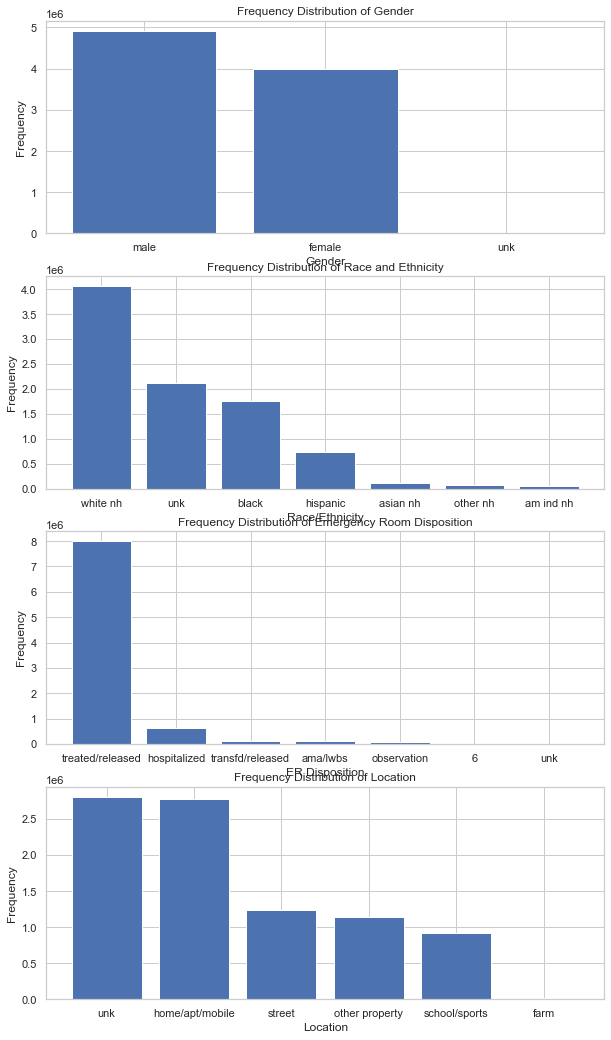

In [804]:
#Plot multiple bar plots for key features, pre-weighting
plt.figure(figsize = (10,18))
plt.subplot(4,1,1)
plot_barplots(neissdata, "gender", "Gender", "Frequency Distribution of Gender")

plt.subplot(4,1,2)
plot_barplots(neissdata, "race_ethnicity", "Race/Ethnicity", "Frequency Distribution of Race and Ethnicity")

plt.subplot(4,1,3)
plot_barplots(neissdata, "outcome", "ER Disposition", "Frequency Distribution of Emergency Room Disposition")

plt.subplot(4,1,4)
plot_barplots(neissdata, "location", "Location", "Frequency Distribution of Location")


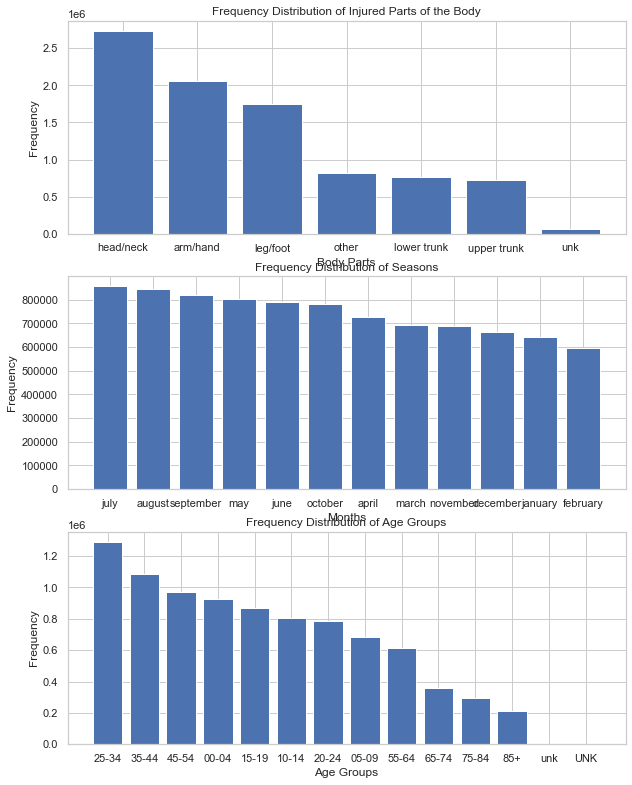

In [790]:
#Plot multiple bar plots for key features, pre-weighting
plt.figure(figsize = (10,18))
plt.subplot(4,1,1)
plot_barplots(neissdata, "bodyregion", "Body Parts", "Frequency Distribution of Injured Parts of the Body")

plt.subplot(4,1,2)
plot_barplots(neissdata, "season", "Months", "Frequency Distribution of Seasons")

plt.subplot(4,1,3)
plot_barplots(neissdata, "age_group", "Age Groups", "Frequency Distribution of Age Groups")

In [807]:
#Contigency tables
my_contingency_table = pd.crosstab(index = df["year"], columns = df["location"])
my_contingency_table

location,unk,home/apt/mobile,school/sports,street,other property,farm
year,,,,,,
2000,407860,497299,136298,223189,264149,5980
2001,405652,469550,135542,195830,230635,5754
2002,347295,474930,134546,197772,224863,5184
2003,360286,472149,126880,185881,203796,4935
2004,305127,546589,139516,214284,208467,5614
2005,314568,545983,145579,211644,214798,5702
2006,307486,550732,147542,198252,224319,5201
2007,379097,510145,144599,187813,225811,5801
2008,409993,504946,149335,174646,209252,5418


In [808]:
#Estimate the percentage of injuries per location, by year
my_contingency_table2 = pd.crosstab(index =df["location"], columns = df["year"], 
                                    normalize = "index") * 100
my_contingency_table2

year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
location,,,,,,,,,,,,,,,,,,
unk,5.385325,5.356171,4.585633,4.757165,4.028853,4.153511,4.060001,5.005542,5.413489,5.775327,6.653106,6.757113,6.651535,7.077518,6.261269,5.954134,6.500562,5.623747
home/apt/mobile,5.488793,5.182522,5.241902,5.211207,6.032817,6.026129,6.078545,5.630577,5.573195,5.241648,5.682640,5.398995,5.271978,5.221229,5.472734,6.028734,5.915260,5.301095
school/sports,5.439082,5.408913,5.369167,5.063249,5.567498,5.809447,5.887782,5.770340,5.959334,5.722533,6.044054,5.861006,5.776765,5.530187,5.386885,5.575879,5.294623,4.533260
street,6.490868,5.695203,5.751681,5.405862,6.231889,6.155111,5.765640,5.462049,5.079122,5.172999,5.793879,5.428401,5.257833,5.354503,5.033433,5.487525,5.558457,4.875545
other property,6.821910,5.956378,5.807310,5.263234,5.383867,5.547372,5.793261,5.831793,5.404141,4.825277,5.183483,5.093351,4.970109,5.270594,5.219020,5.906766,6.023835,5.698299
farm,6.729839,6.475500,5.834027,5.553805,6.317945,6.416980,5.853159,6.528394,6.097369,4.258480,5.397376,5.363614,5.425510,4.545455,4.757028,4.519571,5.361363,4.564586


Text(0.5, 1.0, 'Location of Injury By Year (Normalized to Year)')

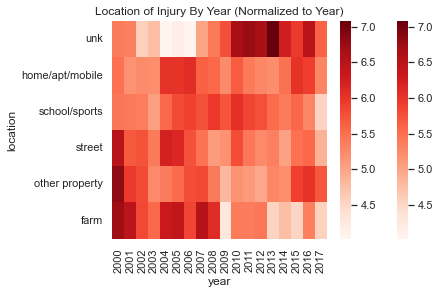

In [809]:
#Visualize injuries per location, by year
sns.heatmap(my_contingency_table2, cmap = "Reds")
ax_2 = sns.heatmap(my_contingency_table2, cmap = "Reds")
ax_2.set_title("Location of Injury By Year (Normalized to Year)")